# House Pricing Assignment

Submitted by **Debadutta Pahadsing**

Date **09-Nov-2022**

---

## Business Understanding

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- **Which variables are significant in predicting the price of a house**, and

- **How well those variables describe the price of a house**

- **What is the optimal value of lambda for ridge and lasso regression**

### Business Goal

#### Create model the price of houses with the available independent variables

This model will then be used by the company to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 

Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Solution Approach

#### 1. Importing Libraries for Data Analysis & Machine Learning for Advanced Regression
#### 2. Study the Data Description and Obtain Data Understanding
#### 3. Reading & Understanding Data
- Dataset Size
- Identify Important columns & datatypes viz. Target Variable, Identifiers
- Data Completeness Check
- A Sneak Peek into the Target Variable
- Summary Statistics
- Data Understanding Observations

#### 4. Exploratory Data Analysis
- Data Cleaning
- Derived Metrics
- Univariate Analysis
- Segmented Univariate Analysis
- Bivariate Analysis
- EDA Observations

#### 5. Data Preparation
- Dropping columns not relevant (based on EDA)
- Encoding Ordinal Variables
- Encoding Nominal variables

#### 6. Split Data into Train & Test Set
- Split Dataset
- Standardize (Scale) Data

#### 7. Linear Regression
- Feature Selection using RFE
- Model Performance 
- Residual Analysis

#### 8. Split Data into Train & Test Set (for Data Transformation & Regularization)
- Traget Variable Distribution Skew Check
- Data Transformation
- Split Dataset
- Standardize (Scale) Data

#### 9. Advanced Regression
- Feature Selection using RFE
- Linear Regression with Data Transformation
- Linear Regression with Ridge Regularization
- Linear Regression with Lasso Regularization
- Comparison of Metrics

#### 10. Inference
- Model Selection
- Significant Predictors of House Price
- How well those predictors describe the price of a house
- optimal value of lambda for ridge and lasso regression

#### Part-II of Assignment
- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?
- Create another model excluding the five most important predictor variables

## 1. Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries for data processing and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import missingno as msno

# libraries for machine learning 

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 5)
pd.set_option('display.float_format', '{:.5f}'.format)

## 2. Data Understaning

- Study the Data Description and Obtain Data Understanding

## 3. Reading & Understanding Data

### Read Dataset & Basic Dataset Info

In [4]:
df = pd.read_csv('train.csv')

### Dataset Info

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL     65.00000     8450   Pave   NaN      Reg   
1   2          20       RL     80.00000     9600   Pave   NaN      Reg   
2   3          60       RL     68.00000    11250   Pave   NaN      IR1   
3   4          70       RL     60.00000     9550   Pave   NaN      IR1   
4   5          60       RL     84.00000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0   196.00000        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2   162.00000        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4   350.00000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.describe().T

count         mean         std         min          25%  \
Id            1460.00000    730.50000   421.61001     1.00000    365.75000   
MSSubClass    1460.00000     56.89726    42.30057    20.00000     20.00000   
LotFrontage   1201.00000     70.04996    24.28475    21.00000     59.00000   
LotArea       1460.00000  10516.82808  9981.26493  1300.00000   7553.50000   
OverallQual   1460.00000      6.09932     1.38300     1.00000      5.00000   
OverallCond   1460.00000      5.57534     1.11280     1.00000      5.00000   
YearBuilt     1460.00000   1971.26781    30.20290  1872.00000   1954.00000   
YearRemodAdd  1460.00000   1984.86575    20.64541  1950.00000   1967.00000   
MasVnrArea    1452.00000    103.68526   181.06621     0.00000      0.00000   
BsmtFinSF1    1460.00000    443.63973   456.09809     0.00000      0.00000   
BsmtFinSF2    1460.00000     46.54932   161.31927     0.00000      0.00000   
BsmtUnfSF     1460.00000    567.24041   441.86696     0.00000    223.00000   
TotalBsmtSF   1460.00000   1057.42945   438.70532     0.00000    795.75000   
1stFlrSF      1460.00000   1162.62671   386.58774   334.00000    882.00000   
2ndFlrSF      1460.00000    346.99247   436.52844     0.00000      0.00000   
LowQualFinSF  1460.00000      5.84452    48.62308     0.00000      0.00000   
GrLivArea     1460.00000   1515.46370   525.48038   334.00000   1129.50000   
BsmtFullBath  1460.00000      0.42534     0.51891     0.00000      0.00000   
BsmtHalfBath  1460.00000      0.05753     0.23875     0.00000      0.00000   
FullBath      1460.00000      1.56507     0.55092     0.00000      1.00000   
HalfBath      1460.00000      0.38288     0.50289     0.00000      0.00000   
BedroomAbvGr  1460.00000      2.86644     0.81578     0.00000      2.00000   
KitchenAbvGr  1460.00000      1.04658     0.22034     0.00000      1.00000   
TotRmsAbvGrd  1460.00000      6.51781     1.62539     2.00000      5.00000   
Fireplaces    1460.00000      0.61301     0.64467     0.00000      0.00000   
GarageYrBlt   1379.00000   1978.50616    24.68972  1900.00000   1961.00000   
GarageCars    1460.00000      1.76712     0.74732     0.00000      1.00000   
GarageArea    1460.00000    472.98014   213.80484     0.00000    334.50000   
WoodDeckSF    1460.00000     94.24452   125.33879     0.00000      0.00000   
OpenPorchSF   1460.00000     46.66027    66.25603     0.00000      0.00000   
EnclosedPorch 1460.00000     21.95411    61.11915     0.00000      0.00000   
3SsnPorch     1460.00000      3.40959    29.31733     0.00000      0.00000   
ScreenPorch   1460.00000     15.06096    55.75742     0.00000      0.00000   
PoolArea      1460.00000      2.75890    40.17731     0.00000      0.00000   
MiscVal       1460.00000     43.48904   496.12302     0.00000      0.00000   
MoSold        1460.00000      6.32192     2.70363     1.00000      5.00000   
YrSold        1460.00000   2007.81575     1.32810  2006.00000   2007.00000   
SalePrice     1460.00000 180921.19589 79442.50288 34900.00000 129975.00000   

                       50%          75%          max  
Id               730.50000   1095.25000   1460.00000  
MSSubClass        50.00000     70.00000    190.00000  
LotFrontage       69.00000     80.00000    313.00000  
LotArea         9478.50000  11601.50000 215245.00000  
OverallQual        6.00000      7.00000     10.00000  
OverallCond        5.00000      6.00000      9.00000  
YearBuilt       1973.00000   2000.00000   2010.00000  
YearRemodAdd    1994.00000   2004.00000   2010.00000  
MasVnrArea         0.00000    166.00000   1600.00000  
BsmtFinSF1       383.50000    712.25000   5644.00000  
BsmtFinSF2         0.00000      0.00000   1474.00000  
BsmtUnfSF        477.50000    808.00000   2336.00000  
TotalBsmtSF      991.50000   1298.25000   6110.00000  
1stFlrSF        1087.00000   1391.25000   4692.00000  
2ndFlrSF           0.00000    728.00000   2065.00000  
LowQualFinSF       0.00000      0.00000    572.00000  
GrLivArea       1464.00000   1776.75000  

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
col_identity = ['Id']

col_num_continuous = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

col_num_discrete = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

col_cat_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual',
                   'GarageCond', 'PoolQC']

col_num_nominal = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                   'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                   'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                   'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
                   'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 
                   'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

col_target = ['SalePrice']

In [11]:
len(col_identity), len(col_num_continuous), len(col_num_discrete), \
len(col_cat_ordinal), len(col_num_nominal), len(col_target)

(1, 3, 33, 12, 31, 1)

In [12]:
len(col_identity) + len(col_num_continuous) + len(col_num_discrete) + \
len(col_cat_ordinal) + len(col_num_nominal) + len(col_target)

81

In [13]:
identity_attr = ['Id']

location_attr = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']

basic_attr = ['BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

exterior_attr = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                 'MasVnrArea', 'ExterQual', 'ExterCond']

basement_attr = ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

interior_attr = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
                 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu']

garage_attr = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
               'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

misc_attr = ['PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']

sale_attr = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

In [14]:
len(identity_attr), len(location_attr), len(basic_attr), len(exterior_attr), len(basement_attr), \
len(interior_attr), len(garage_attr), len(misc_attr), len(sale_attr)

(1, 14, 6, 8, 10, 19, 13, 5, 5)

In [15]:
len(identity_attr) + len(location_attr) + len(basic_attr) + len(exterior_attr) + len(basement_attr) + \
len(interior_attr) + len(garage_attr) + len(misc_attr) + len(sale_attr)

81

### Data Completeness Check

In [16]:
df_missing = df.isnull().sum()/len(df)
df_missing = df_missing[df_missing > 0]
df_missing

LotFrontage    0.17740
Alley          0.93767
MasVnrType     0.00548
MasVnrArea     0.00548
BsmtQual       0.02534
BsmtCond       0.02534
BsmtExposure   0.02603
BsmtFinType1   0.02534
BsmtFinType2   0.02603
Electrical     0.00068
FireplaceQu    0.47260
GarageType     0.05548
GarageYrBlt    0.05548
GarageFinish   0.05548
GarageQual     0.05548
GarageCond     0.05548
PoolQC         0.99521
Fence          0.80753
MiscFeature    0.96301
dtype: float64

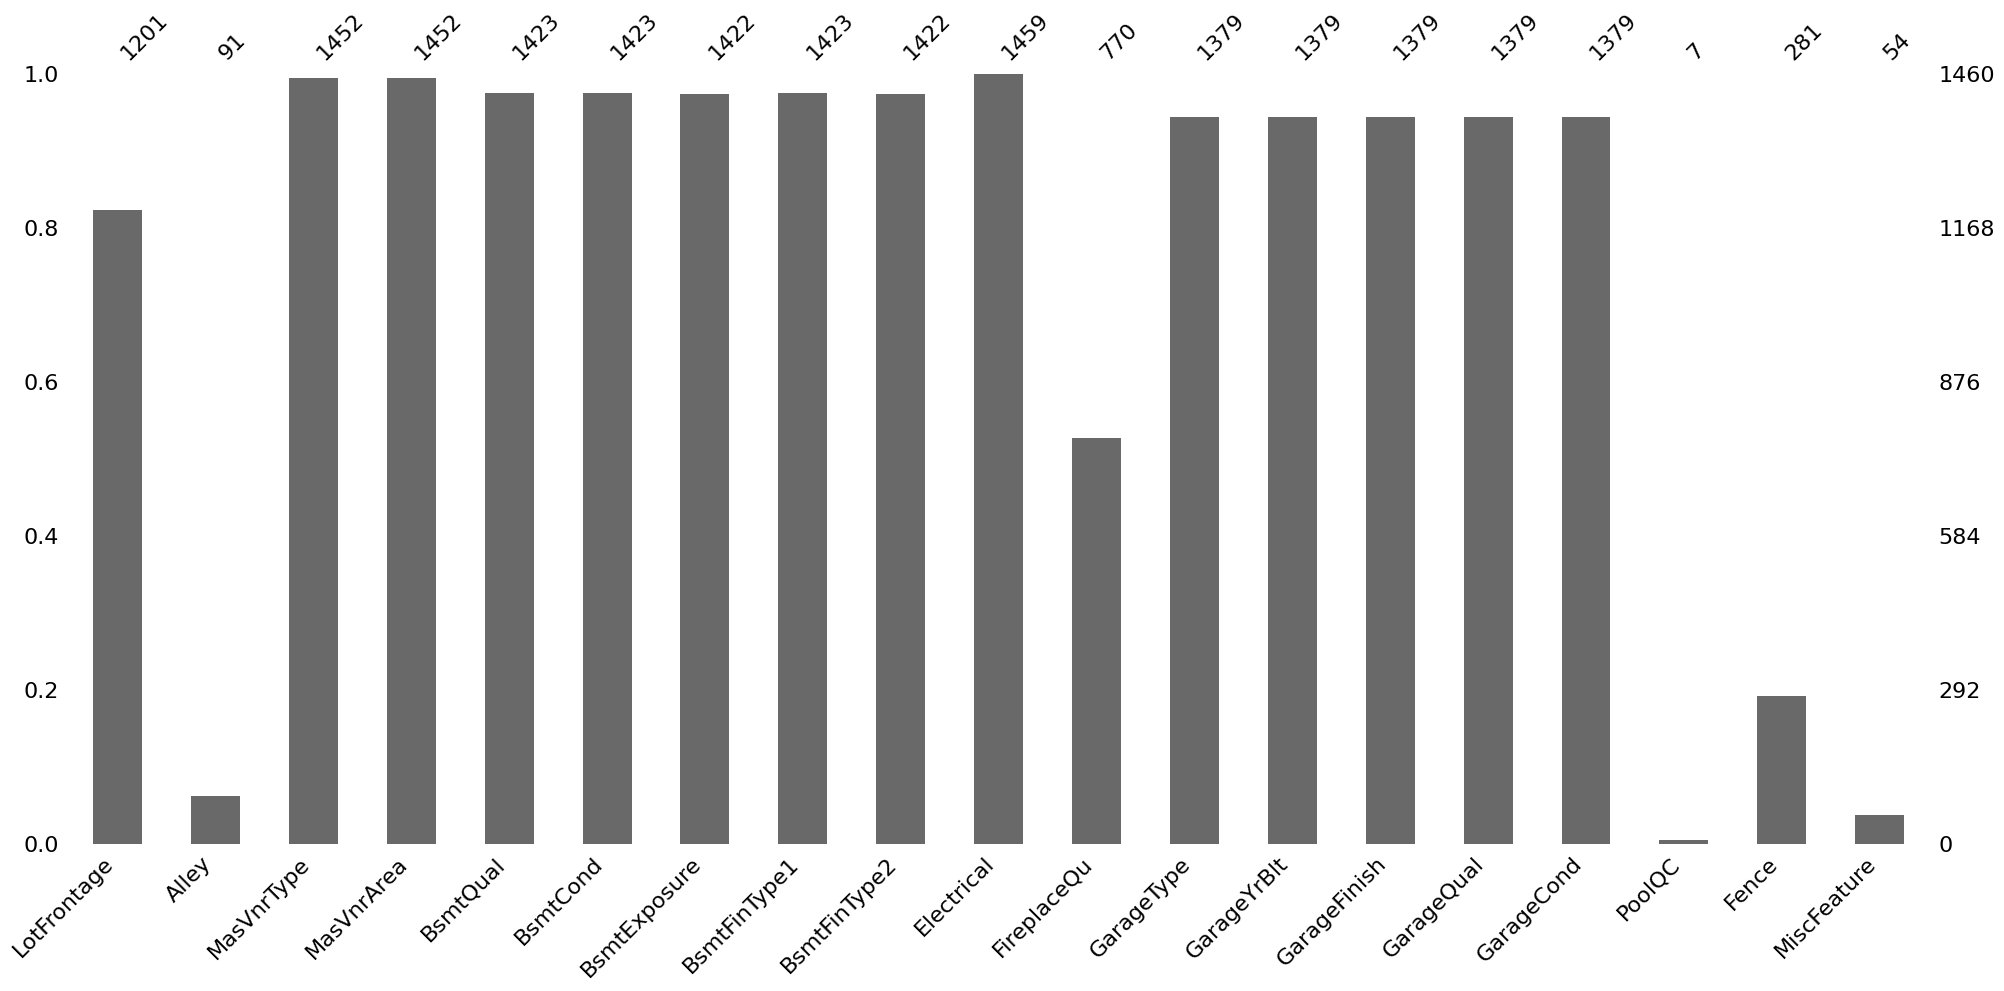

In [17]:
msno.bar(df[df_missing.index]);

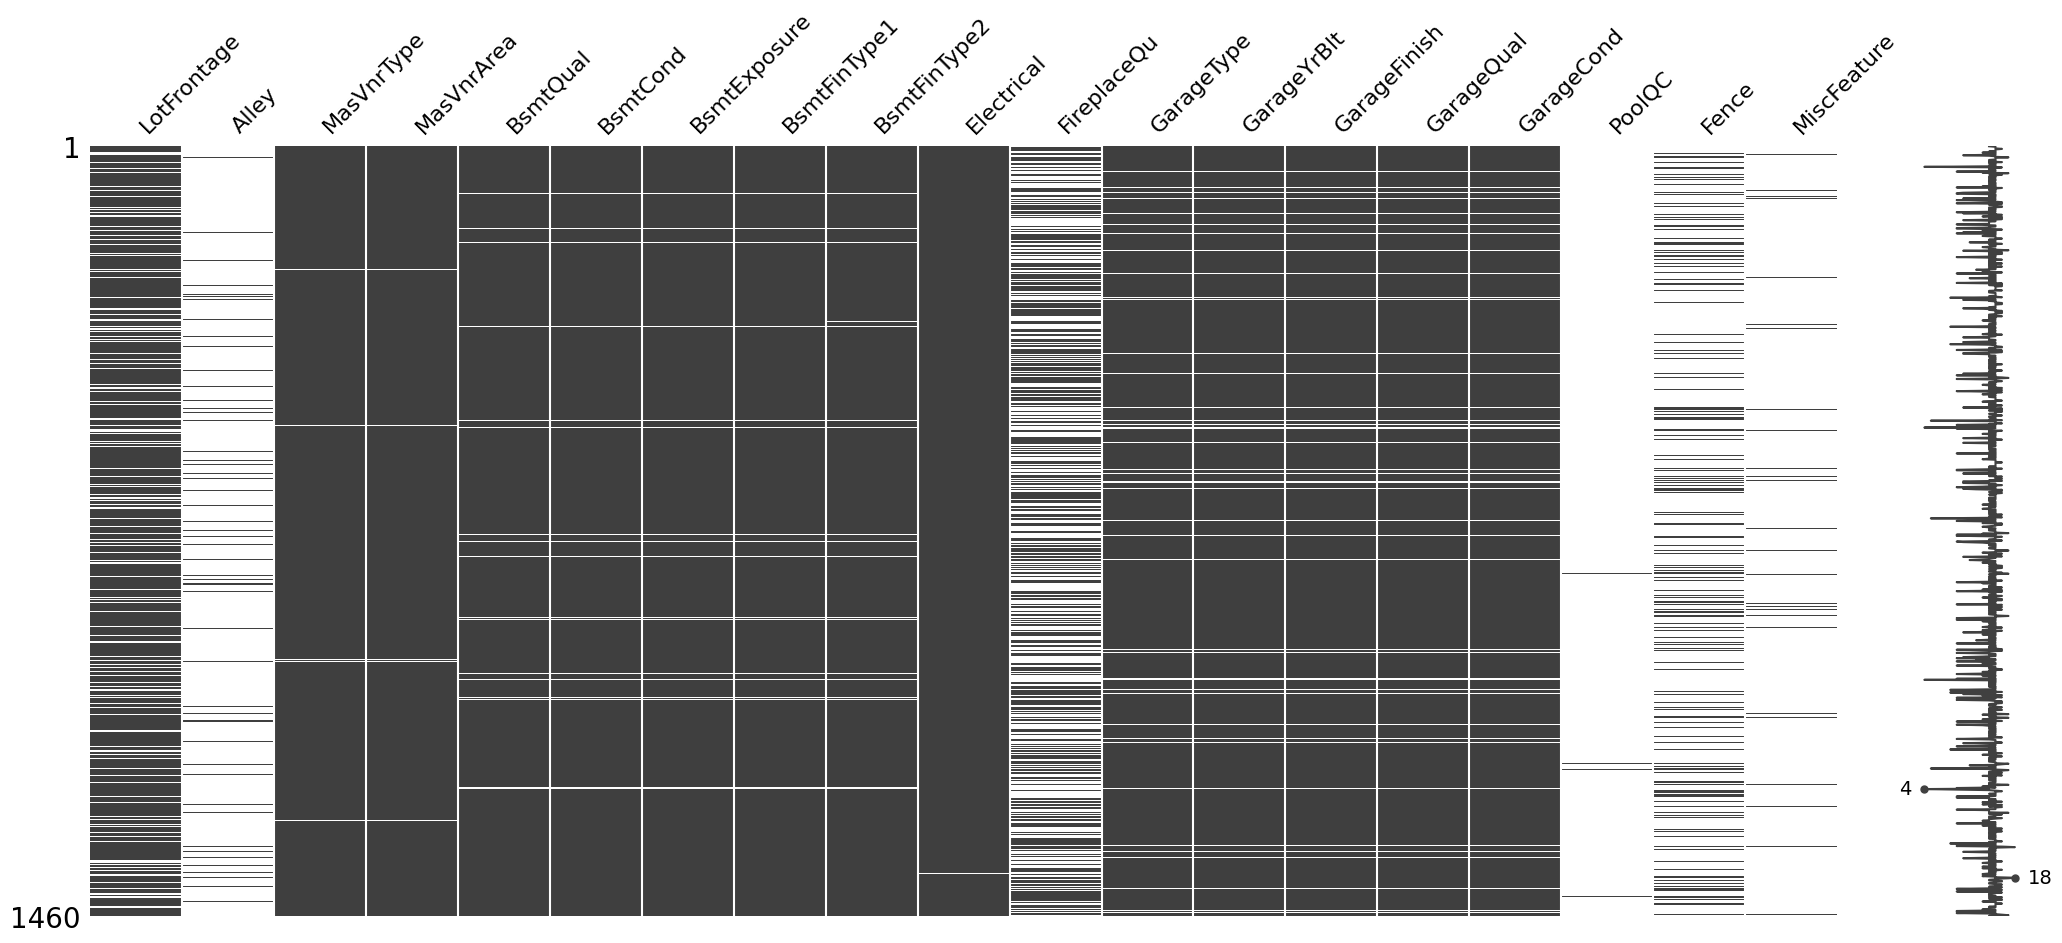

In [18]:
msno.matrix(df[df_missing.index]);

In [19]:
df[df_missing.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

### Check the Target Variable

#### Data Distribution

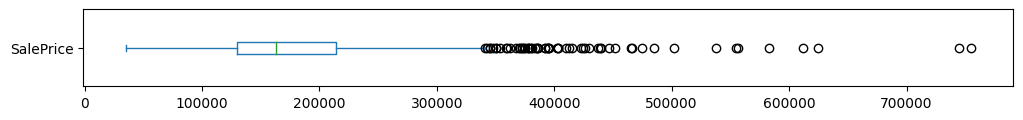

In [20]:
df.SalePrice.plot.box(vert=False, figsize=(12,1));

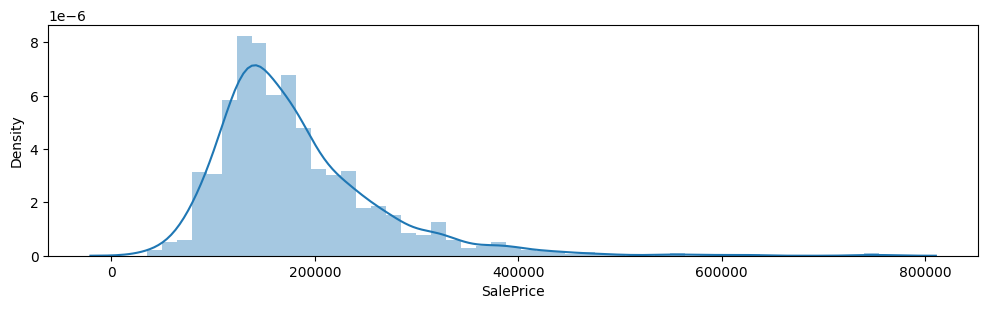

In [21]:
plt.figure(figsize=(12,3))
sns.distplot(df.SalePrice);

#### Summary Statistics 

In [22]:
df['SalePrice'].describe().T

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64

### Check the Distribution of Continuous Variables

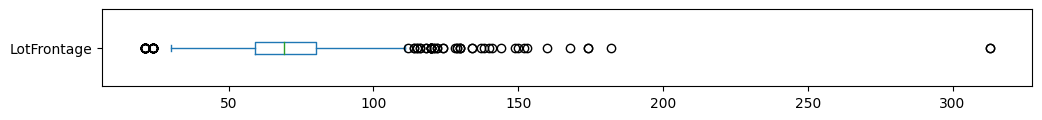

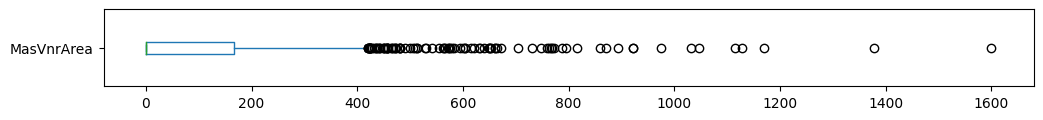

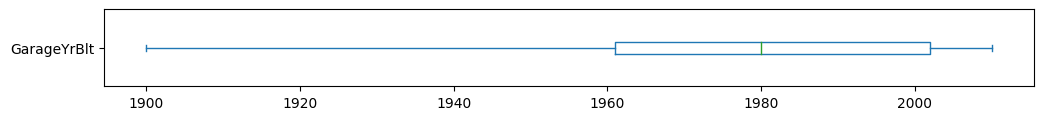

In [23]:
for col in col_num_continuous:
    df[col].plot.box(vert=False, figsize=(12,1))
    plt.show()

### Check the Summary Statistics of Continuous Variables

In [24]:
df[df_missing.index].describe().T

count       mean       std        min        25%        50%  \
LotFrontage 1201.00000   70.04996  24.28475   21.00000   59.00000   69.00000   
MasVnrArea  1452.00000  103.68526 181.06621    0.00000    0.00000    0.00000   
GarageYrBlt 1379.00000 1978.50616  24.68972 1900.00000 1961.00000 1980.00000   

                   75%        max  
LotFrontage   80.00000  313.00000  
MasVnrArea   166.00000 1600.00000  
GarageYrBlt 2002.00000 2010.00000

### Data Understanding Observations:
- Dataset size is **1460 rows x 81 Columns**
- Target Variable is **SalePrice**
- Distribution of Target Variable is **Skewed**
- Dataset has an Identity Column **Id**
- summary of columns data types
    - float data : 3 nos.
    - integer data : 34 nos. + 1 no. Target Variable
    - categorical nominal data : 12 nos.
    - categorical ordinal data : 31 nos.
- 19 columns have missing values, ranging from 0.01% to ~1.0%
    - float data : 3 nos.
    - categorical data : 16 nos.

## 4. Exploratory Data Analysis

### Utility Functions

In [25]:
# function to check if a value is numeric or not

def fn_isfloat(str):
    try:
        float(str)
        return True
    except ValueError:
        return False

### Data Cleaning

#### Check & Fix Rows

In [26]:
# Check & Delete Unwanted Header / Footer Rows
# Check & Delete Summary Rows (Totals/Sub-Totals)
# Check & Delete Blank / Extra Rows

In [27]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL     65.00000     8450   Pave   NaN      Reg   
1   2          20       RL     80.00000     9600   Pave   NaN      Reg   
2   3          60       RL     68.00000    11250   Pave   NaN      IR1   
3   4          70       RL     60.00000     9550   Pave   NaN      IR1   
4   5          60       RL     84.00000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0   196.00000        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2   162.00000        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4   350.00000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [28]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL     62.00000     7917   Pave   NaN      Reg   
1456  1457          20       RL     85.00000    13175   Pave   NaN      Reg   
1457  1458          70       RL     66.00000     9042   Pave   NaN      Reg   
1458  1459          20       RL     68.00000     9717   Pave   NaN      Reg   
1459  1460          20       RL     75.00000     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455     0.00000        TA        TA      PConc       Gd       TA   
1456   119.00000        TA        TA     CBlock       Gd       TA   
1457     0.00000        Ex        Gd      Stone       TA       Gd   
1458     0.00000        TA        TA     CBlock       TA       TA   
1459     0.00000        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [29]:
# check for missing IDs

df.Id.count()

1460

In [30]:
# No Header / Footer Rows Observed
# No Summary Rows (Totals/Sub-Totals) Observed
# No Blank / Extra Rows Observed

#### Check & Fix Columns

In [31]:
# Check for Missing Column Names

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
# Check Column Names & Rename Suitably, if required

# Column Names seem relevant, no need to rename columns

In [34]:
# Check for irrelevant columns (based on metadata understanding) and delete

# All columns seem relevant

In [35]:
# Check if columns can be split 

# at the first glance, splitting is not required

In [36]:
# Merge columns to create identifiers (for grouping, segmenting)

# Id column present

#### Check & Fix Missing Values

In [37]:
# Check & Delete Columns having Keys/ Unique Values in each row
# Check & Delete Constant Columns
# Check & Delete Quasi-Constant Columns
# Check values like NA, XX, -, etc. treat as as missing values

# Fill Missing Values from Business Understanding
# Add missing values ONLY from reliable sources
# Fill Missing Values with Mean/ Median/ Mode (Categorical) (check what is the most representative statistic)

# Post Filling check that the Data Distribution is not significantly altered

# DELETE COLUMNs if nos. of columns with missing values are HIGH
# DELETE ROWs if nos. of rows with missing values are LOW

In [38]:
# Check & Delete Columns having Keys/ Unique Values in each row
df_unq = df.nunique()
df_unq[df_unq == len(df)]

Id    1460
dtype: int64

In [39]:
df.drop(columns='Id', inplace=True)

In [40]:
# Check & Delete Constant Columns
df_unq = df.nunique()
df_unq[df_unq == 1]

Series([], dtype: int64)

In [41]:
# No Constant Columns

In [42]:
# Check & Delete Quasi-Constant Columns
# !!!
# create an empty list
quasi_constant_feat = []

# iterate over every feature
for col in df.columns:

    # find the predominant value, that is the value that is shared by most observations
    predominant = df[col].value_counts(normalize=True).sort_values(ascending=False).values[0]

    # evaluate the predominant feature: do more than 98% of the observations show 1 value?
    if predominant > 0.98:

        # if yes, add the variable to the list
        quasi_constant_feat.append(col)

print(len(quasi_constant_feat))
print((quasi_constant_feat))

7
['Street', 'Utilities', 'Condition2', 'RoofMatl', 'LowQualFinSF', '3SsnPorch', 'PoolArea']


In [43]:
df.drop(columns=quasi_constant_feat, inplace=True)

In [44]:
# Missing Value Handling

# Check values like NA, XX, -, etc. treat as as missing values

for col in df.select_dtypes(['object']).columns:
    print(col, len(df[col].dropna().unique()))
    print(np.sort(df[col].dropna().unique()))
    if df[col].isnull().sum() > 0:
        print((df[col].unique()))
    print()

MSZoning 5
['C (all)' 'FV' 'RH' 'RL' 'RM']

Alley 2
['Grvl' 'Pave']
[nan 'Grvl' 'Pave']

LotShape 4
['IR1' 'IR2' 'IR3' 'Reg']

LandContour 4
['Bnk' 'HLS' 'Low' 'Lvl']

LotConfig 5
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']

LandSlope 3
['Gtl' 'Mod' 'Sev']

Neighborhood 25
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']

Condition1 9
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']

BldgType 5
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']

HouseStyle 8
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']

RoofStyle 6
['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']

Exterior1st 15
['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing']

Exterior2nd 16
['AsbShng' 'A

In [45]:
# function to display count of nulls, nun-nulls, uniques, numeric uniques, non-numeric uniques etc.

def show_col_summary(df):
    summ_col_names = ['col_name', 
                      'data_type', 
                      'non_null', 'null', 'unique', 
                      'numeric', 'numeric_unique', 
                      'non_numeric', 'non_numeric_unique']
    l = []
    for col in df.select_dtypes(['object', 'int', 'uint']).columns:
        df_num = df[df[col].apply(fn_isfloat)]
        df_non_num = df[~df[col].apply(fn_isfloat)]
        l.append([col, 
                  df[col].dtype, 
                  df[col].count(), 
                  df[col].isnull().sum(), 
                  df[col].nunique(), 
                  df_num[col].count(), 
                  df_num[col].nunique(), 
                  df_non_num[col].count(), 
                  df_non_num[col].nunique()])
    df_x = pd.DataFrame(l, columns=summ_col_names)

    print('SUMMARY OF NULLS AND UNIQUES')
    print('-'*100)
    pd.set_option('display.max_rows', None)
    display(df_x.sort_values(by=['data_type', 'non_numeric_unique']))

In [46]:
show_col_summary(df)

SUMMARY OF NULLS AND UNIQUES
----------------------------------------------------------------------------------------------------


col_name data_type  non_null  null  unique  numeric  numeric_unique  \
0      MSSubClass     int64      1460     0      15     1460              15   
2         LotArea     int64      1460     0    1073     1460            1073   
12    OverallQual     int64      1460     0      10     1460              10   
13    OverallCond     int64      1460     0       9     1460               9   
14      YearBuilt     int64      1460     0     112     1460             112   
15   YearRemodAdd     int64      1460     0      61     1460              61   
27     BsmtFinSF1     int64      1460     0     637     1460             637   
29     BsmtFinSF2     int64      1460     0     144     1460             144   
30      BsmtUnfSF     int64      1460     0     780     1460             780   
31    TotalBsmtSF     int64      1460     0     721     1460             721   
36       1stFlrSF     int64      1460     0     753     1460             753   
37       2ndFlrSF     int64      1460     0     417     1460             417   
38      GrLivArea     int64      1460     0     861     1460             861   
39   BsmtFullBath     int64      1460     0       4     1460               4   
40   BsmtHalfBath     int64      1460     0       3     1460               3   
41       FullBath     int64      1460     0       4     1460               4   
42       HalfBath     int64      1460     0       3     1460               3   
43   BedroomAbvGr     int64      1460     0       8     1460               8   
44   KitchenAbvGr     int64      1460     0       4     1460               4   
46   TotRmsAbvGrd     int64      1460     0      12     1460              12   
48     Fireplaces     int64      1460     0       4     1460               4   
52     GarageCars     int64      1460     0       5     1460               5   
53     GarageArea     int64      1460     0     441     1460             441   
57     WoodDeckSF     int64      1460     0     274     1460             274   
58    OpenPorchSF     int64      1460     0     202     1460             202   
59  EnclosedPorch     int64      1460     0     120     1460             120   
60    ScreenPorch     int64      1460     0      76     1460              76   
64        MiscVal     int64      1460     0      21     1460              21   
65         MoSold     int64      1460     0      12     1460              12   
66         YrSold     int64      1460     0       5     1460               5   
69      SalePrice     int64      1460     0     663     1460             663   
3           Alley    object        91  1369       2        0               0   
34     CentralAir    object      1460     0       2        0               0   
7       LandSlope    object      1460     0       3        0               0   
51   GarageFinish    object      1379    81       3        0               0   
56     PavedDrive    object      1460     0       3        0               0   
61         PoolQC    object         7  1453       3        0               0   
4        LotShape    object      1460     0       4        0               0   
5     LandContour    object      1460     0       4        0               0   
19     MasVnrType    object      1452     8       4        0               0   
20      ExterQual    object      1460     0       4        0               0   
23       BsmtQual    object      1423    37       4        0               0   
24       BsmtCond    object      1423    37       4        0               0   
25   BsmtExposure    object      1422    38       4        0               0   
45    KitchenQual    object      1460     0       4        0               0   
62          Fence    object       281  1179       4        0               0   
63    MiscFeature    object        54  1406       4        0               0   
1        MSZoning    object      1460     0       5        0               0   
6       LotConfig    object      1460     0       5        0               0   
10       

In [47]:
df[df_missing.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [48]:
df.LotFrontage.describe()

count   1201.00000
mean      70.04996
std       24.28475
min       21.00000
25%       59.00000
50%       69.00000
75%       80.00000
max      313.00000
Name: LotFrontage, dtype: float64

In [49]:
df.LotFrontage.isnull().sum()

259

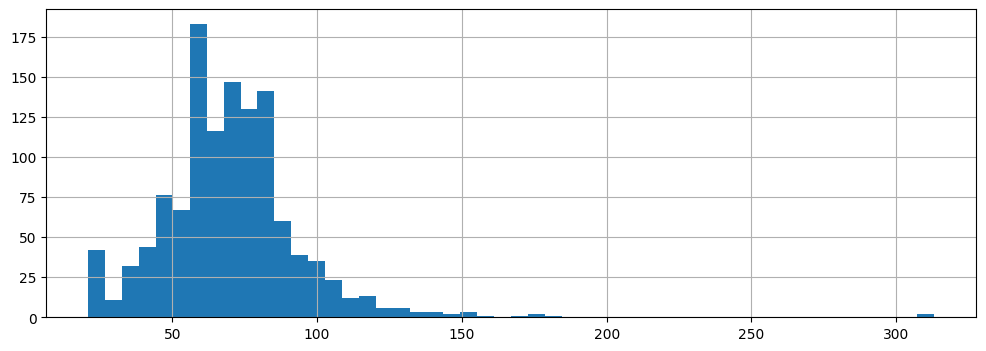

In [50]:
df.LotFrontage.hist(bins=50, figsize=(12,4));

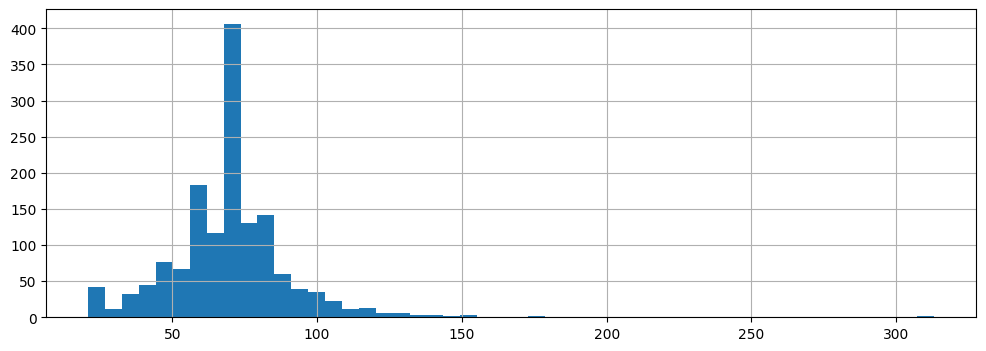

In [51]:
# df.LotFrontage.fillna(df.LotFrontage.median()).hist(bins=50, figsize=(12,4));
df.LotFrontage.fillna(df.LotFrontage.mean()).hist(bins=50, figsize=(12,4));

In [52]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)

In [53]:
df.MasVnrArea.isnull().sum()

8

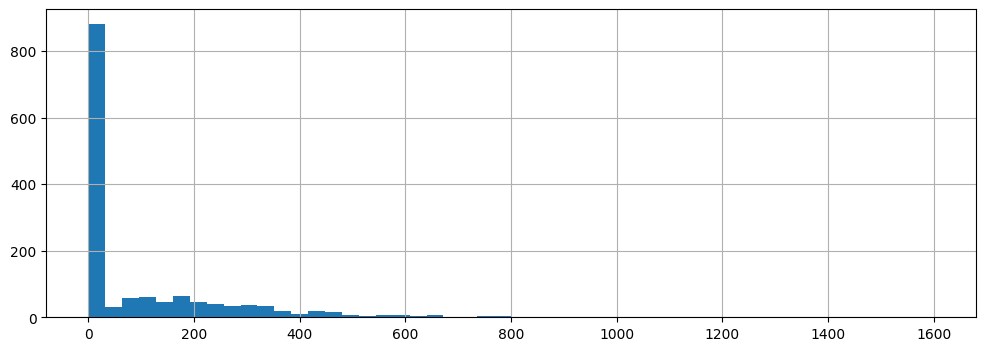

In [54]:
df.MasVnrArea.hist(bins=50, figsize=(12,4));

In [55]:
df.MasVnrArea.value_counts().nlargest(10)

0.00000      861
180.00000      8
72.00000       8
108.00000      8
120.00000      7
16.00000       7
200.00000      6
340.00000      6
106.00000      6
80.00000       6
Name: MasVnrArea, dtype: int64

In [56]:
df.MasVnrArea.mode()[0]

0.0

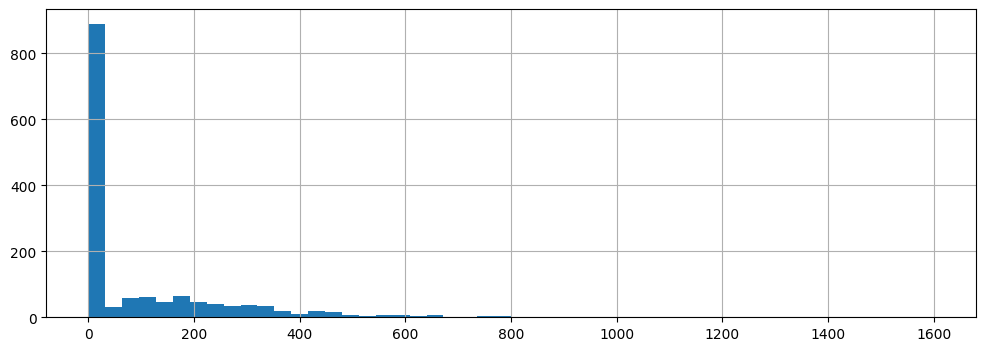

In [57]:
df.MasVnrArea.fillna(df.MasVnrArea.mode()[0]).hist(bins=50, figsize=(12,4));

In [58]:
df.MasVnrArea.fillna(df.MasVnrArea.mode()[0], inplace=True)

In [59]:
df.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [60]:
# Based on Data Description NULL value means NoAlley

df.Alley.fillna('NoAlley', inplace=True)
df.Alley.value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [61]:
df.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [62]:
# Based on Data Description NULL value means None

df.MasVnrType.fillna('None', inplace=True)
df.MasVnrType.value_counts(dropna=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [63]:
df.BsmtQual.value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [64]:
# Based on Data Description NULL value means NoBasement

df.BsmtQual.fillna('NoBsmt', inplace=True)
df.BsmtQual.value_counts(dropna=False)

TA        649
Gd        618
Ex        121
NoBsmt     37
Fa         35
Name: BsmtQual, dtype: int64

In [65]:
df.BsmtCond.value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [66]:
# Based on Data Description NULL value means NoBasement

df.BsmtCond.fillna('NoBsmt', inplace=True)
df.BsmtCond.value_counts(dropna=False)

TA        1311
Gd          65
Fa          45
NoBsmt      37
Po           2
Name: BsmtCond, dtype: int64

In [67]:
df.BsmtExposure.value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [68]:
# Based on Data Description NULL value means NoBasement

df.BsmtExposure.fillna('NoBsmt', inplace=True)
df.BsmtExposure.value_counts(dropna=False)

No        953
Av        221
Gd        134
Mn        114
NoBsmt     38
Name: BsmtExposure, dtype: int64

In [69]:
df.BsmtFinType1.value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [70]:
# Based on Data Description NULL value means NoBasement

df.BsmtFinType1.fillna('NoBsmt', inplace=True)
df.BsmtFinType1.value_counts(dropna=False)

Unf       430
GLQ       418
ALQ       220
BLQ       148
Rec       133
LwQ        74
NoBsmt     37
Name: BsmtFinType1, dtype: int64

In [71]:
df.BsmtFinType2.value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [72]:
# Based on Data Description NULL value means NoBasement

df.BsmtFinType2.fillna('NoBsmt', inplace=True)
df.BsmtFinType2.value_counts(dropna=False)

Unf       1256
Rec         54
LwQ         46
NoBsmt      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64

In [73]:
df.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [74]:
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)
df.Electrical.value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [75]:
df.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [76]:
# Based on Data Description NULL value means Fireplace

df.FireplaceQu.fillna('NoFireplace', inplace=True)
df.FireplaceQu.value_counts(dropna=False)

NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

In [77]:
df.GarageType.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [78]:
# Based on Data Description NULL value means NoGarage

df.GarageType.fillna('NoGarage', inplace=True)
df.GarageType.value_counts(dropna=False)

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [79]:
df.GarageYrBlt.isnull().sum()

81

In [80]:
# There is possibility that the Garage was buits around the year when the house was built or remodelled
# let's check the correlation between these two columns

df[['GarageYrBlt', 'YearBuilt']].corr()

GarageYrBlt  YearBuilt
GarageYrBlt      1.00000    0.82567
YearBuilt        0.82567    1.00000

In [81]:
df[['GarageYrBlt', 'YearRemodAdd']].corr()

GarageYrBlt  YearRemodAdd
GarageYrBlt       1.00000       0.64228
YearRemodAdd      0.64228       1.00000

In [82]:
# since House Built Year has a strong correlation with Garage Built Year (0.83)
# we will replace the missing GarageYrBlt with YearBuilt

df.GarageYrBlt.fillna(df.YearBuilt, inplace=True)
df.GarageYrBlt.isnull().sum()

0

In [83]:
df.GarageFinish.value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [84]:
# Based on Data Description NULL value means NoGarage

df.GarageFinish.fillna('NoGarage', inplace=True)
df.GarageFinish.value_counts(dropna=False)

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

In [85]:
df.GarageQual.value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [86]:
# Based on Data Description NULL value means NoGarage

df.GarageQual.fillna('NoGarage', inplace=True)
df.GarageQual.value_counts(dropna=False)

TA          1311
NoGarage      81
Fa            48
Gd            14
Ex             3
Po             3
Name: GarageQual, dtype: int64

In [87]:
df.GarageCond.value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [88]:
# Based on Data Description NULL value means NoGarage

df.GarageCond.fillna('NoGarage', inplace=True)
df.GarageCond.value_counts(dropna=False)

TA          1326
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: GarageCond, dtype: int64

In [89]:
df.PoolQC.value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [90]:
# Based on Data Description NULL value means NoPool

# However, since the missing value propotion is > 99%, we'll drop this column

df.drop(columns=['PoolQC'], inplace=True)

# df.PoolQC.fillna('NoPool', inplace=True)
# df.PoolQC.value_counts(dropna=False)

In [91]:
# df.PoolArea.value_counts()[0]

In [92]:
# since PoolArea also has large propotion (> 99%) as 0 , we'll drop this column

# df.drop(columns=['PoolArea'], inplace=True)

In [93]:
df.Fence.value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [94]:
# Based on Data Description NULL value means NoFence

# However, since the missing value propotion is > 80%, we'll drop this column

df.drop(columns=['Fence'], inplace=True)

# df.Fence.fillna('NoFence', inplace=True)
# df.Fence.value_counts(dropna=False)

In [95]:
df.MiscFeature.value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [96]:
# Based on Data Description NULL value means NoMiscFeature

# However, since the missing value propotion is > 95%, we'll drop this column

df.drop(columns=['MiscFeature'], inplace=True)

# df.MiscFeature.fillna('NoMiscFeature', inplace=True)
# df.MiscFeature.value_counts(dropna=False)

In [97]:
df.MiscVal.value_counts(dropna=False)[:5]

0      1408
400      11
500       8
700       5
450       4
Name: MiscVal, dtype: int64

In [98]:
# However, since the 0 value propotion is > 95%, we'll drop this column

df.drop(columns=['MiscVal'], inplace=True)

In [99]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count > 1200:
        print('Count of zeros in column \t', column_name, ':\t', count, ',\t %age is : ', '{:.2f}'.format((count*100)/len(df)))

Count of zeros in column 	 BsmtFinSF2 :	 1293 ,	 %age is :  88.56
Count of zeros in column 	 BsmtHalfBath :	 1378 ,	 %age is :  94.38
Count of zeros in column 	 EnclosedPorch :	 1252 ,	 %age is :  85.75
Count of zeros in column 	 ScreenPorch :	 1344 ,	 %age is :  92.05


In [100]:
df.shape

(1460, 69)

#### Check & Fix Invalid Values

In [101]:
df[df.YearBuilt > df.YearRemodAdd]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [102]:
df[df.YearBuilt > df.YrSold]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [103]:
# Sum of All Basement areas should be equal to Total area
df[df.BsmtFinSF1 + df.BsmtFinSF2 + df.BsmtUnfSF != df.TotalBsmtSF]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [104]:
# Check for unreadable values due to encoding issues (try CP1252) - Not Necessary
# Check & Convert Data Types - Data Types OK
# Check Range - Seems OK
# Check Format - Seems OK

# Check List of Values - Seems Ok from Unique Values of Categorical Variaables & Data Description
# However, it's observed that not all values for a cateborical variable are present in the training data
# that means, the model cannot learn the impact of these values and if such data is present in the test data
# the same will not be taken into consideration

# Check Impossible values - Seems OK

# Check Validation Rules based on busness understanding 
# Built Year <= Remodeling Year, Sold Year >= Built Year etc.
# Seems OK

#### Standardize Values

In [105]:
# Standardize Units (Unit Conversion)
# Scale Values if Required
# Standardize Precision
########################################
# !!!!! Idenify & Remove Outlirers !!!!!
########################################

In [106]:
# All Lengths in feet : 

# LotFrontage, 

# All Areas in square feet : 

# LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, 
# GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea

In [107]:
df_summary = df.describe().T

In [108]:
# calculate outlier count and outlier percentage 
# looking at the range and quartile values, it appears only upper outlier exist
# outliers (value > 1.5*IQR) have been calculated

df_summary['up_whisker'] = df_summary['75%'] + ((df_summary['75%'] - df_summary['25%']) * 1.5)
df_summary['lo_whisker'] = df_summary['25%'] - ((df_summary['75%'] - df_summary['25%']) * 1.5)
df_summary['lo_whisker'] = df_summary['lo_whisker'].apply(lambda x : x if x >= 0 else 0)

df_summary['ol_count'] = \
df[df_summary.index][df.gt(df_summary['up_whisker'])].count() + \
df[df_summary.index][df.lt(df_summary['lo_whisker'])].count()

df_summary['ol_percent'] = 100 * df_summary['ol_count'] / df_summary['count']
df_summary

count         mean         std         min          25%  \
MSSubClass    1460.00000     56.89726    42.30057    20.00000     20.00000   
LotFrontage   1460.00000     70.04996    22.02402    21.00000     60.00000   
LotArea       1460.00000  10516.82808  9981.26493  1300.00000   7553.50000   
OverallQual   1460.00000      6.09932     1.38300     1.00000      5.00000   
OverallCond   1460.00000      5.57534     1.11280     1.00000      5.00000   
YearBuilt     1460.00000   1971.26781    30.20290  1872.00000   1954.00000   
YearRemodAdd  1460.00000   1984.86575    20.64541  1950.00000   1967.00000   
MasVnrArea    1460.00000    103.11712   180.73137     0.00000      0.00000   
BsmtFinSF1    1460.00000    443.63973   456.09809     0.00000      0.00000   
BsmtFinSF2    1460.00000     46.54932   161.31927     0.00000      0.00000   
BsmtUnfSF     1460.00000    567.24041   441.86696     0.00000    223.00000   
TotalBsmtSF   1460.00000   1057.42945   438.70532     0.00000    795.75000   
1stFlrSF      1460.00000   1162.62671   386.58774   334.00000    882.00000   
2ndFlrSF      1460.00000    346.99247   436.52844     0.00000      0.00000   
GrLivArea     1460.00000   1515.46370   525.48038   334.00000   1129.50000   
BsmtFullBath  1460.00000      0.42534     0.51891     0.00000      0.00000   
BsmtHalfBath  1460.00000      0.05753     0.23875     0.00000      0.00000   
FullBath      1460.00000      1.56507     0.55092     0.00000      1.00000   
HalfBath      1460.00000      0.38288     0.50289     0.00000      0.00000   
BedroomAbvGr  1460.00000      2.86644     0.81578     0.00000      2.00000   
KitchenAbvGr  1460.00000      1.04658     0.22034     0.00000      1.00000   
TotRmsAbvGrd  1460.00000      6.51781     1.62539     2.00000      5.00000   
Fireplaces    1460.00000      0.61301     0.64467     0.00000      0.00000   
GarageYrBlt   1460.00000   1976.50753    26.30674  1872.00000   1959.00000   
GarageCars    1460.00000      1.76712     0.74732     0.00000      1.00000   
GarageArea    1460.00000    472.98014   213.80484     0.00000    334.50000   
WoodDeckSF    1460.00000     94.24452   125.33879     0.00000      0.00000   
OpenPorchSF   1460.00000     46.66027    66.25603     0.00000      0.00000   
EnclosedPorch 1460.00000     21.95411    61.11915     0.00000      0.00000   
ScreenPorch   1460.00000     15.06096    55.75742     0.00000      0.00000   
MoSold        1460.00000      6.32192     2.70363     1.00000      5.00000   
YrSold        1460.00000   2007.81575     1.32810  2006.00000   2007.00000   
SalePrice     1460.00000 180921.19589 79442.50288 34900.00000 129975.00000   

                       50%          75%          max   up_whisker  lo_whisker  \
MSSubClass        50.00000     70.00000    190.00000    145.00000     0.00000   
LotFrontage       70.04996     79.00000    313.00000    107.50000    31.50000   
LotArea         9478.50000  11601.50000 215245.00000  17673.50000  1481.50000   
OverallQual        6.00000      7.00000     10.00000     10.00000     2.00000   
OverallCond        5.00000      6.00000      9.00000      7.50000     3.50000   
YearBuilt       1973.00000   2000.00000   2010.00000   2069.00000  1885.00000   
YearRemodAdd    1994.00000   2004.00000   2010.00000   2059.50000  1911.50000   
MasVnrArea         0.00000    164.25000   1600.00000    410.62500     0.00000   
BsmtFinSF1       383.50000    712.25000   5644.00000   1780.62500     0.00000   
BsmtFinSF2         0.00000      0.00000   1474.00000      0.00000     0.00000   
BsmtUnfSF        477.50000    808.00000   2336.00000   1685.50000     0.00000   
TotalBsmtSF      991.50000   1298.25000   6110.00000   2052.00000    42.00000   
1stFlrSF        1087.00000   1391.25000   4692.00000   2155.12500   118.12500   
2ndFlrSF           0.00000    728.00000   2065.00000   1820.00000     0.00000   
GrLivArea       1464.00000   1776.75000   5642.00000   2747.62500   158.62500   
BsmtFullBath       0.00000      1.00000      3.00000      2.50000     

In [109]:
# Outliers are present in the data, but we are leaving them as they are

#### Filtering Data

In [110]:
df[df.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [111]:
# Deduplicate Rows - None Found
# Deduplicate Columns - None Found
# Filter by Segment (as relevant to the business problem) - Not required, All rows required
# Filter by Columns (as relevant to the business problem) - Not required, All columns seem important
# Aggregate Data (as relevant to the business problem) - Not required

In [112]:
df.to_csv('train_1.csv')

### Derived Metrics

In [113]:
# Derived Metrics

# Derive the HouseAge, RemodelAge, GarageAge
# from the columns 'YearBuilt', 'YearRemodAdd' 'GarageYrBlt'
# by subtracting the same from the current year 2022

df['HouseAge'] = 2022 - df.YearBuilt
df['RemodelAge'] = 2022 - df.YearRemodAdd
df['GarageAge'] = 2022 - df.GarageYrBlt

# df.drop(columns=['YearBuilt'], inplace=True)
# df.drop(columns=['YearRemodAdd'], inplace=True)
# df.drop(columns=['GarageYrBlt'], inplace=True)

In [114]:
# Let's Create Buckets for Continuous Variables

# generate the summary statistics to see the presence of outliers in various variables
# if there are extreme outliers in a column we will use pandas pd.qcut function (quantile cut) to create bins
# pd.qcut will create bins by extracting equal nos. of rows
# otherwise we will use pandas pd.cut function to create bins
# pd.cut will create bins by equally dividing the data range and selecting rows belonging each division
# LotFrontage
# LotArea
# GrLivArea
# GarageArea
# SalePrice

df['bin_LotFrontage'] = pd.qcut(df.LotFrontage, 4, precision=1)
df['bin_LotArea'] = pd.qcut(df.LotArea, 4, precision=1)
df['bin_GrLivArea'] = pd.qcut(df.GrLivArea, 4, precision=1)
df['bin_GarageArea'] = pd.qcut(df.GarageArea, 4, precision=1)
df['bin_SalePrice'] = pd.qcut(df.SalePrice, 4, precision=1)

In [115]:
df.shape

(1460, 77)

In [116]:
df.head(10)

MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape LandContour  \
0          60       RL     65.00000     8450  NoAlley      Reg         Lvl   
1          20       RL     80.00000     9600  NoAlley      Reg         Lvl   
2          60       RL     68.00000    11250  NoAlley      IR1         Lvl   
3          70       RL     60.00000     9550  NoAlley      IR1         Lvl   
4          60       RL     84.00000    14260  NoAlley      IR1         Lvl   
5          50       RL     85.00000    14115  NoAlley      IR1         Lvl   
6          20       RL     75.00000    10084  NoAlley      Reg         Lvl   
7          60       RL     70.04996    10382  NoAlley      IR1         Lvl   
8          50       RM     51.00000     6120  NoAlley      Reg         Lvl   
9         190       RL     50.00000     7420  NoAlley      Reg         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story   
5    Inside       Gtl      Mitchel       Norm     1Fam     1.5Fin   
6    Inside       Gtl      Somerst       Norm     1Fam     1Story   
7    Corner       Gtl       NWAmes       PosN     1Fam     2Story   
8    Inside       Gtl      OldTown     Artery     1Fam     1.5Fin   
9    Corner       Gtl      BrkSide     Artery   2fmCon     1.5Unf   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
0            7            5       2003          2003     Gable     VinylSd   
1            6            8       1976          1976     Gable     MetalSd   
2            7            5       2001          2002     Gable     VinylSd   
3            7            5       1915          1970     Gable     Wd Sdng   
4            8            5       2000          2000     Gable     VinylSd   
5            5            5       1993          1995     Gable     VinylSd   
6            8            5       2004          2005     Gable     VinylSd   
7            7            6       1973          1973     Gable     HdBoard   
8            7            5       1931          1950     Gable     BrkFace   
9            5            6       1939          1950     Gable     MetalSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace   196.00000        Gd        TA      PConc       Gd   
1     MetalSd       None     0.00000        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace   162.00000        Gd        TA      PConc       Gd   
3     Wd Shng       None     0.00000        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace   350.00000        Gd        TA      PConc       Gd   
5     VinylSd       None     0.00000        TA        TA       Wood       Gd   
6     VinylSd      Stone   186.00000        Gd        TA      PConc       Ex   
7     HdBoard      Stone   240.00000        TA        TA     CBlock       Gd   
8     Wd Shng       None     0.00000        TA        TA     BrkTil       TA   
9     MetalSd       None     0.00000        TA        TA     BrkTil       TA   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   
5       TA           No          GLQ         732          Unf           0   
6       TA           Av          GLQ        1369          Unf           0   
7       TA           Mn     

In [117]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold

In [118]:
df.select_dtypes('object').columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [119]:
feat_num_continuous = ['SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotArea', 
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'HouseAge', 'RemodelAge', 'GarageAge']

feat_num_discrete = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

feat_cat_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual',
                   'GarageCond']

feat_num_nominal = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType',
       'PavedDrive', 'SaleType', 'SaleCondition']



cat_location_attr = ['MSSubClass', 'MSZoning', 'bin_LotFrontage', 'bin_LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']

cat_basic_attr = ['BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

cat_exterior_attr = ['RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond']

cat_basement_attr = ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

cat_interior_attr = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'bin_GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu']

cat_garage_attr = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'bin_GarageArea', 
                   'GarageQual', 'GarageCond', 'PavedDrive']

cat_sale_attr = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition'] 

### Univariate Analysis

In [120]:
show_col_summary(df)

SUMMARY OF NULLS AND UNIQUES
----------------------------------------------------------------------------------------------------


col_name data_type  non_null  null  unique  numeric  numeric_unique  \
0      MSSubClass     int64      1460     0      15     1460              15   
2         LotArea     int64      1460     0    1073     1460            1073   
12    OverallQual     int64      1460     0      10     1460              10   
13    OverallCond     int64      1460     0       9     1460               9   
14      YearBuilt     int64      1460     0     112     1460             112   
15   YearRemodAdd     int64      1460     0      61     1460              61   
27     BsmtFinSF1     int64      1460     0     637     1460             637   
29     BsmtFinSF2     int64      1460     0     144     1460             144   
30      BsmtUnfSF     int64      1460     0     780     1460             780   
31    TotalBsmtSF     int64      1460     0     721     1460             721   
36       1stFlrSF     int64      1460     0     753     1460             753   
37       2ndFlrSF     int64      1460     0     417     1460             417   
38      GrLivArea     int64      1460     0     861     1460             861   
39   BsmtFullBath     int64      1460     0       4     1460               4   
40   BsmtHalfBath     int64      1460     0       3     1460               3   
41       FullBath     int64      1460     0       4     1460               4   
42       HalfBath     int64      1460     0       3     1460               3   
43   BedroomAbvGr     int64      1460     0       8     1460               8   
44   KitchenAbvGr     int64      1460     0       4     1460               4   
46   TotRmsAbvGrd     int64      1460     0      12     1460              12   
48     Fireplaces     int64      1460     0       4     1460               4   
52     GarageCars     int64      1460     0       5     1460               5   
53     GarageArea     int64      1460     0     441     1460             441   
57     WoodDeckSF     int64      1460     0     274     1460             274   
58    OpenPorchSF     int64      1460     0     202     1460             202   
59  EnclosedPorch     int64      1460     0     120     1460             120   
60    ScreenPorch     int64      1460     0      76     1460              76   
61         MoSold     int64      1460     0      12     1460              12   
62         YrSold     int64      1460     0       5     1460               5   
65      SalePrice     int64      1460     0     663     1460             663   
66       HouseAge     int64      1460     0     112     1460             112   
67     RemodelAge     int64      1460     0      61     1460              61   
34     CentralAir    object      1460     0       2        0               0   
3           Alley    object      1460     0       3        0               0   
7       LandSlope    object      1460     0       3        0               0   
56     PavedDrive    object      1460     0       3        0               0   
4        LotShape    object      1460     0       4        0               0   
5     LandContour    object      1460     0       4        0               0   
19     MasVnrType    object      1460     0       4        0               0   
20      ExterQual    object      1460     0       4        0               0   
45    KitchenQual    object      1460     0       4        0               0   
51   GarageFinish    object      1460     0       4        0               0   
1        MSZoning    object      1460     0       5        0               0   
6       LotConfig    object      1460     0       5        0               0   
10       BldgType    object      1460     0       5        0               0   
21      ExterCond    object      1460     0       5        0               0   
23       BsmtQual    object      1460     0       5        0               0   
24       BsmtCond    object      1460     0       5        0               0   
25   BsmtExposure    object      1460     0       5        0               0   
33      H

In [121]:
df.describe().T

count         mean         std         min          25%  \
MSSubClass    1460.00000     56.89726    42.30057    20.00000     20.00000   
LotFrontage   1460.00000     70.04996    22.02402    21.00000     60.00000   
LotArea       1460.00000  10516.82808  9981.26493  1300.00000   7553.50000   
OverallQual   1460.00000      6.09932     1.38300     1.00000      5.00000   
OverallCond   1460.00000      5.57534     1.11280     1.00000      5.00000   
YearBuilt     1460.00000   1971.26781    30.20290  1872.00000   1954.00000   
YearRemodAdd  1460.00000   1984.86575    20.64541  1950.00000   1967.00000   
MasVnrArea    1460.00000    103.11712   180.73137     0.00000      0.00000   
BsmtFinSF1    1460.00000    443.63973   456.09809     0.00000      0.00000   
BsmtFinSF2    1460.00000     46.54932   161.31927     0.00000      0.00000   
BsmtUnfSF     1460.00000    567.24041   441.86696     0.00000    223.00000   
TotalBsmtSF   1460.00000   1057.42945   438.70532     0.00000    795.75000   
1stFlrSF      1460.00000   1162.62671   386.58774   334.00000    882.00000   
2ndFlrSF      1460.00000    346.99247   436.52844     0.00000      0.00000   
GrLivArea     1460.00000   1515.46370   525.48038   334.00000   1129.50000   
BsmtFullBath  1460.00000      0.42534     0.51891     0.00000      0.00000   
BsmtHalfBath  1460.00000      0.05753     0.23875     0.00000      0.00000   
FullBath      1460.00000      1.56507     0.55092     0.00000      1.00000   
HalfBath      1460.00000      0.38288     0.50289     0.00000      0.00000   
BedroomAbvGr  1460.00000      2.86644     0.81578     0.00000      2.00000   
KitchenAbvGr  1460.00000      1.04658     0.22034     0.00000      1.00000   
TotRmsAbvGrd  1460.00000      6.51781     1.62539     2.00000      5.00000   
Fireplaces    1460.00000      0.61301     0.64467     0.00000      0.00000   
GarageYrBlt   1460.00000   1976.50753    26.30674  1872.00000   1959.00000   
GarageCars    1460.00000      1.76712     0.74732     0.00000      1.00000   
GarageArea    1460.00000    472.98014   213.80484     0.00000    334.50000   
WoodDeckSF    1460.00000     94.24452   125.33879     0.00000      0.00000   
OpenPorchSF   1460.00000     46.66027    66.25603     0.00000      0.00000   
EnclosedPorch 1460.00000     21.95411    61.11915     0.00000      0.00000   
ScreenPorch   1460.00000     15.06096    55.75742     0.00000      0.00000   
MoSold        1460.00000      6.32192     2.70363     1.00000      5.00000   
YrSold        1460.00000   2007.81575     1.32810  2006.00000   2007.00000   
SalePrice     1460.00000 180921.19589 79442.50288 34900.00000 129975.00000   
HouseAge      1460.00000     50.73219    30.20290    12.00000     22.00000   
RemodelAge    1460.00000     37.13425    20.64541    12.00000     18.00000   
GarageAge     1460.00000     45.49247    26.30674    12.00000     21.00000   

                       50%          75%          max  
MSSubClass        50.00000     70.00000    190.00000  
LotFrontage       70.04996     79.00000    313.00000  
LotArea         9478.50000  11601.50000 215245.00000  
OverallQual        6.00000      7.00000     10.00000  
OverallCond        5.00000      6.00000      9.00000  
YearBuilt       1973.00000   2000.00000   2010.00000  
YearRemodAdd    1994.00000   2004.00000   2010.00000  
MasVnrArea         0.00000    164.25000   1600.00000  
BsmtFinSF1       383.50000    712.25000   5644.00000  
BsmtFinSF2         0.00000      0.00000   1474.00000  
BsmtUnfSF        477.50000    808.00000   2336.00000  
TotalBsmtSF      991.50000   1298.25000   6110.00000  
1stFlrSF        1087.00000   1391.25000   4692.00000  
2ndFlrSF           0.00000    728.00000   2065.00000  
GrLivArea       1464.00000   1776.75000   5642.00000  
BsmtFullBath       0.00000      1.00000      3.00000  
BsmtHalfBath       0.00000      0.00000      2.00000  
FullBath           2.00000      2.00000      3.00000  
HalfBath           0.00000      1.00000      2.00000  
BedroomAbvGr       3.00000      

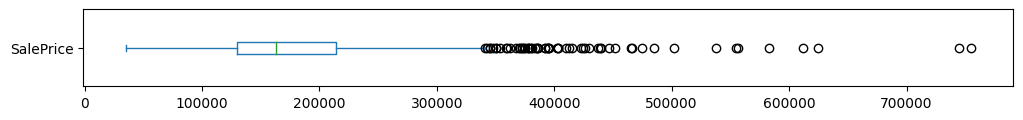

In [122]:
df.SalePrice.plot.box(vert=False, figsize=(12,1));

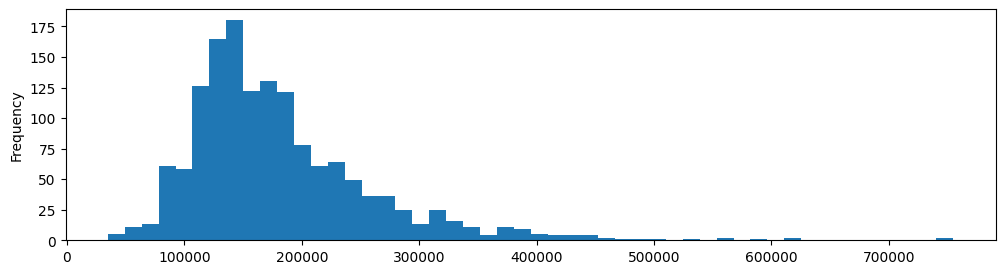

In [123]:
df.SalePrice.plot.hist(bins=50, figsize=(12,3));

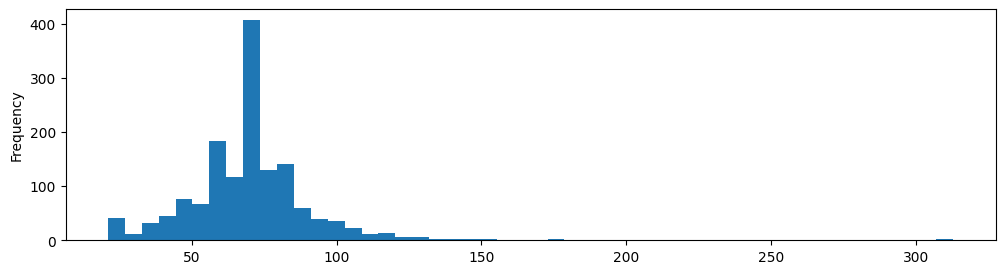

In [124]:
df.LotFrontage.plot.hist(bins=50, figsize=(12,3));

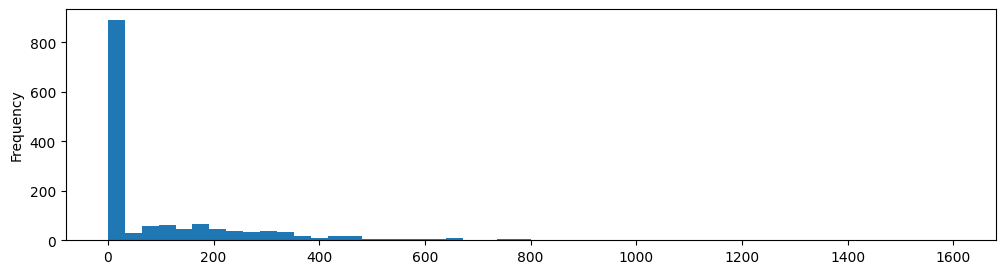

In [125]:
df.MasVnrArea.plot.hist(bins=50, figsize=(12,3));

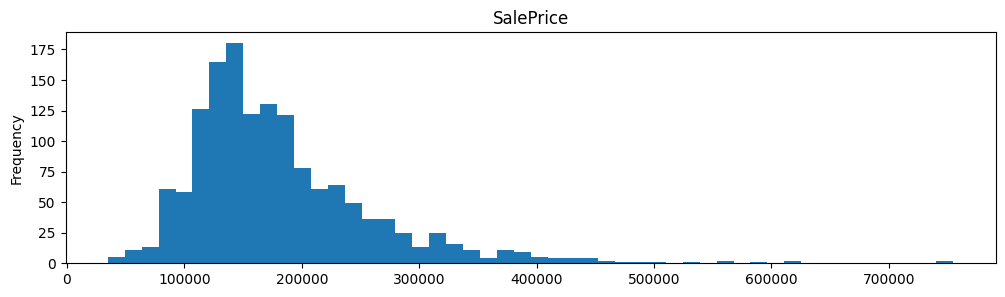

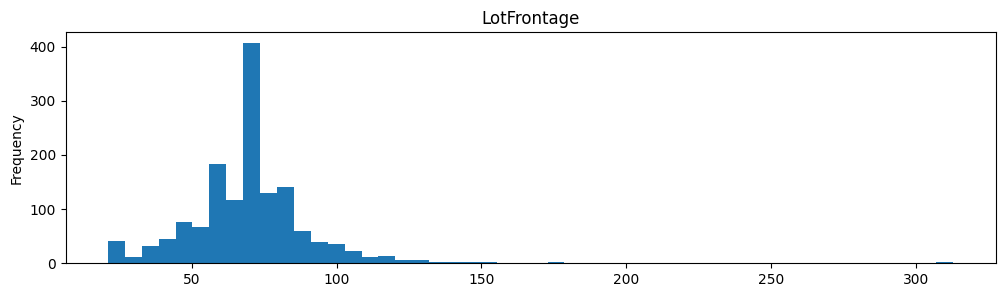

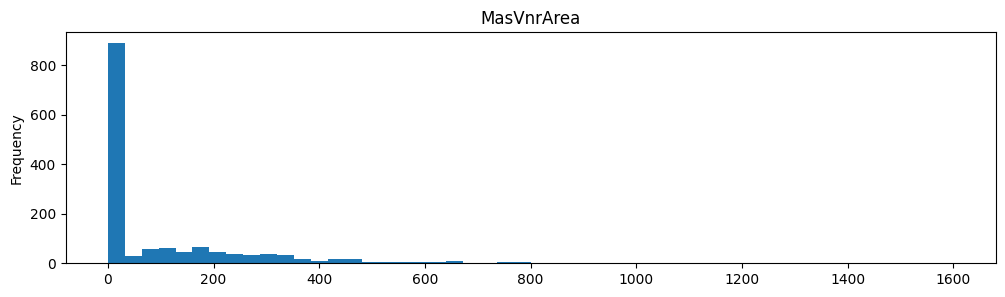

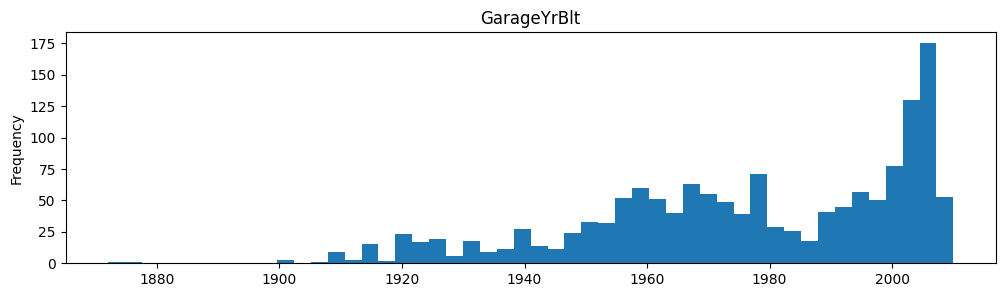

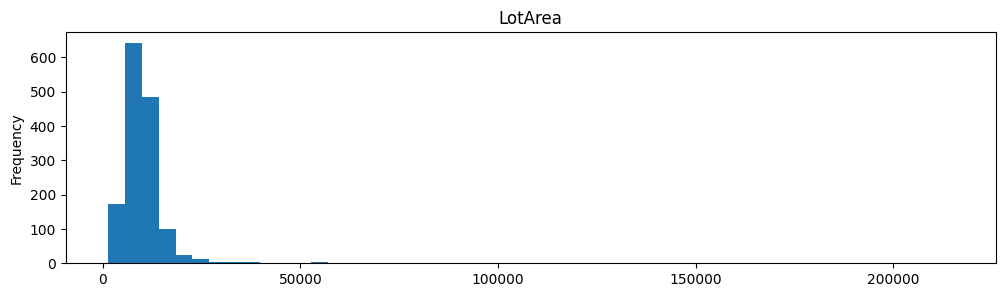

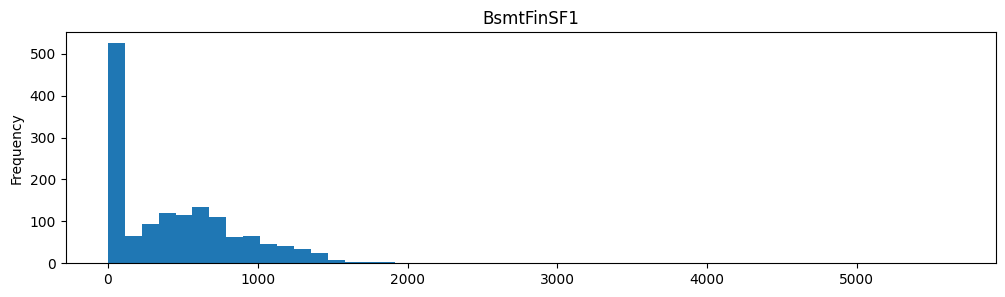

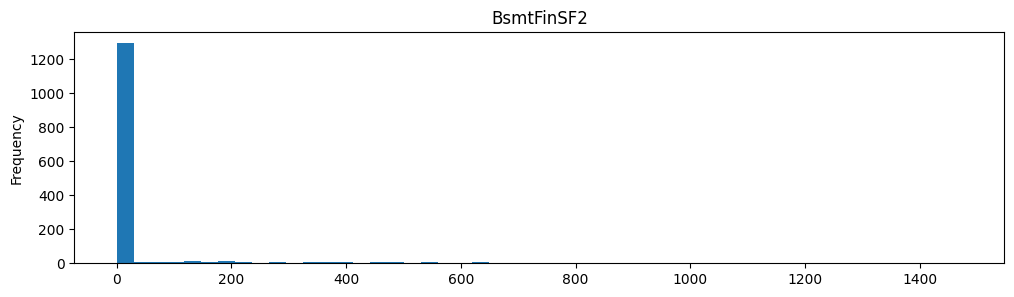

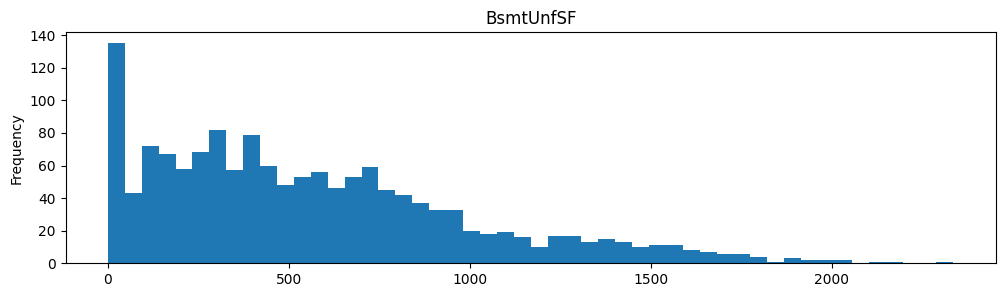

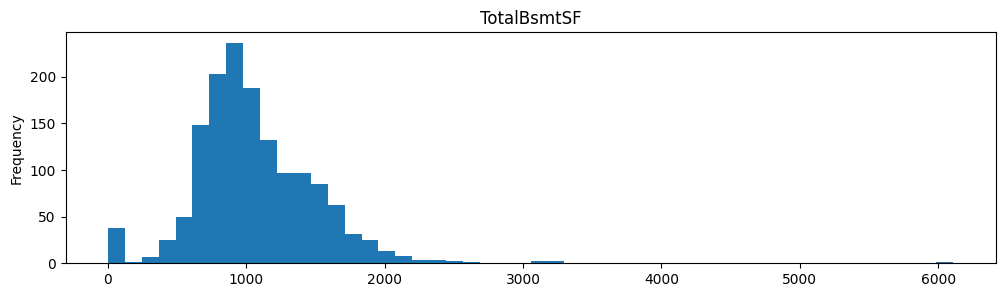

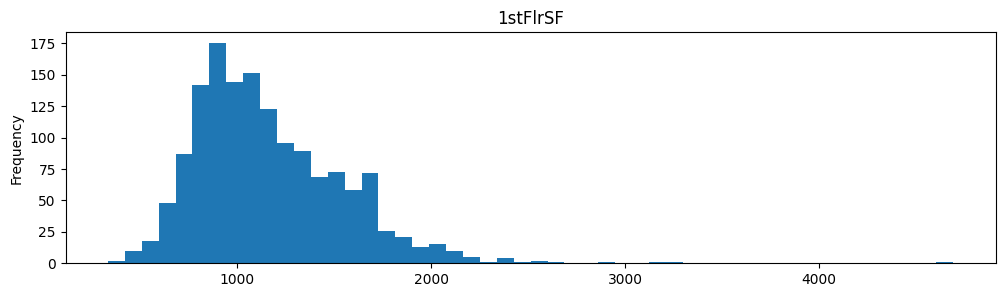

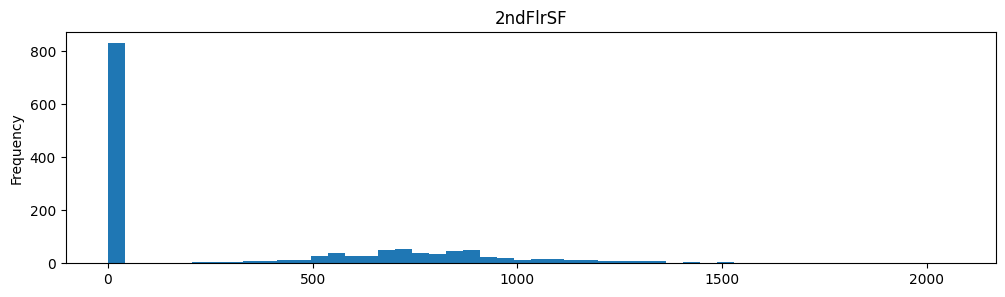

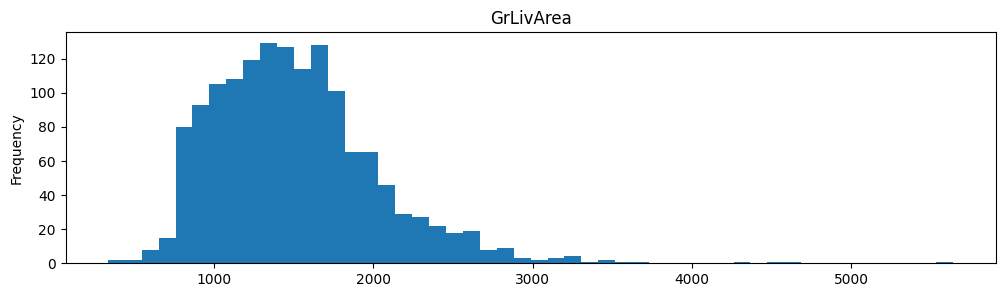

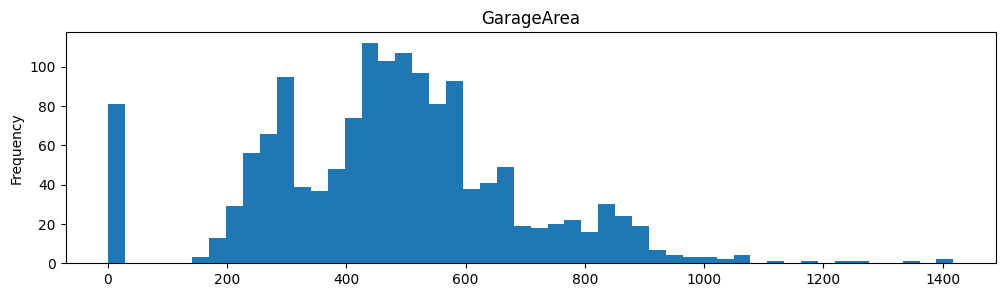

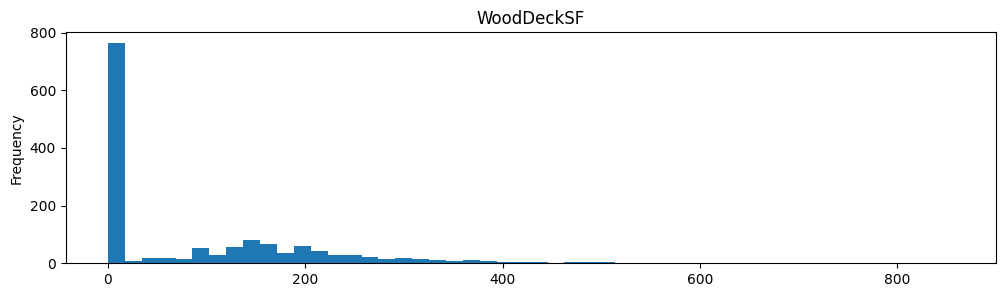

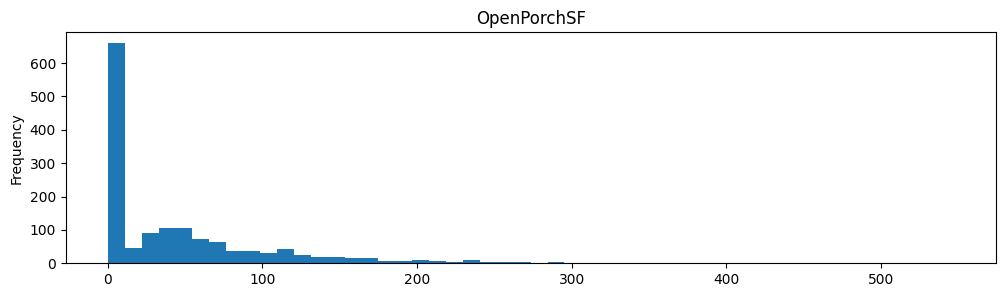

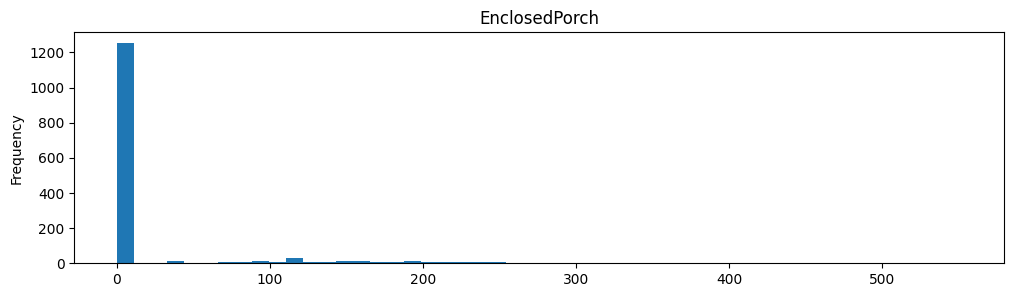

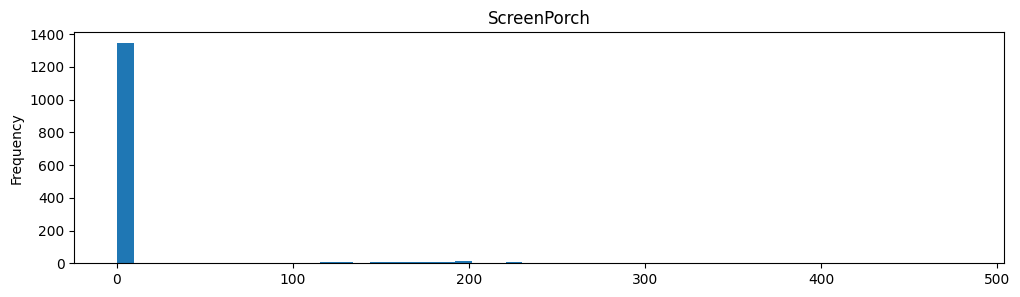

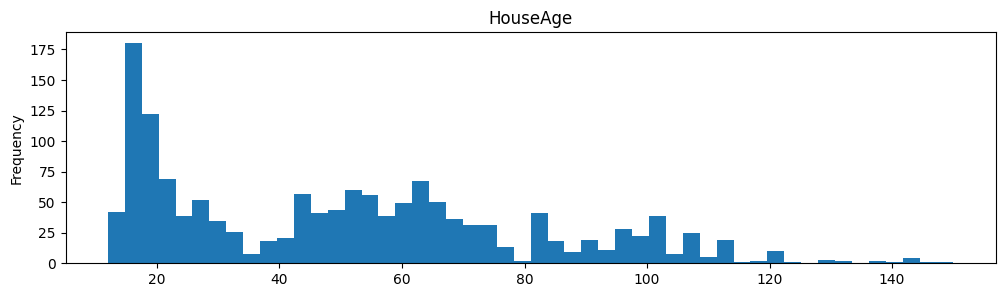

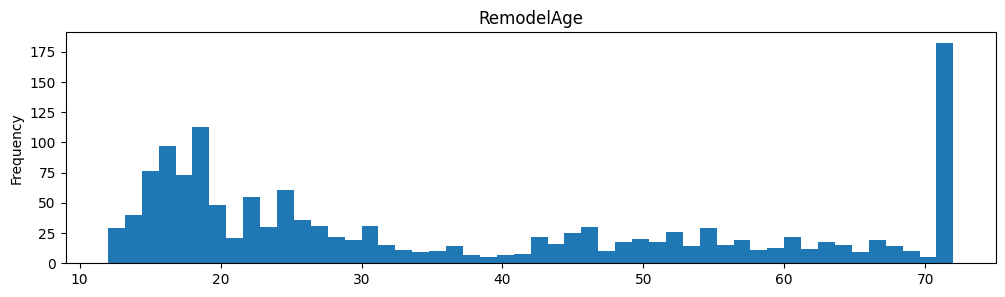

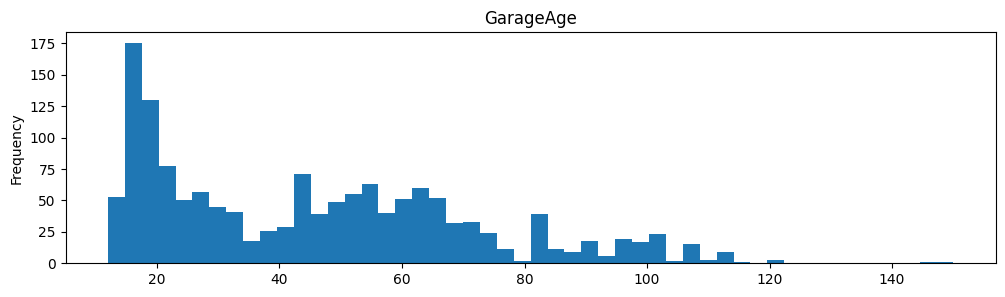

In [126]:
for col in feat_num_continuous:
    df[col].plot.hist(bins=50, figsize=(12,3), title=col)
    plt.show()

In [127]:
label_size = 8
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
plt.rcParams['axes.labelsize'] = 9 


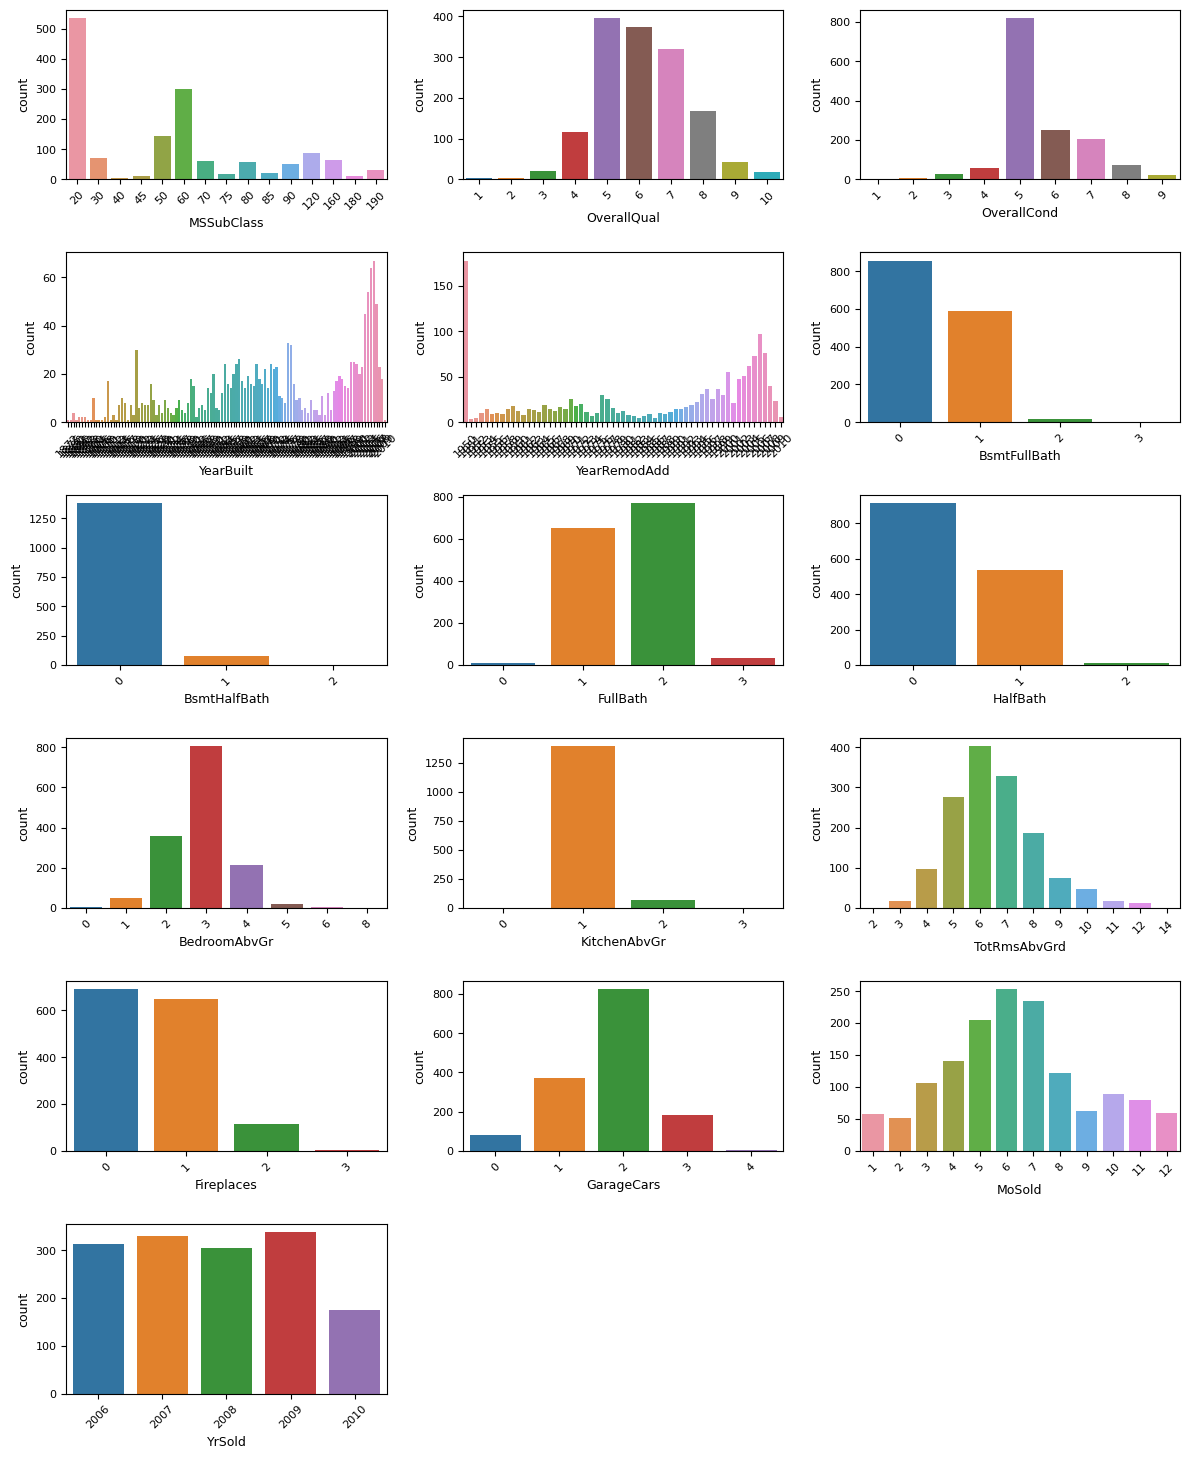

In [128]:
plt.figure(figsize=(12,36))
i = 1

for col in feat_num_discrete:
    plt.subplot(15, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation = 45)
    i += 1
plt.tight_layout()
plt.show()

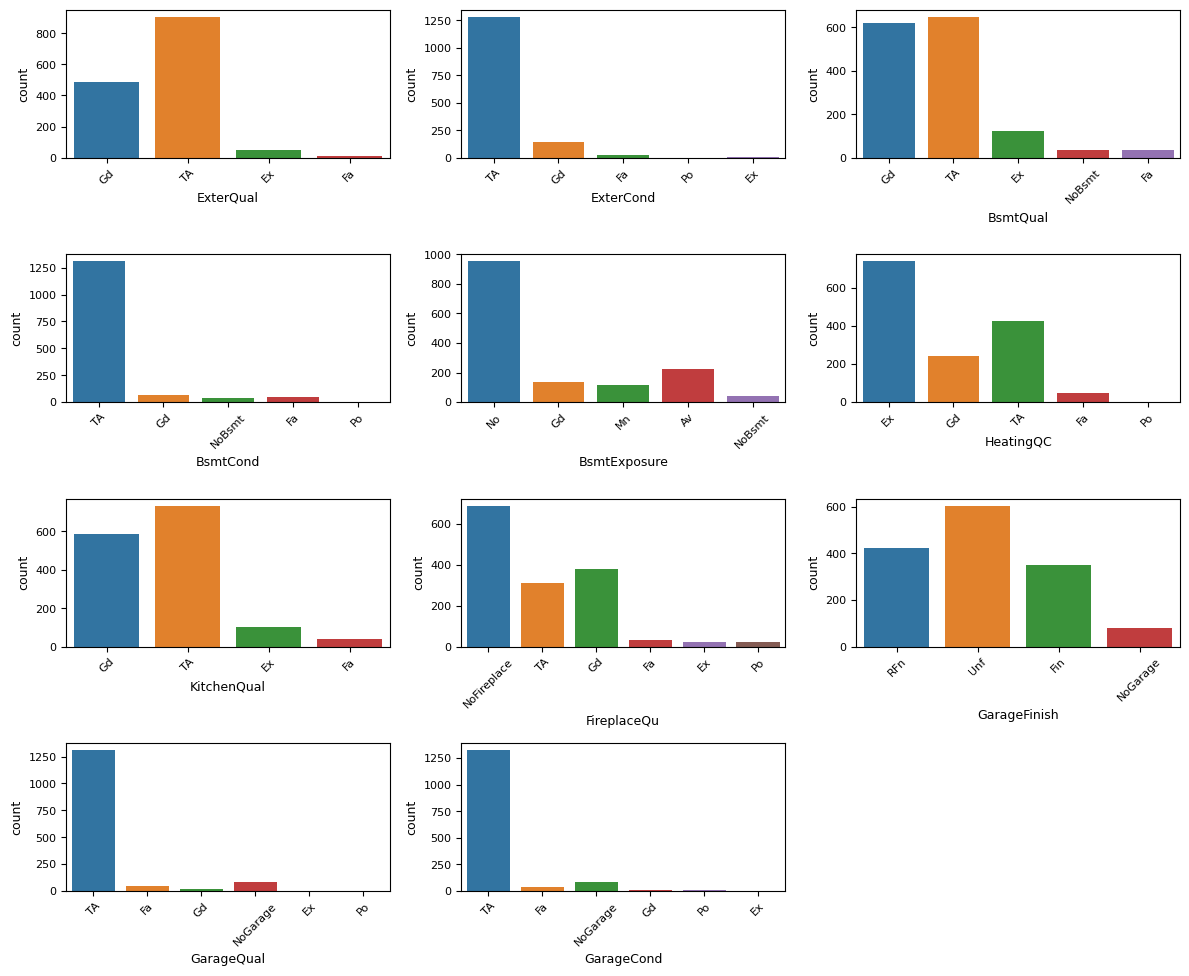

In [129]:
plt.figure(figsize=(12,36))
i = 1

for col in feat_cat_ordinal:
    plt.subplot(15, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation = 45)
    i += 1
plt.tight_layout()
plt.show()

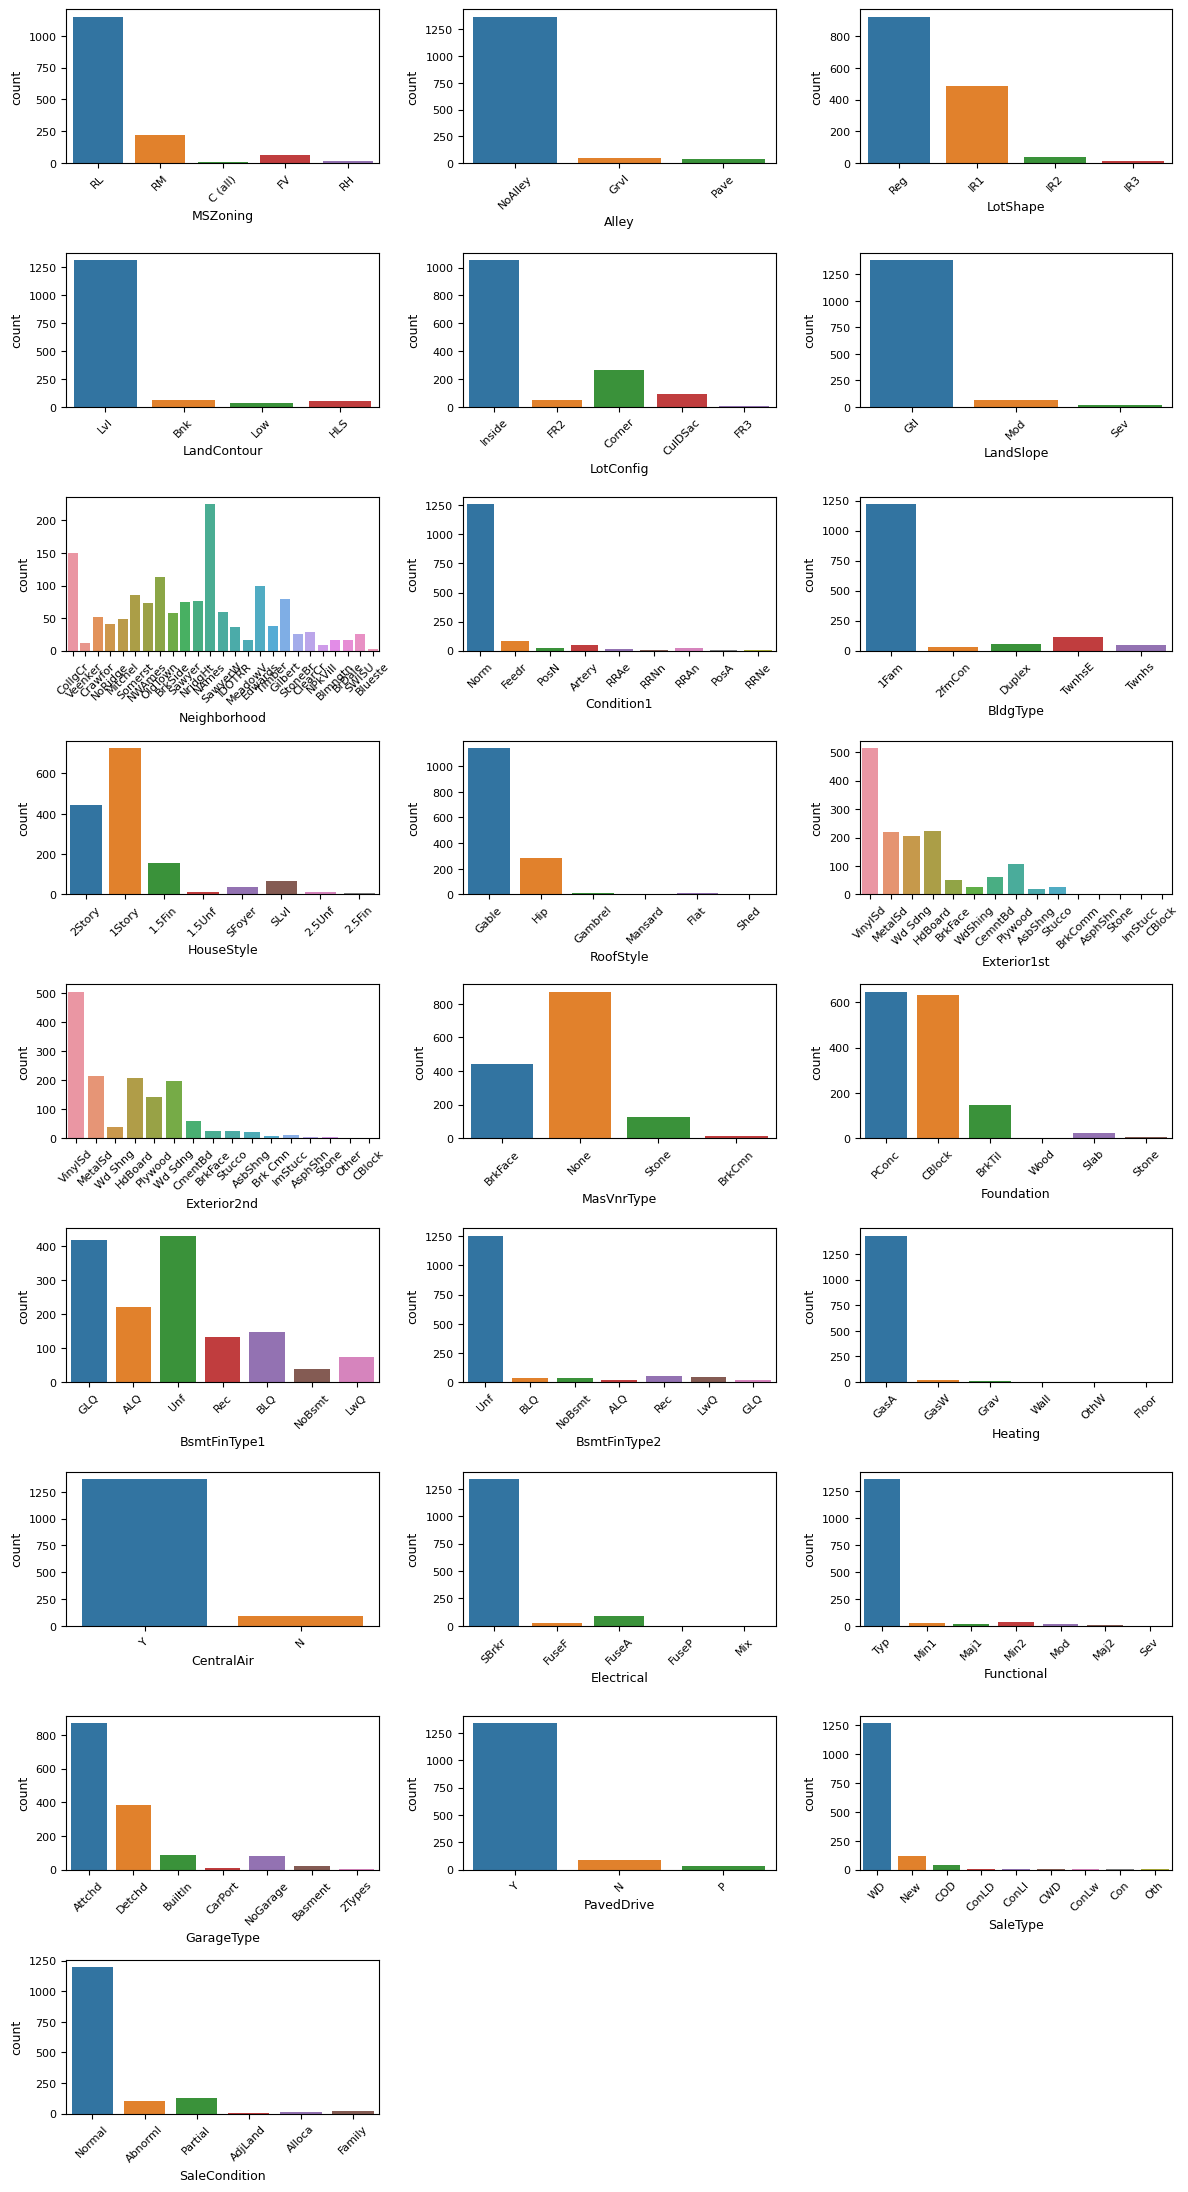

In [130]:
plt.figure(figsize=(12,36))
i = 1

for col in feat_num_nominal:
    plt.subplot(15, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation = 45)
    i += 1
plt.tight_layout()
plt.show()

#### Univariate Analysis Observations:
- Data has outliers
- Most variable distribution is skewed, including the target vaiable
- Most houses have Overall Quality between 5 and 7
- Most houses have Overall Condition between 5 and 7
- Most houses donot have bathroom in basement
- 50% of the houses donot have fireplace
- Most houses sold between March to August
- Most houses have typical exterior quality and exterior condition
- Most of the kitchen quality is Good or Typical
- Most houses sold were with Warranty Deed - Conventional
- Most houses sold when sale condition is normal

### Segmented-Univariate Analysis

In [131]:
def plot_uni_seg(x, y):
    order = list(df.groupby(by=x)[y].median().sort_values().index)
    plt.figure(figsize=(12,3))
    plt.xticks(rotation = 45)
    sns.boxplot(x=x, y=y, data=df, order=order);

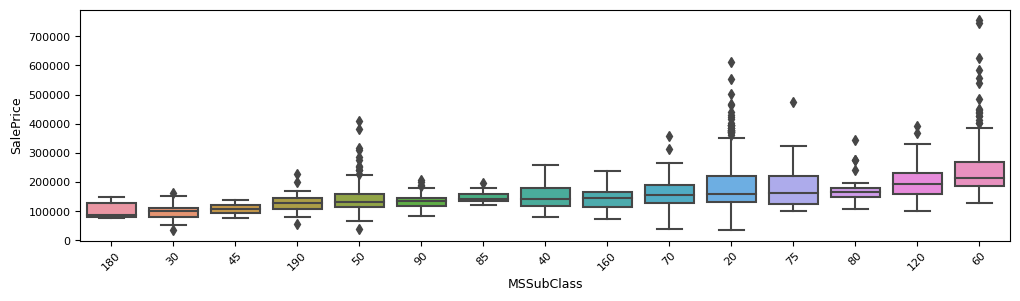

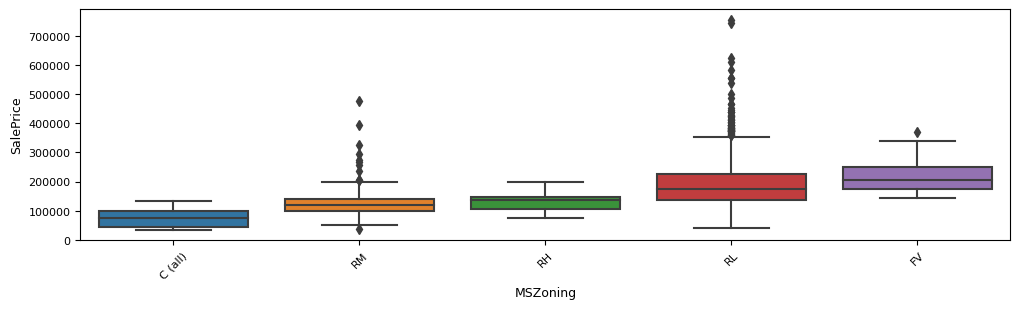

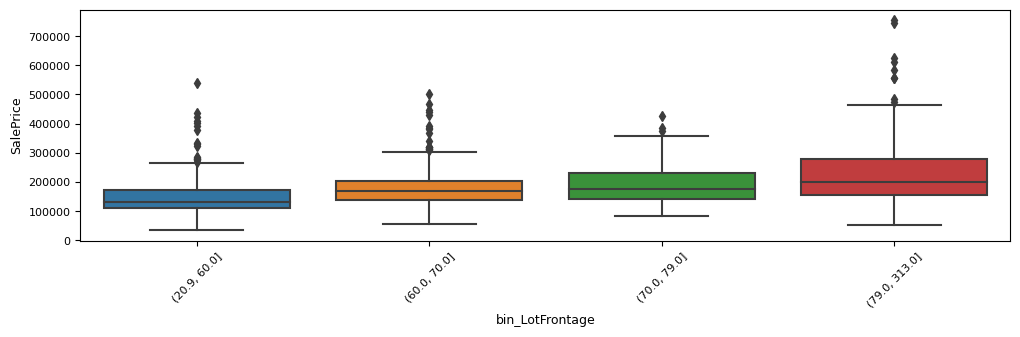

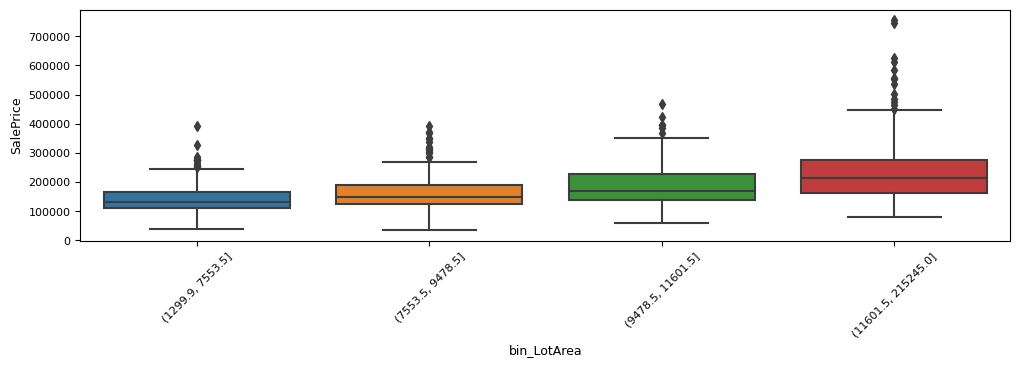

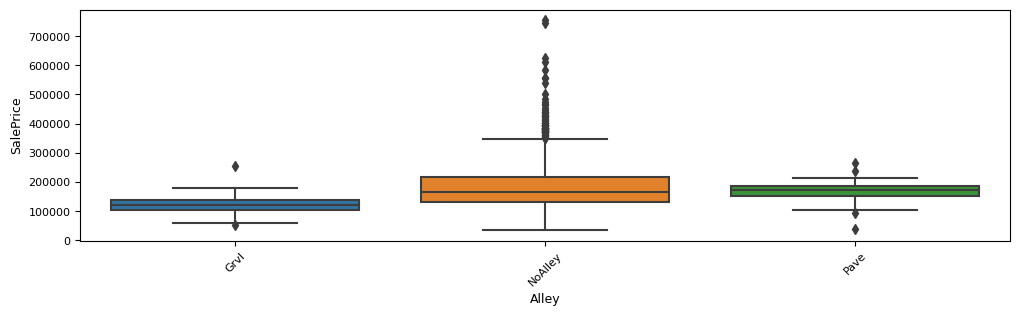

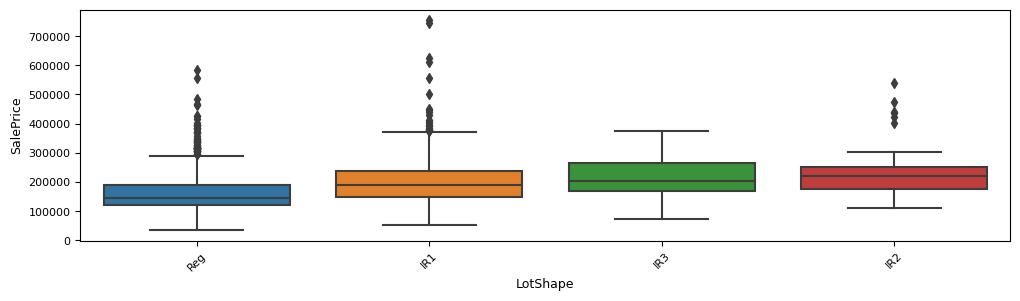

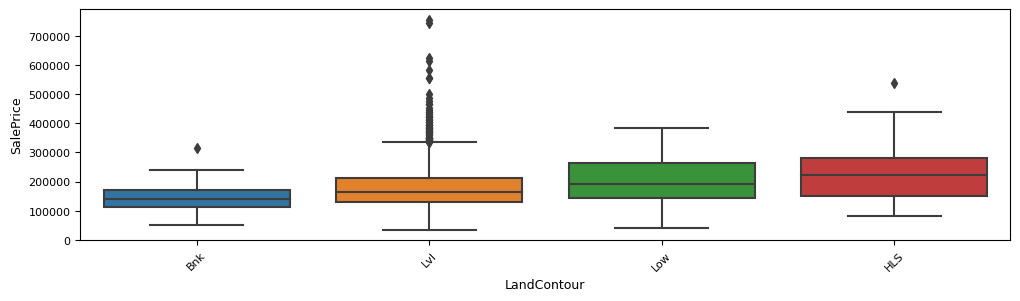

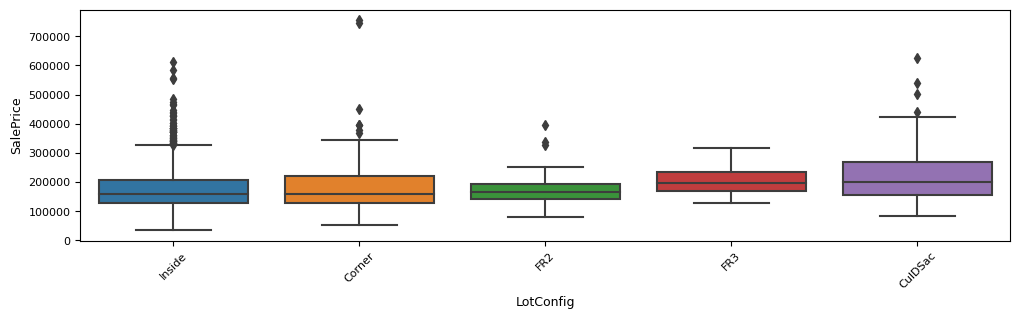

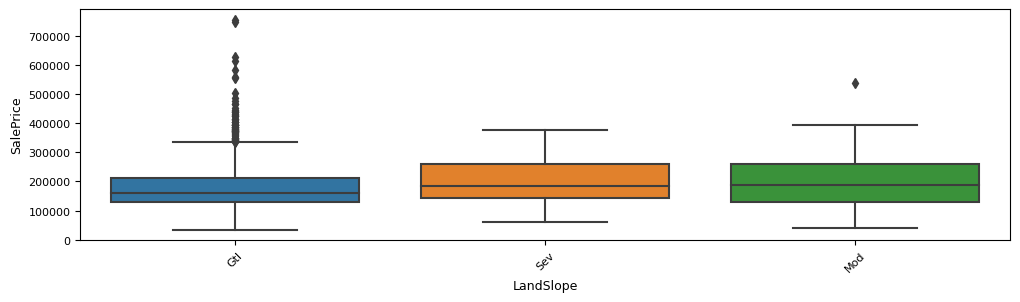

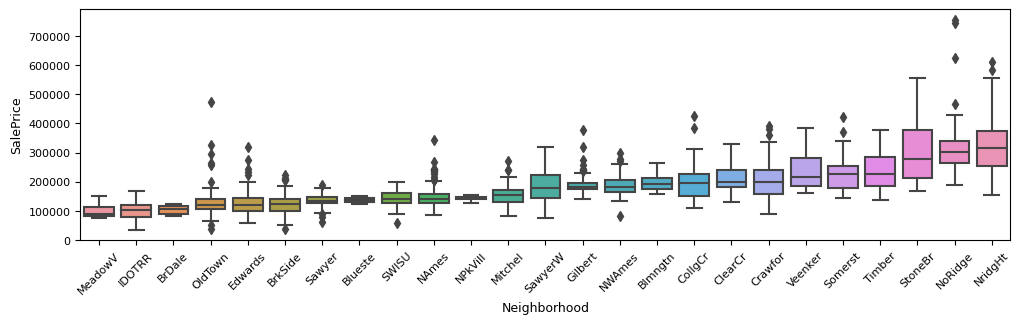

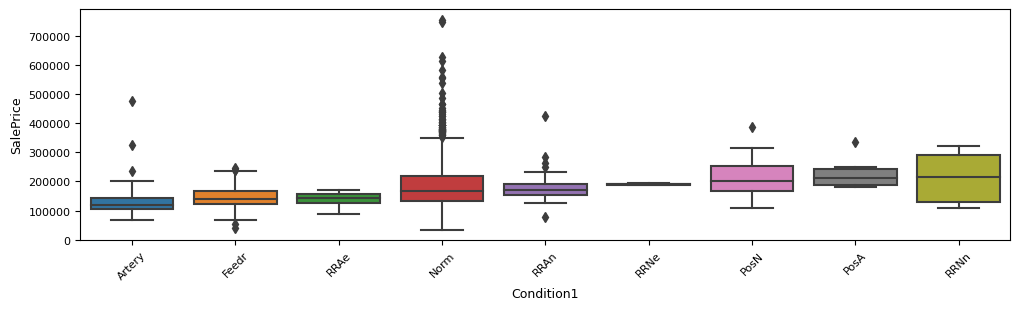

In [132]:
for col in cat_location_attr:
    plot_uni_seg(x=col, y='SalePrice');

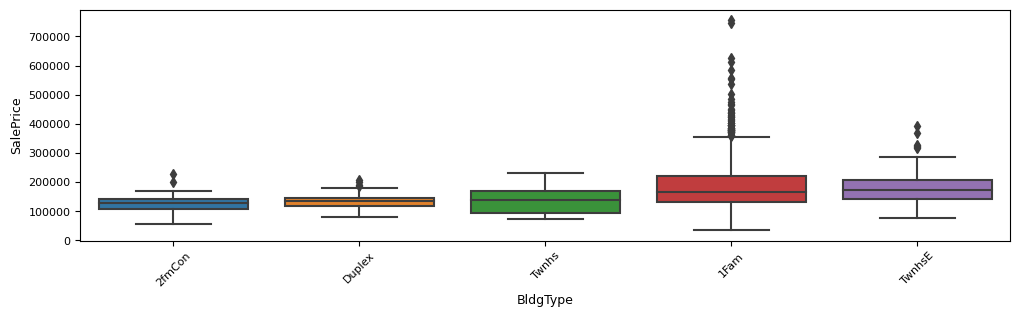

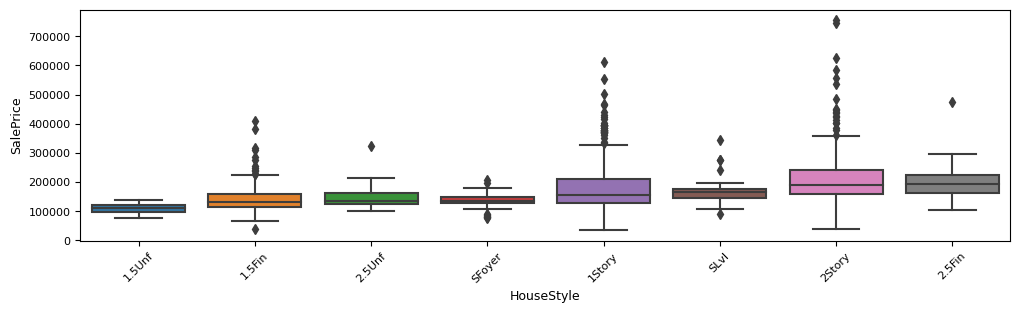

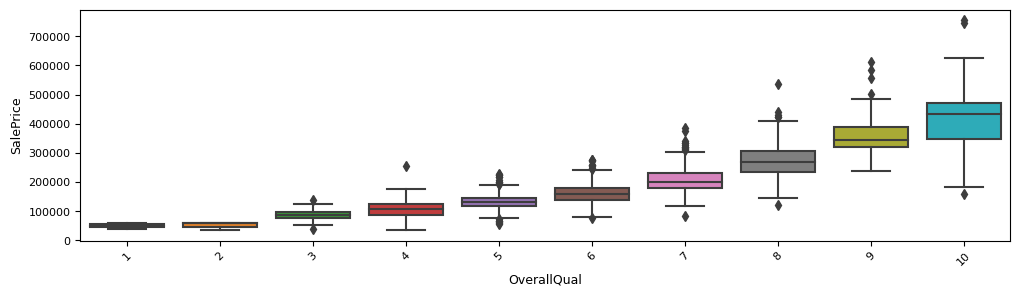

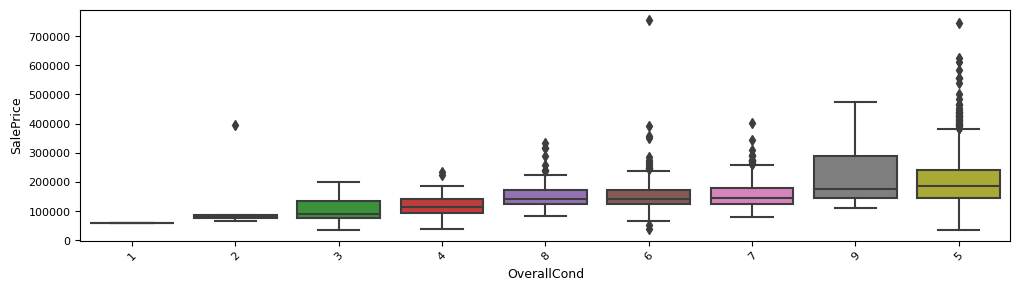

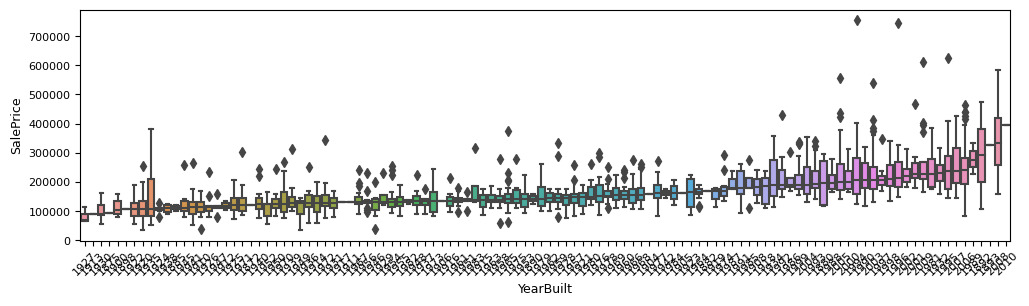

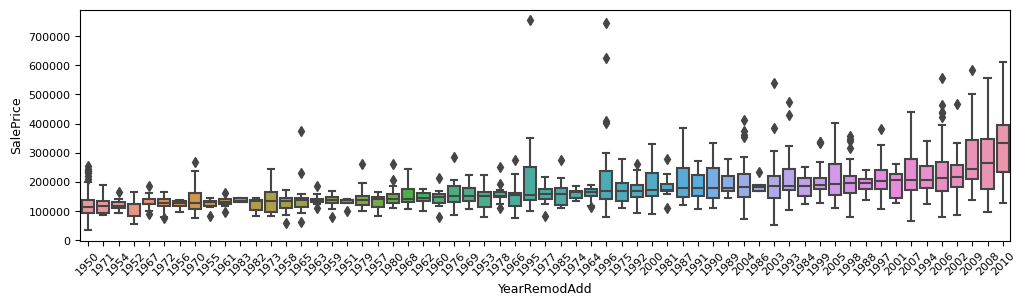

In [133]:
for col in cat_basic_attr:
    plot_uni_seg(x=col, y='SalePrice');

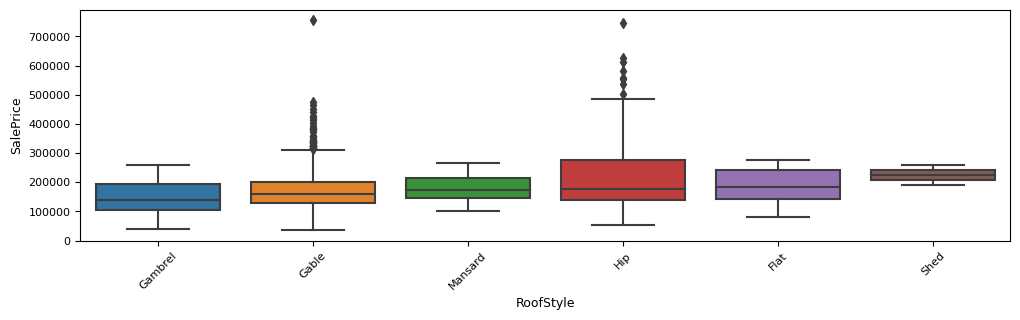

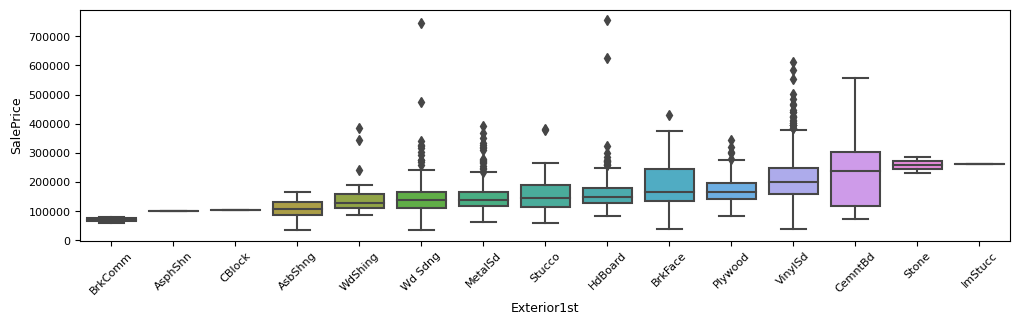

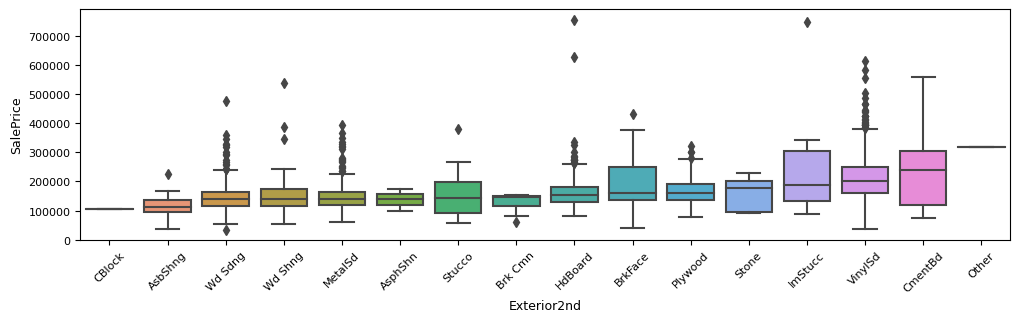

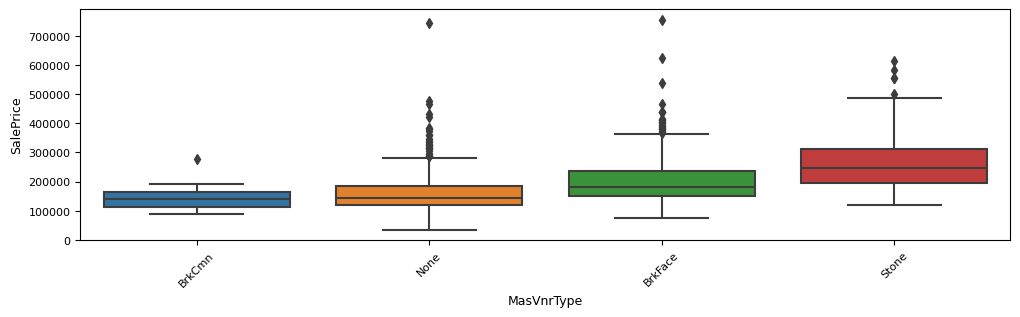

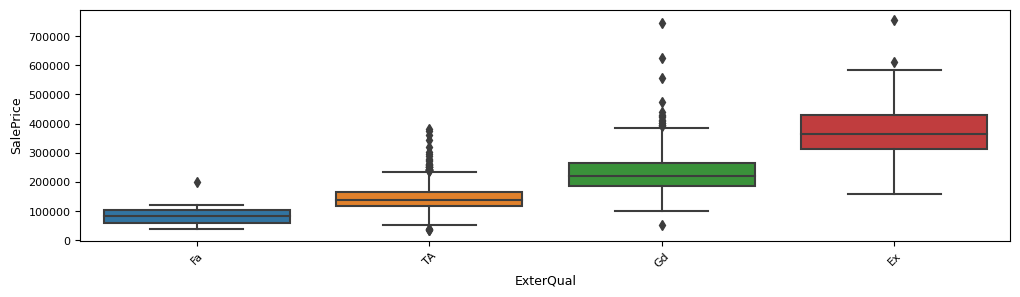

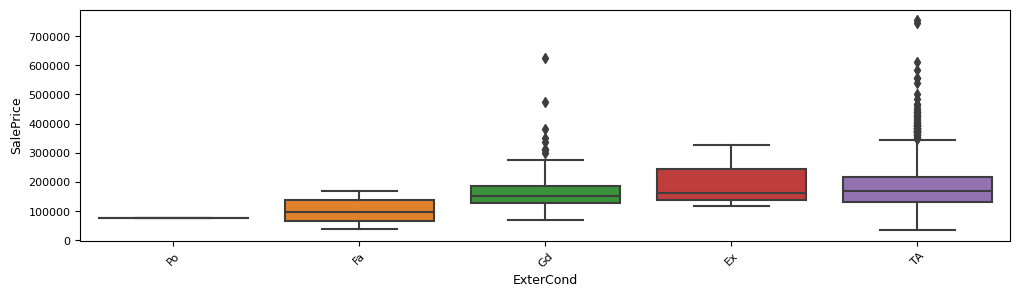

In [134]:
for col in cat_exterior_attr:
    plot_uni_seg(x=col, y='SalePrice');

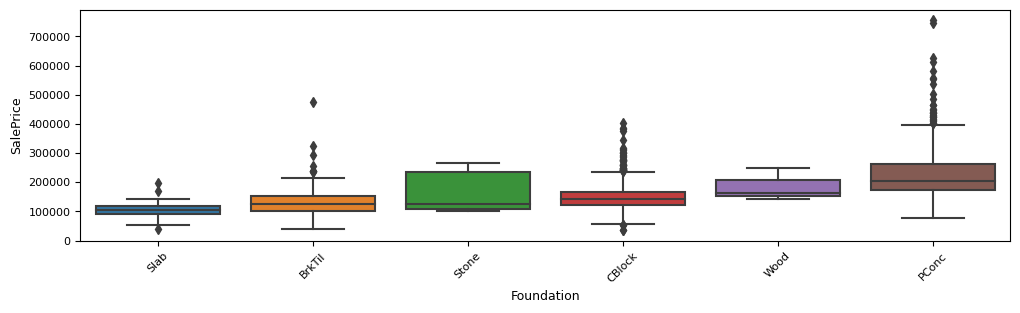

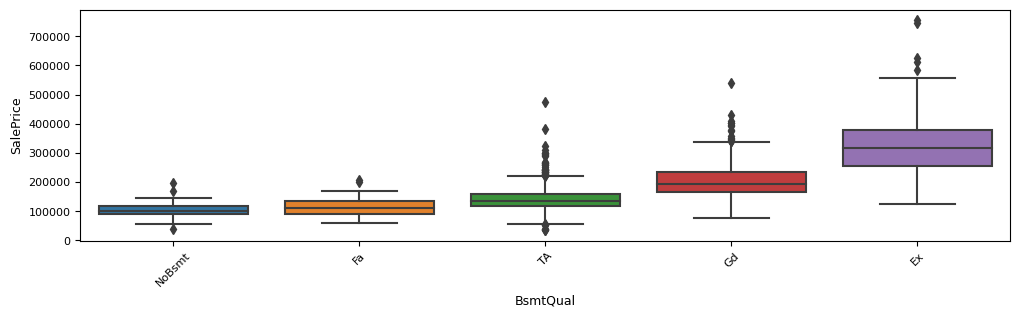

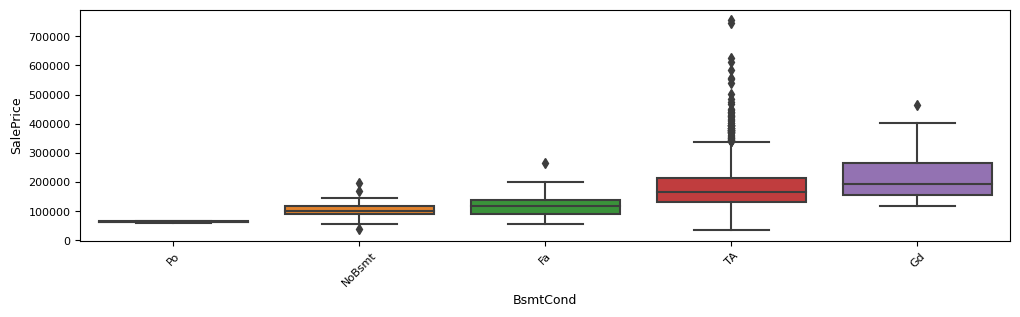

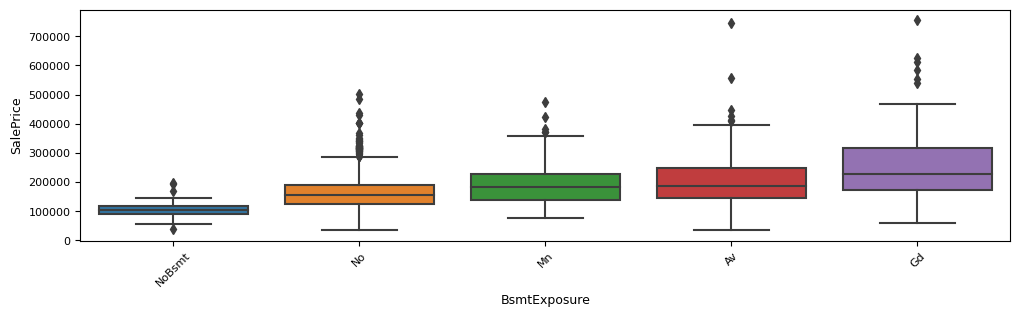

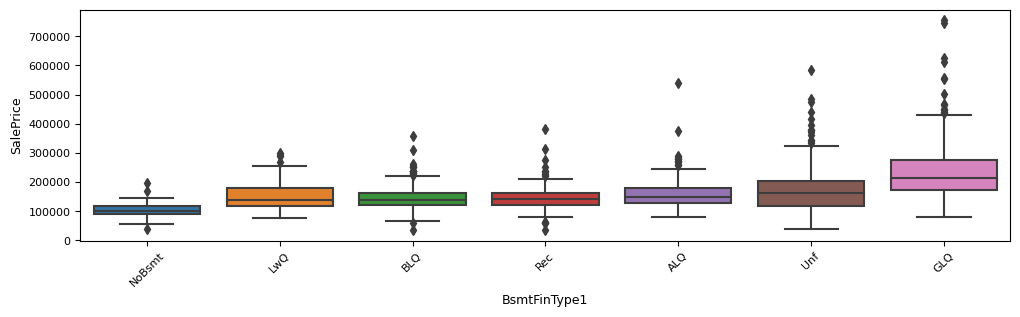

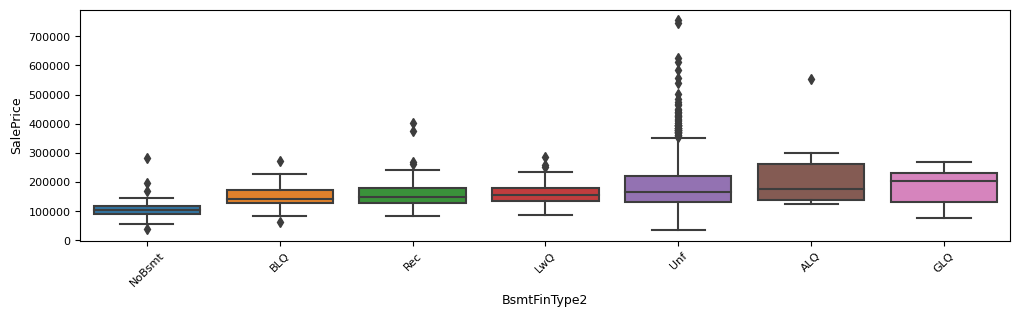

In [135]:
for col in cat_basement_attr:
    plot_uni_seg(x=col, y='SalePrice');

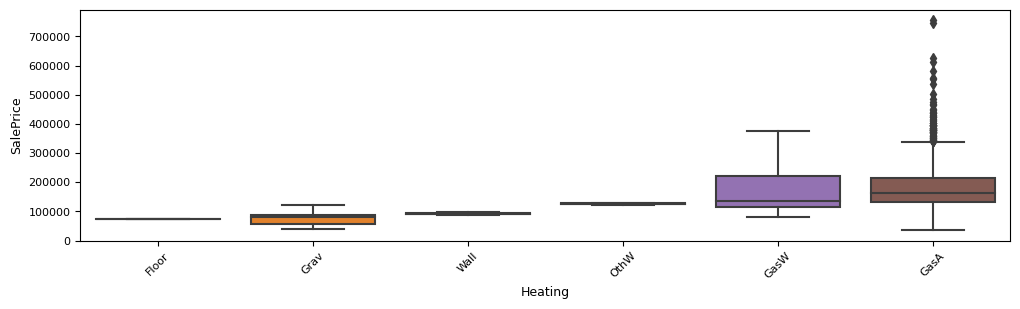

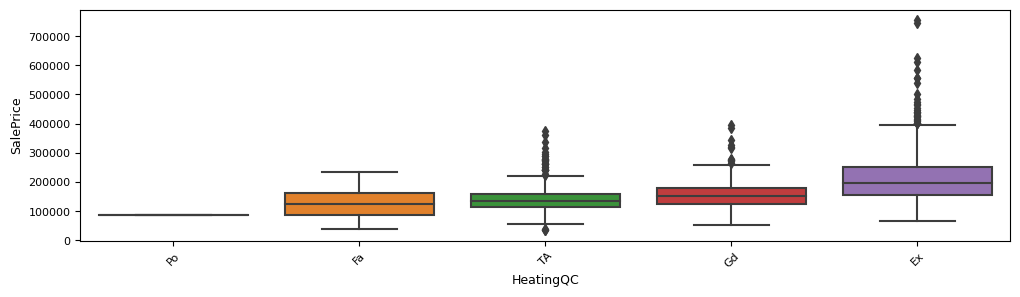

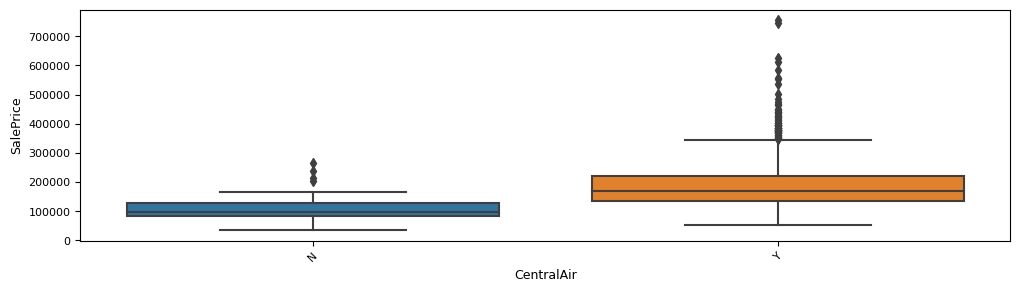

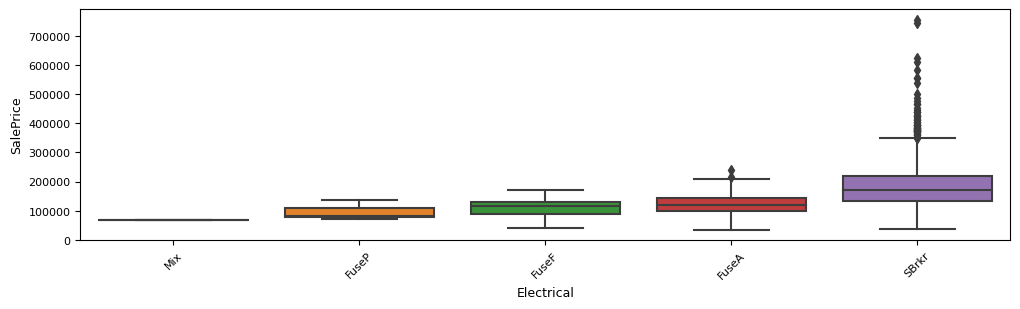

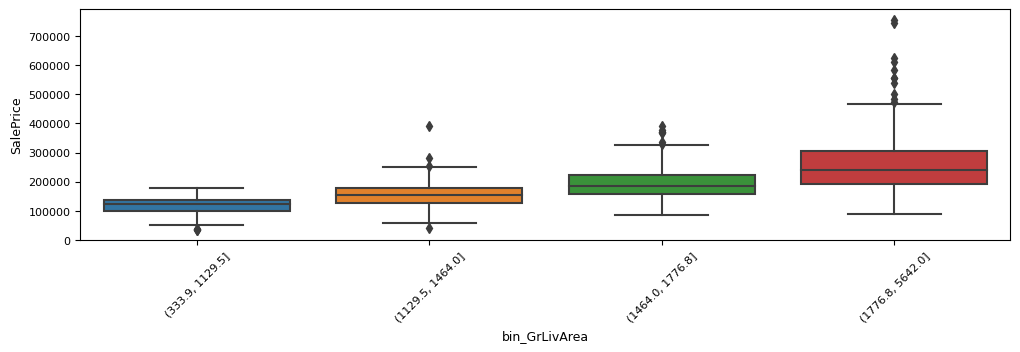

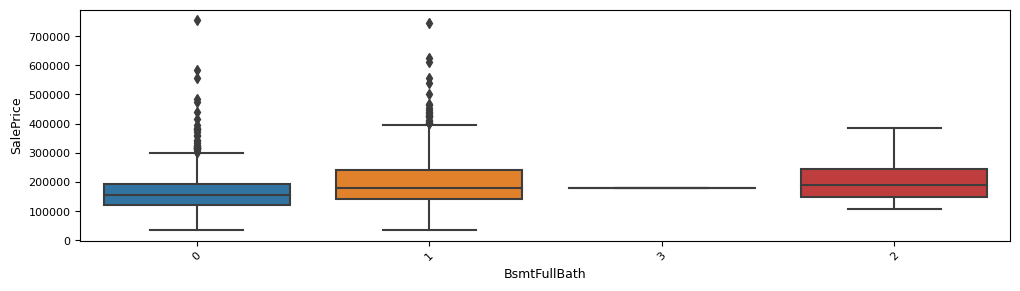

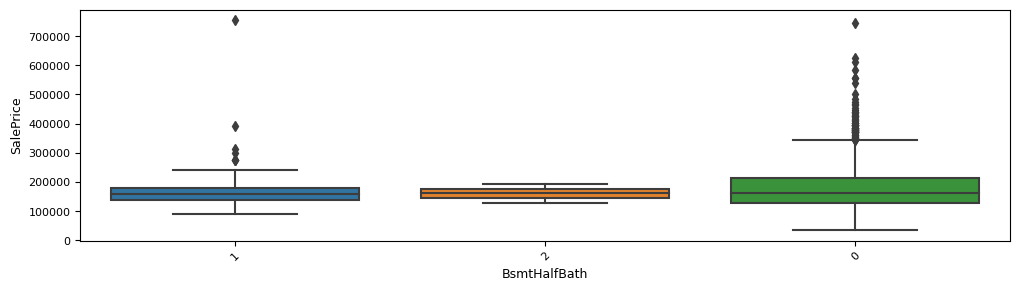

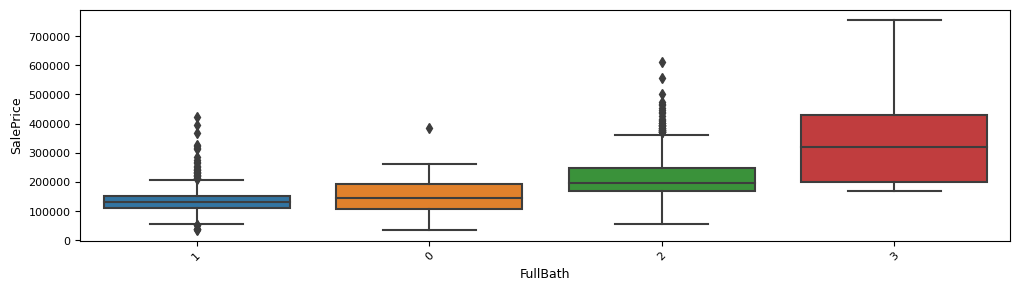

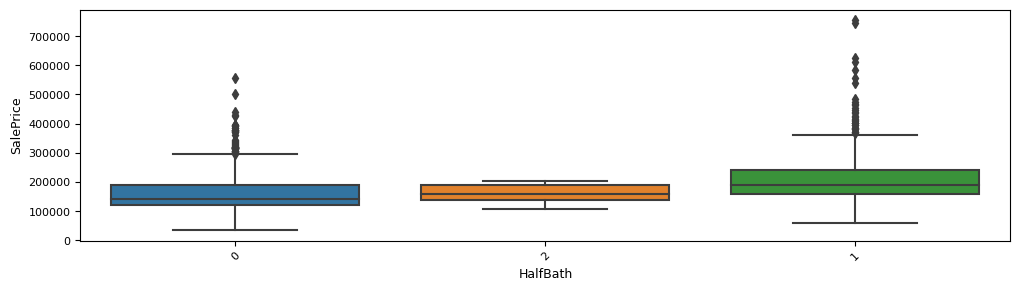

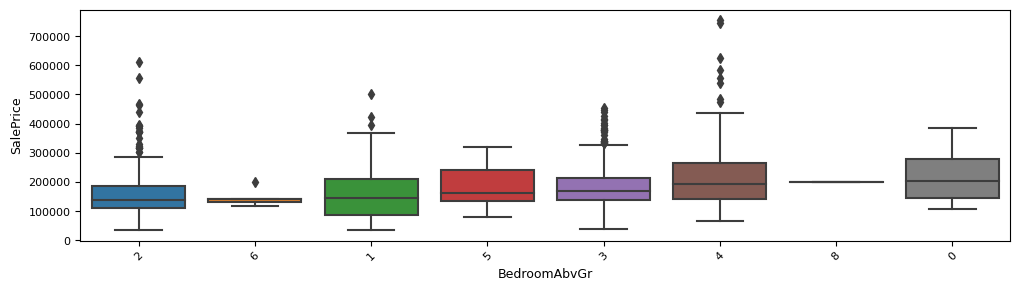

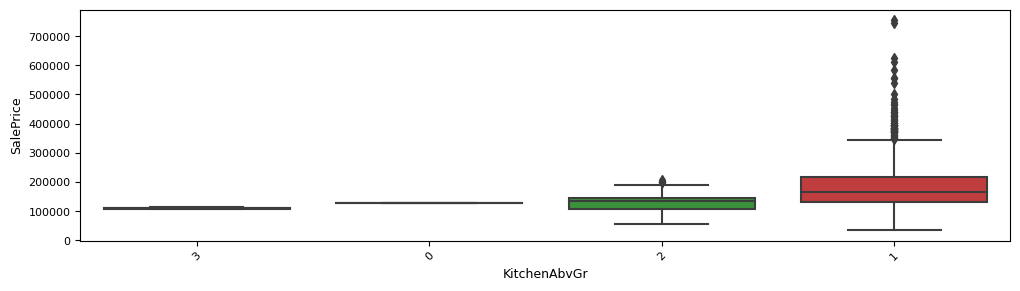

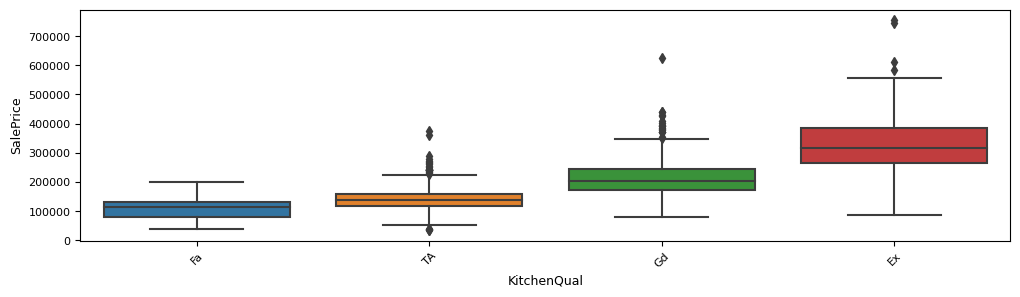

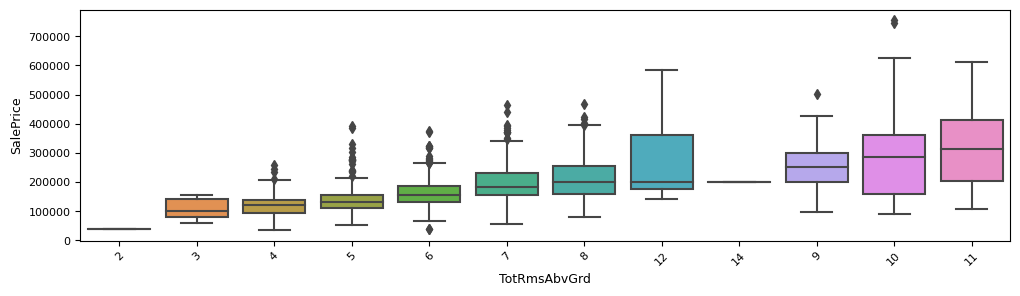

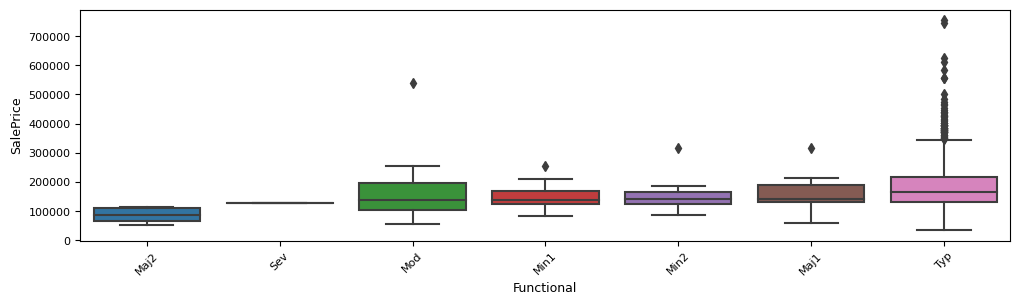

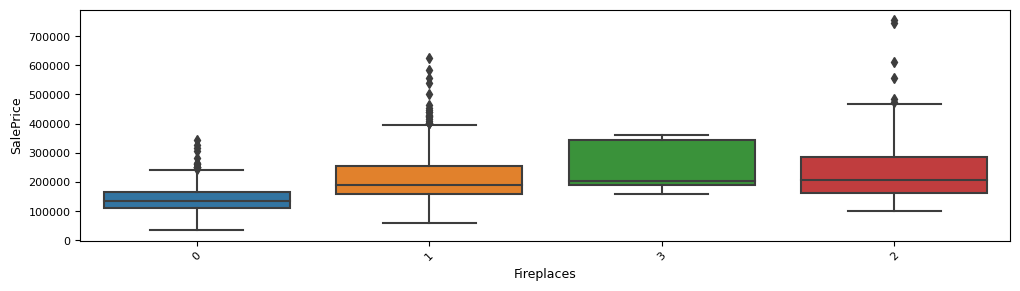

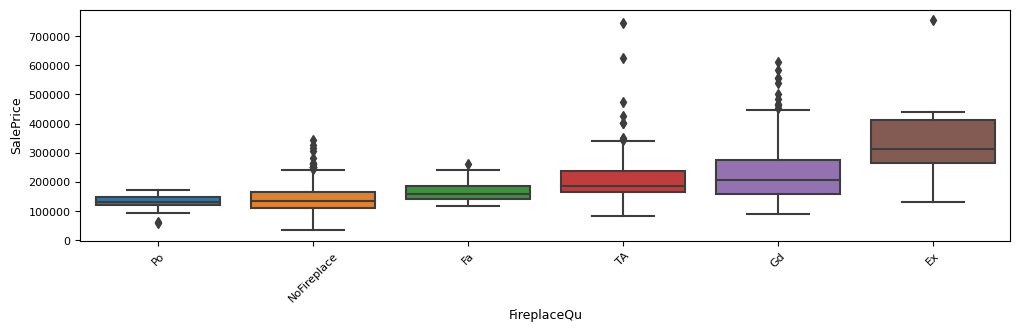

In [136]:
for col in cat_interior_attr:
    plot_uni_seg(x=col, y='SalePrice');

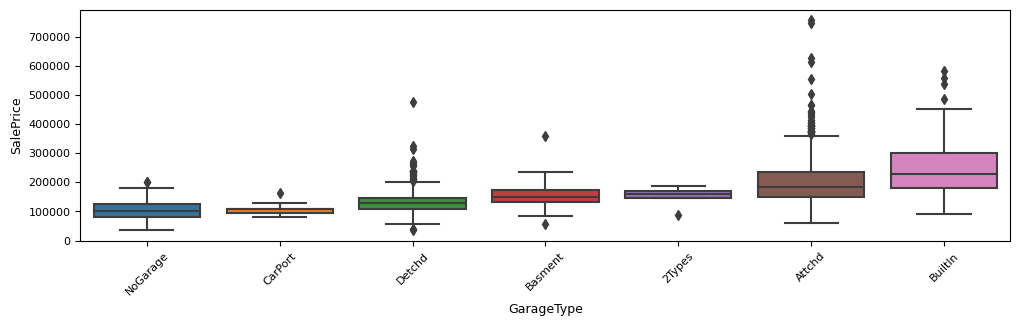

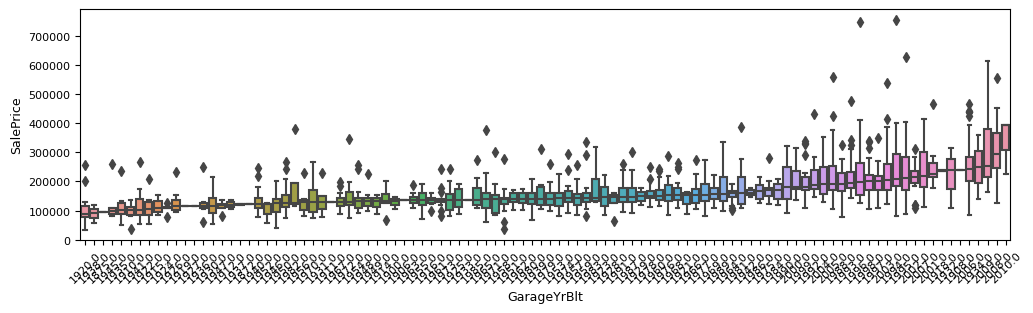

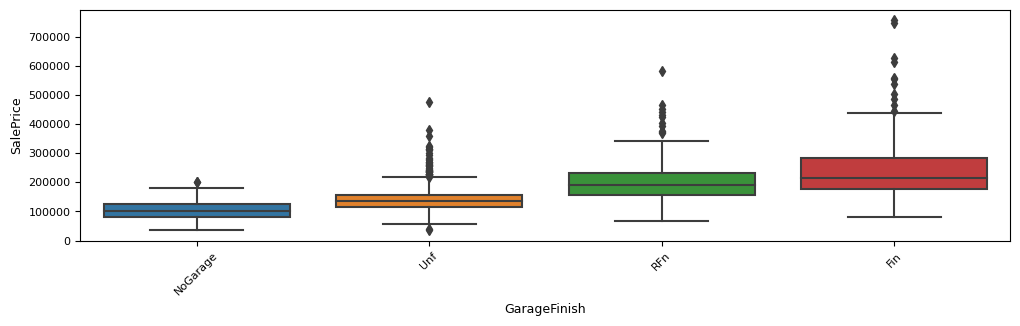

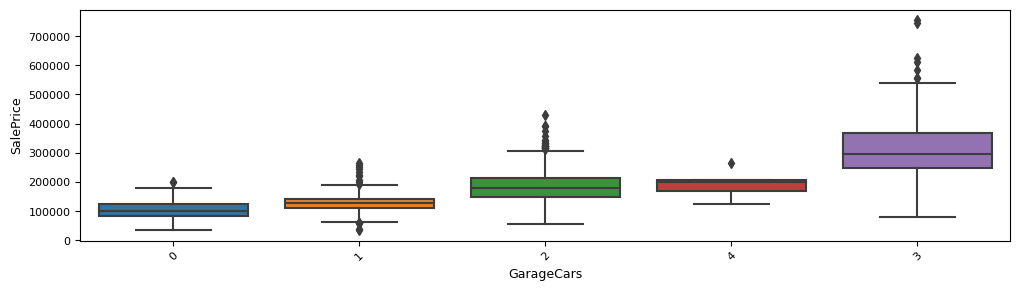

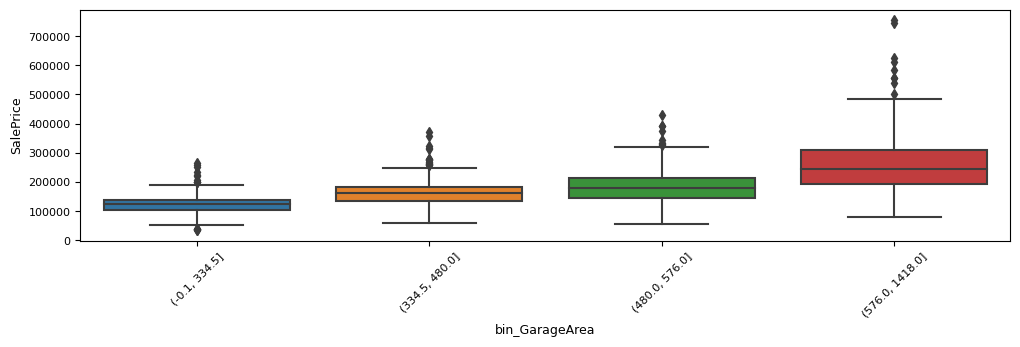

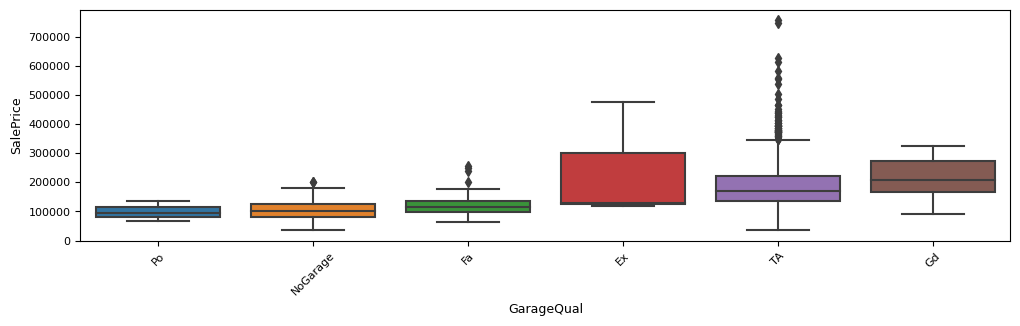

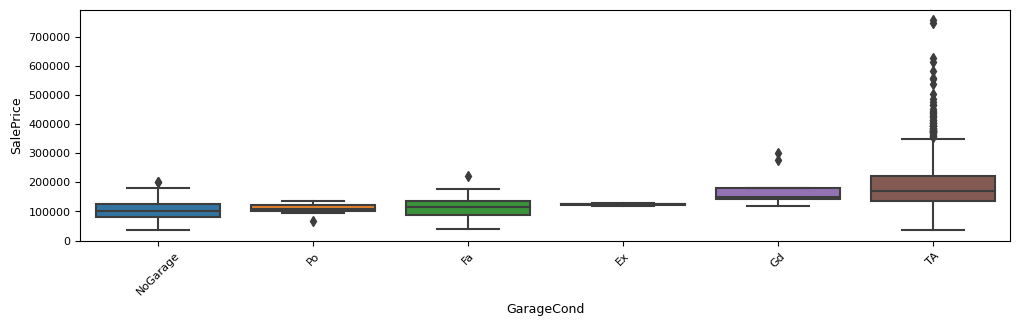

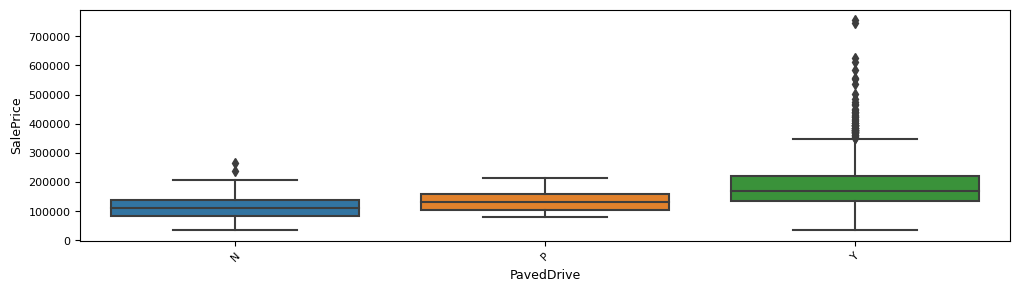

In [137]:
for col in cat_garage_attr:
    plot_uni_seg(x=col, y='SalePrice');

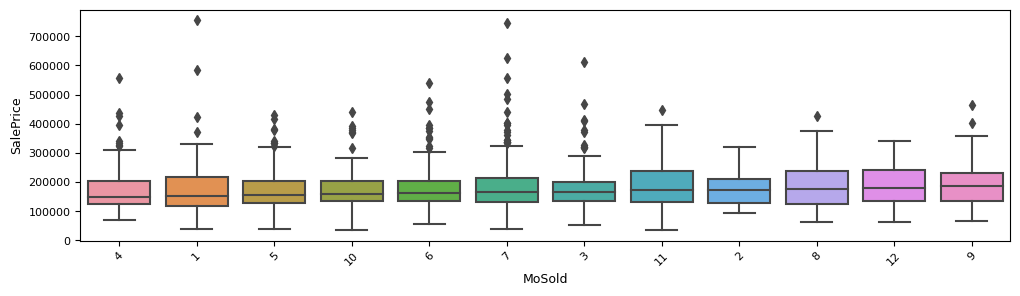

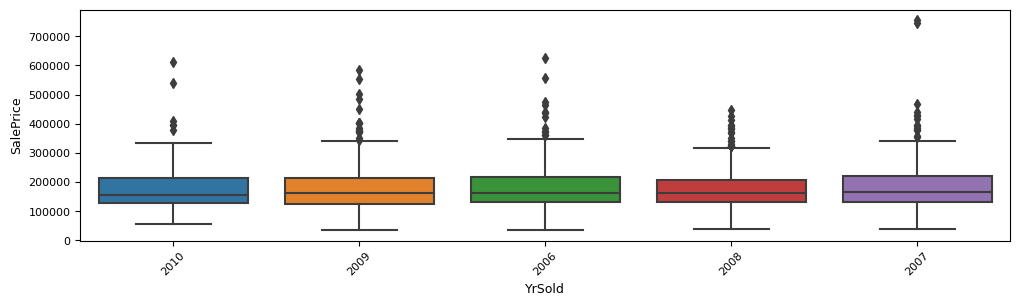

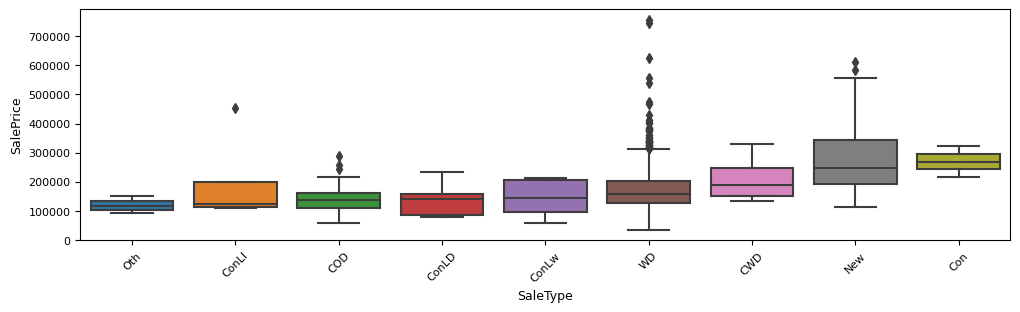

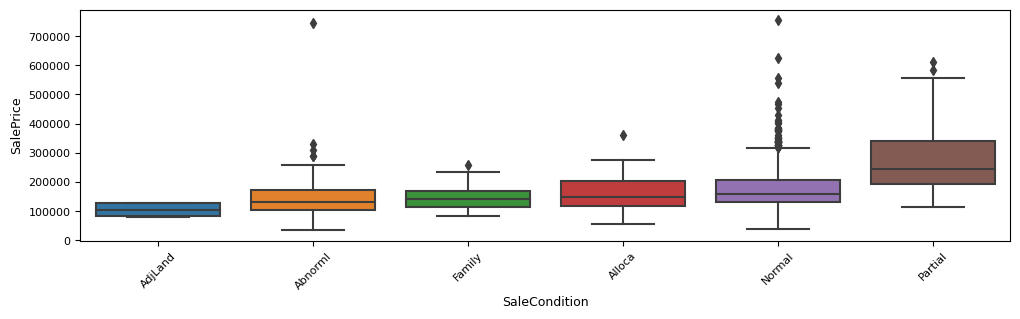

In [138]:
for col in cat_sale_attr:
    plot_uni_seg(x=col, y='SalePrice');

#### Segmented-Univariate Analysis Observations:

Sale price is high when

- house zone is Floating Village Residential or Residential Low Density 
- Forntage is higher
- Lot Area is higher
- house in Stone Brook, or Northridge or Northridge Heights
- overall quality is above 5
- overall condition is above 5 
- house age is low
- Exterior quality is good or excellent
- Exterior condition is excellent or Typical
- Foundation is Poured Contrete
- basement quality is excellent
- basement condition is typical or good
- heating quality is good or excellent
- Central air conditioning is available
- Above grade (ground) living area is higher
- more bathrooms are available
- kitchen quality is good or excellent
- Total rooms above grade are more
- house has atleast one fireplace
- garage is attached or built-in
- garage is recently built
- garage is bigger
- garage has paved drive
- sale type is Contract 15% Down payment regular terms or Home just constructed and sold
- sale condition is normal or partial (Home was not completed when last assessed (associated with New Homes))

### Bivariate Analysis

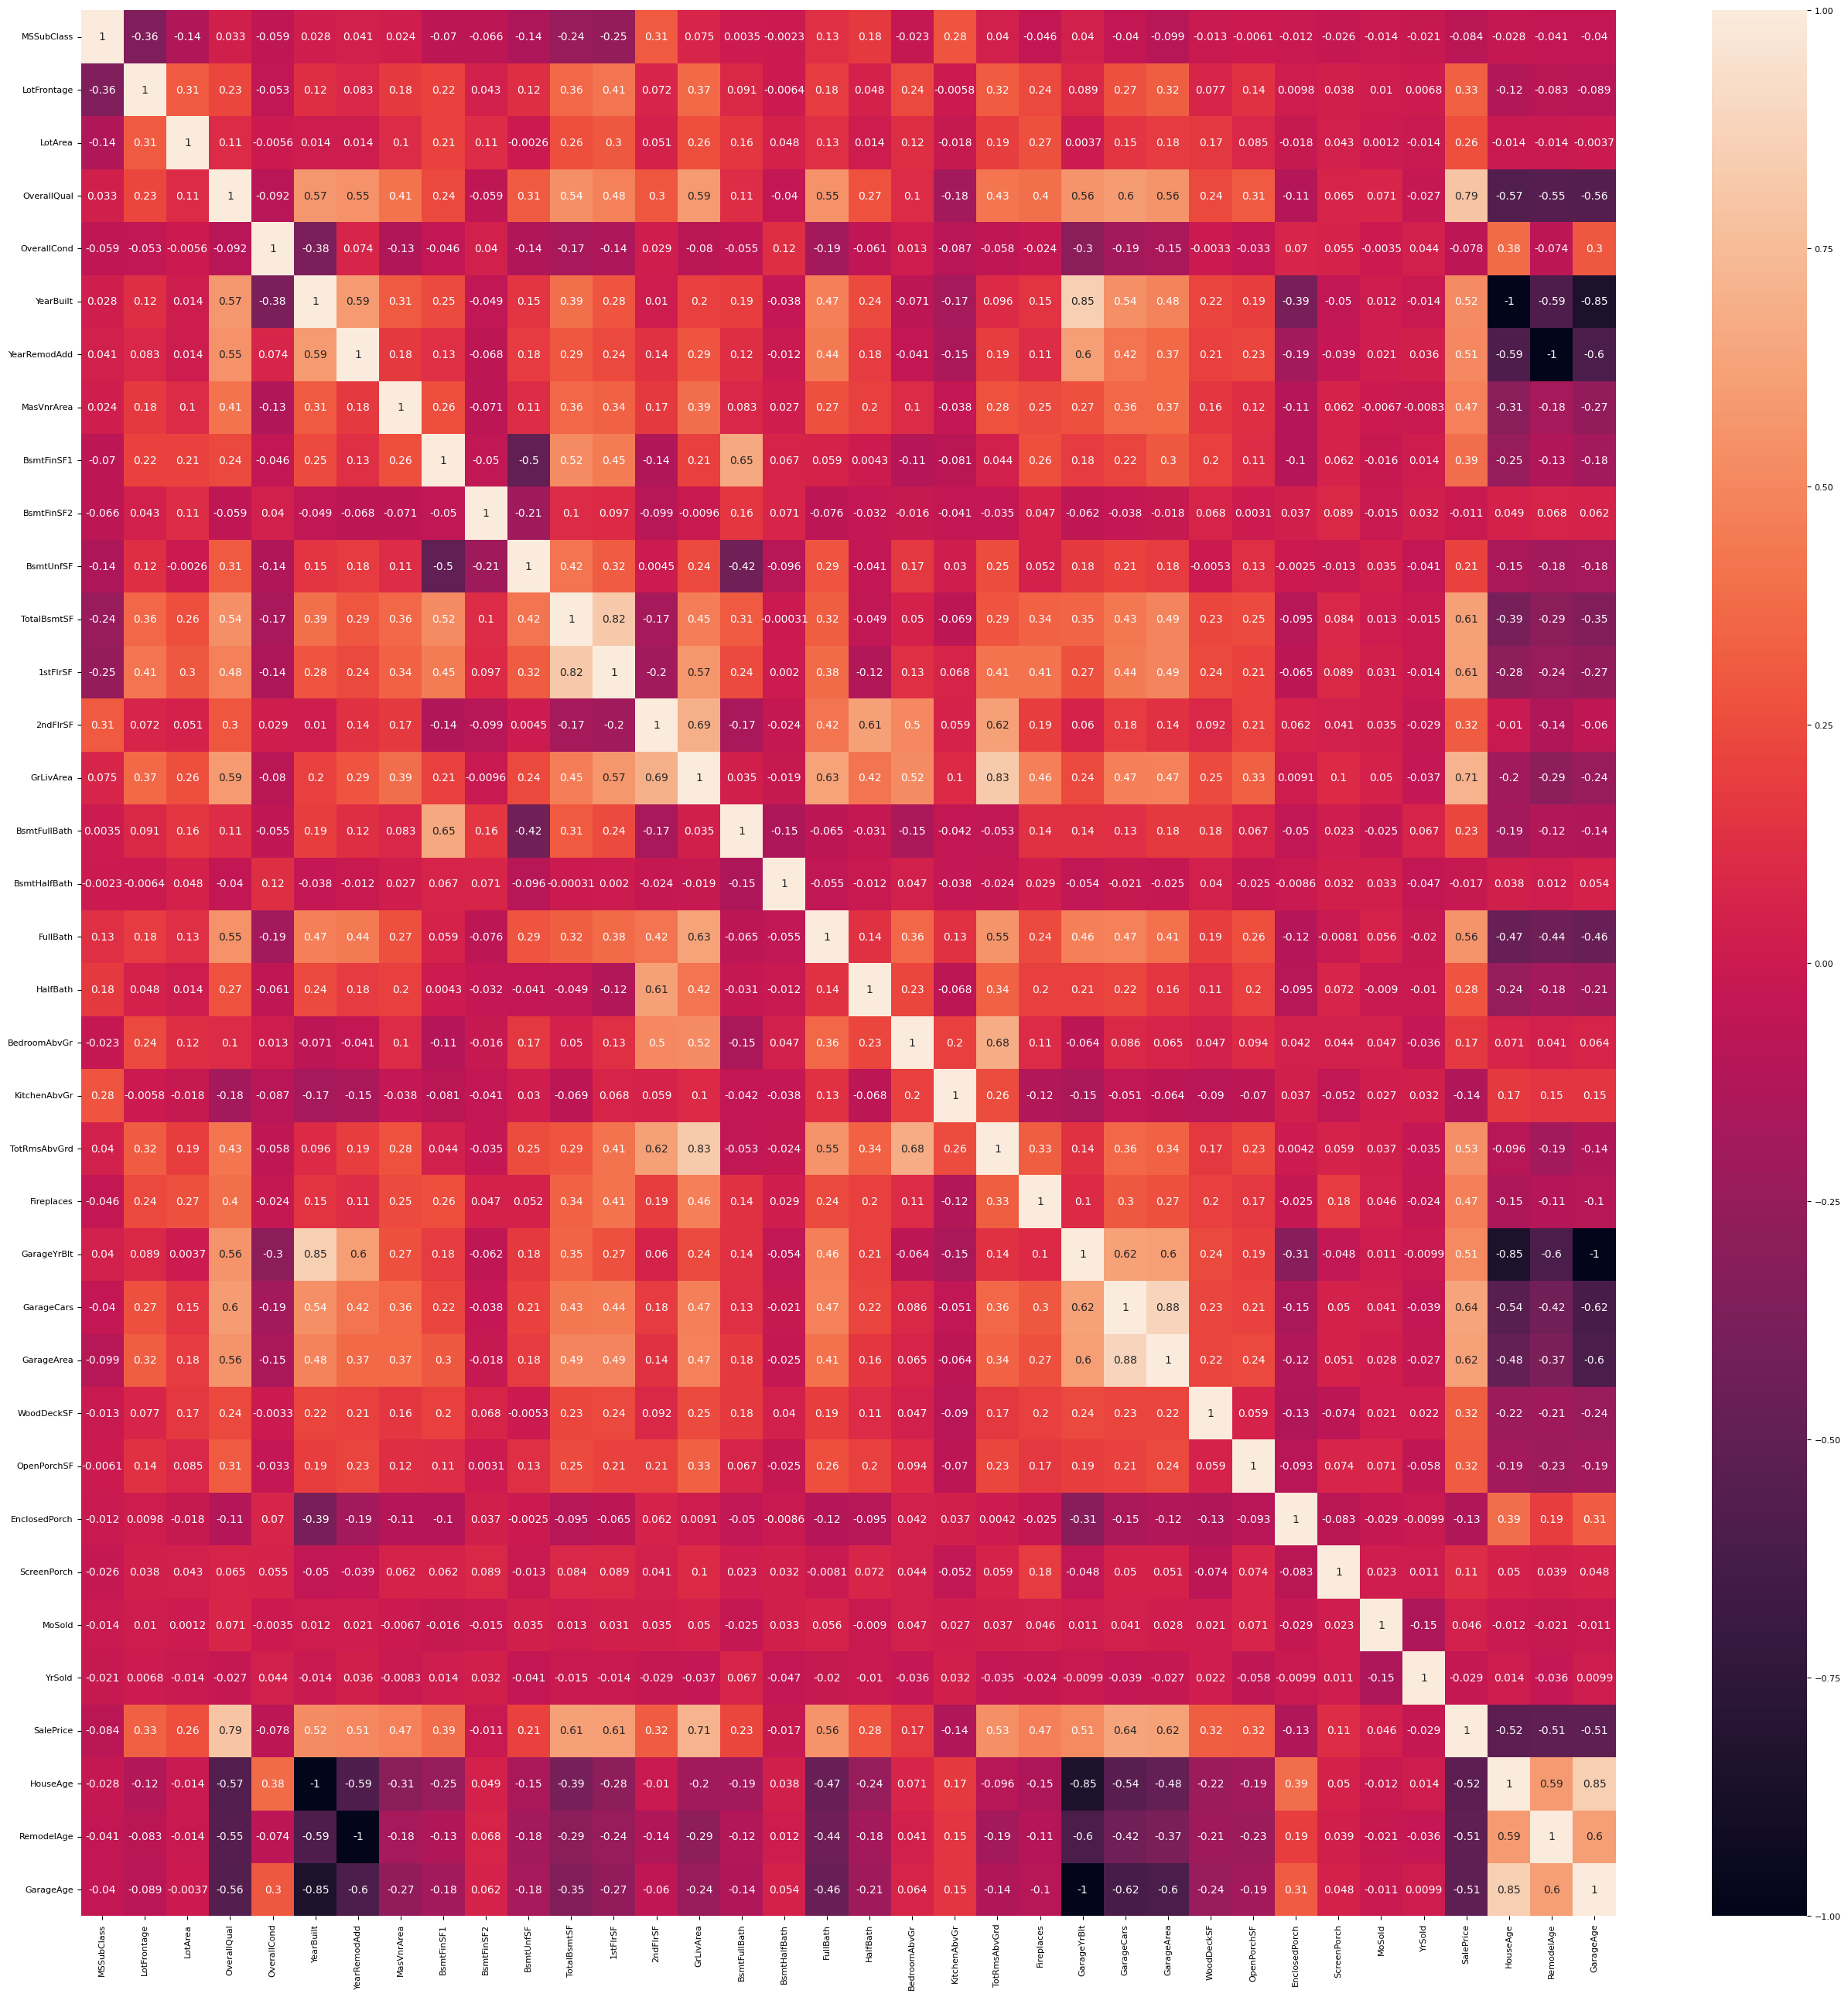

In [139]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [140]:
# highly correlated features
# GarageCars & GarageArea (0.88)
# HouseAge & GarageAge (0.85)
# TotalBsmtSF & 1stFlrSF (0.82)

# dropping GarageArea, GarageAge & TotalBsmtSF

df.drop(columns=['GarageArea', 'GarageAge', 'TotalBsmtSF'], inplace=True)

In [141]:
df_corr = df.corr()
df_corr

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass        1.00000     -0.35706 -0.13978      0.03263     -0.05932   
LotFrontage      -0.35706      1.00000  0.30679      0.23420     -0.05282   
LotArea          -0.13978      0.30679  1.00000      0.10581     -0.00564   
OverallQual       0.03263      0.23420  0.10581      1.00000     -0.09193   
OverallCond      -0.05932     -0.05282 -0.00564     -0.09193      1.00000   
YearBuilt         0.02785      0.11760  0.01423      0.57232     -0.37598   
YearRemodAdd      0.04058      0.08275  0.01379      0.55068      0.07374   
MasVnrArea        0.02357      0.17870  0.10332      0.40725     -0.12569   
BsmtFinSF1       -0.06984      0.21583  0.21410      0.23967     -0.04623   
BsmtFinSF2       -0.06565      0.04334  0.11117     -0.05912      0.04023   
BsmtUnfSF        -0.14076      0.12216 -0.00262      0.30816     -0.13684   
1stFlrSF         -0.25176      0.41427  0.29947      0.47622     -0.14420   
2ndFlrSF          0.30789      0.07248  0.05099      0.29549      0.02894   
GrLivArea         0.07485      0.36839  0.26312      0.59301     -0.07969   
BsmtFullBath      0.00349      0.09148  0.15815      0.11110     -0.05494   
BsmtHalfBath     -0.00233     -0.00642  0.04805     -0.04015      0.11782   
FullBath          0.13161      0.18042  0.12603      0.55060     -0.19415   
HalfBath          0.17735      0.04826  0.01426      0.27346     -0.06077   
BedroomAbvGr     -0.02344      0.23702  0.11969      0.10168      0.01298   
KitchenAbvGr      0.28172     -0.00580 -0.01778     -0.18388     -0.08700   
TotRmsAbvGrd      0.04038      0.32015  0.19001      0.42745     -0.05758   
Fireplaces       -0.04557      0.23575  0.27136      0.39677     -0.02382   
GarageYrBlt       0.03957      0.08875  0.00367      0.55502     -0.29689   
GarageCars       -0.04011      0.26973  0.15487      0.60067     -0.18576   
WoodDeckSF       -0.01258      0.07711  0.17170      0.23892     -0.00333   
OpenPorchSF      -0.00610      0.13745  0.08477      0.30882     -0.03259   
EnclosedPorch    -0.01204      0.00979 -0.01834     -0.11394      0.07036   
ScreenPorch      -0.02603      0.03768  0.04316      0.06489      0.05481   
MoSold           -0.01358      0.01016  0.00120      0.07082     -0.00351   
YrSold           -0.02141      0.00677 -0.01426     -0.02735      0.04395   
SalePrice        -0.08428      0.33490  0.26384      0.79098     -0.07786   
HouseAge         -0.02785     -0.11760 -0.01423     -0.57232      0.37598   
RemodelAge       -0.04058     -0.08275 -0.01379     -0.55068     -0.07374   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass       0.02785       0.04058     0.02357    -0.06984    -0.06565   
LotFrontage      0.11760       0.08275     0.17870     0.21583     0.04334   
LotArea          0.01423       0.01379     0.10332     0.21410     0.11117   
OverallQual      0.57232       0.55068     0.40725     0.23967    -0.05912   
OverallCond     -0.37598       0.07374    -0.12569    -0.04623     0.04023   
YearBuilt        1.00000       0.59285     0.31160     0.24950    -0.04911   
YearRemodAdd     0.59285       1.00000     0.17653     0.12845    -0.06776   
MasVnrArea       0.31160       0.17653     1.00000     0.26126    -0.07133   
BsmtFinSF1       0.24950       0.12845     0.26126     1.00000    -0.05012   
BsmtFinSF2      -0.04911      -0.06776    -0.07133    -0.05012     1.00000   
BsmtUnfSF        0.14904       0.18113     0.11386    -0.49525    -0.20929   
1stFlrSF         0.28199       0.24038     0.33985     0.44586     0.09712   
2ndFlrSF         0.01031       0.14002     0.17380    -0.13708    -0.09926   
GrLivArea        0.19901       0.28739     0.38805     0.20817    -0.00964   
BsmtFullBath     0.18760       0.11947     0.08301     0.64921     0.15868   
BsmtHalfBath    -0.03816      -0.01234     0.02740     0.06742     0.07095   
FullBath         0.46827       0.43905     0.27300     0.05854    -0.0

In [142]:
df_x = df_corr[abs(df_corr) > 0.5].loc['SalePrice', :]
col_corr = list(df_x.index[df_x.notnull()])
col_corr

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'SalePrice',
 'HouseAge',
 'RemodelAge']

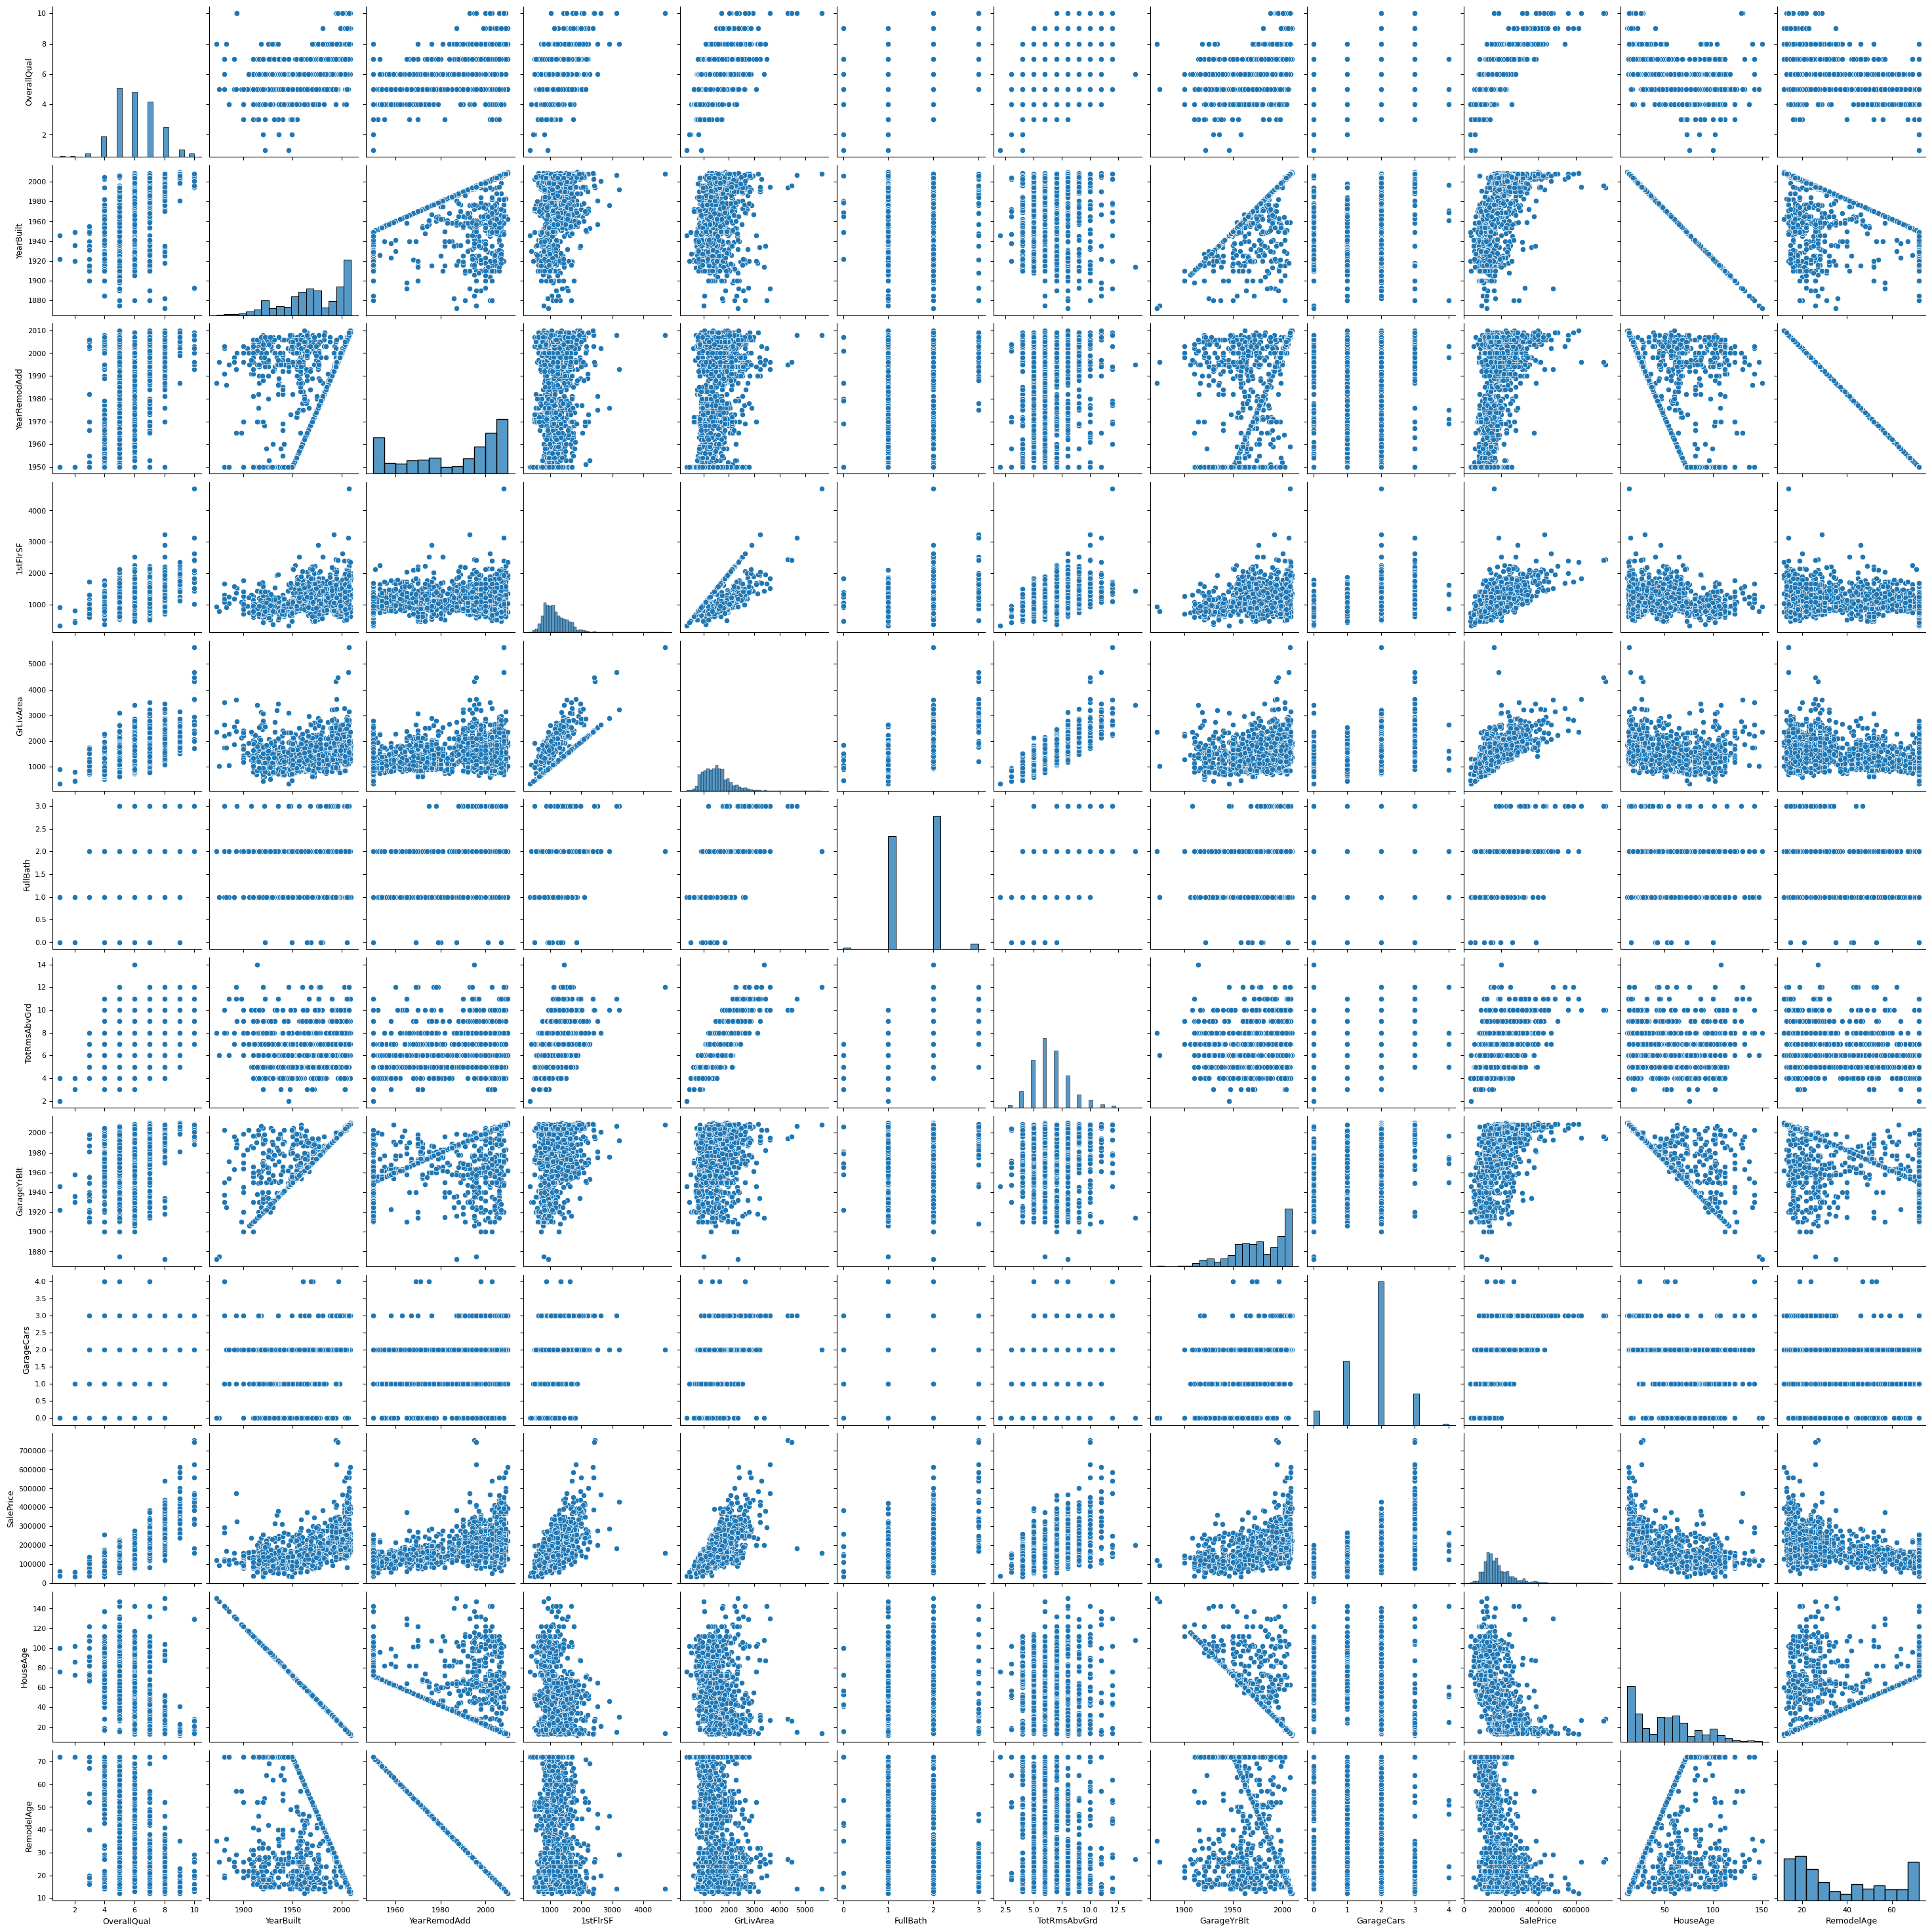

In [143]:
sns.pairplot(df[col_corr]);

In [144]:
df_x = df_corr[abs(df_corr) > 0.25].loc[: ,'SalePrice']
df_x.sort_values(ascending=False)
# col_corr = list(df_x.index[df_x.notnull()])
# col_corr

SalePrice        1.00000
OverallQual      0.79098
GrLivArea        0.70862
GarageCars       0.64041
1stFlrSF         0.60585
FullBath         0.56066
TotRmsAbvGrd     0.53372
YearBuilt        0.52290
GarageYrBlt      0.50804
YearRemodAdd     0.50710
MasVnrArea       0.47261
Fireplaces       0.46693
BsmtFinSF1       0.38642
LotFrontage      0.33490
WoodDeckSF       0.32441
2ndFlrSF         0.31933
OpenPorchSF      0.31586
HalfBath         0.28411
LotArea          0.26384
RemodelAge      -0.50710
HouseAge        -0.52290
MSSubClass           NaN
OverallCond          NaN
BsmtFinSF2           NaN
BsmtUnfSF            NaN
BsmtFullBath         NaN
BsmtHalfBath         NaN
BedroomAbvGr         NaN
KitchenAbvGr         NaN
EnclosedPorch        NaN
ScreenPorch          NaN
MoSold               NaN
YrSold               NaN
Name: SalePrice, dtype: float64

In [145]:
def plot_bi(x, y, z):
    order = list(df.groupby(by=x)[y].mean().sort_values().index)
    plt.figure(figsize=(12,4))
    sns.boxplot(x=x, y=y, hue=z, data=df, order=order);

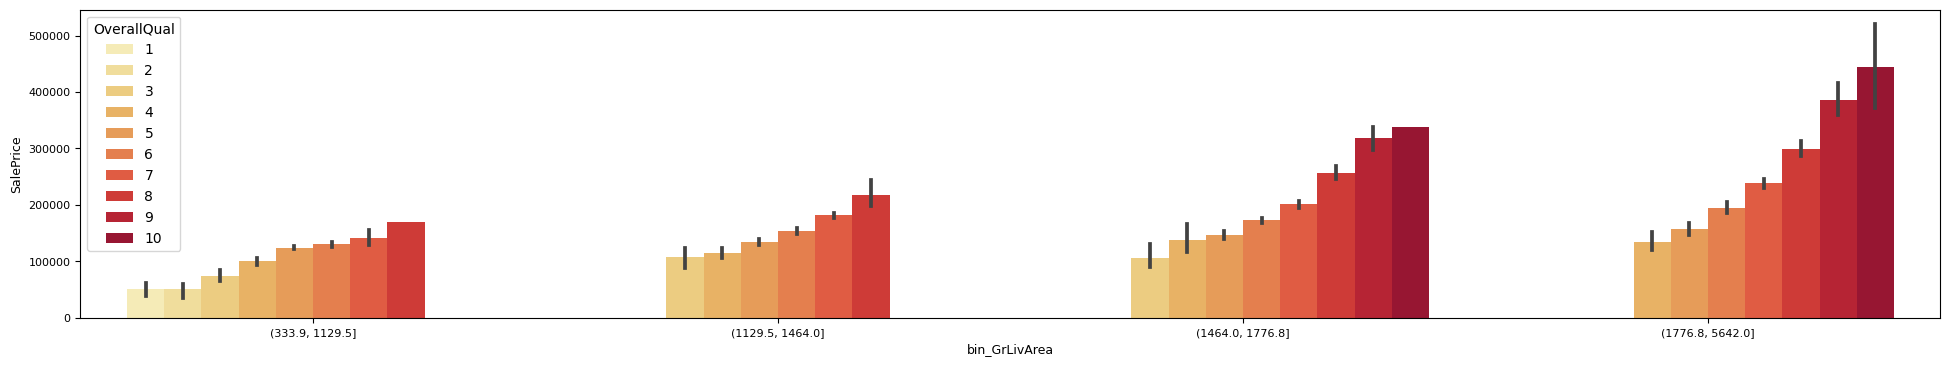

In [146]:
plt.figure(figsize=(24,4))
sns.barplot(x='bin_GrLivArea', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

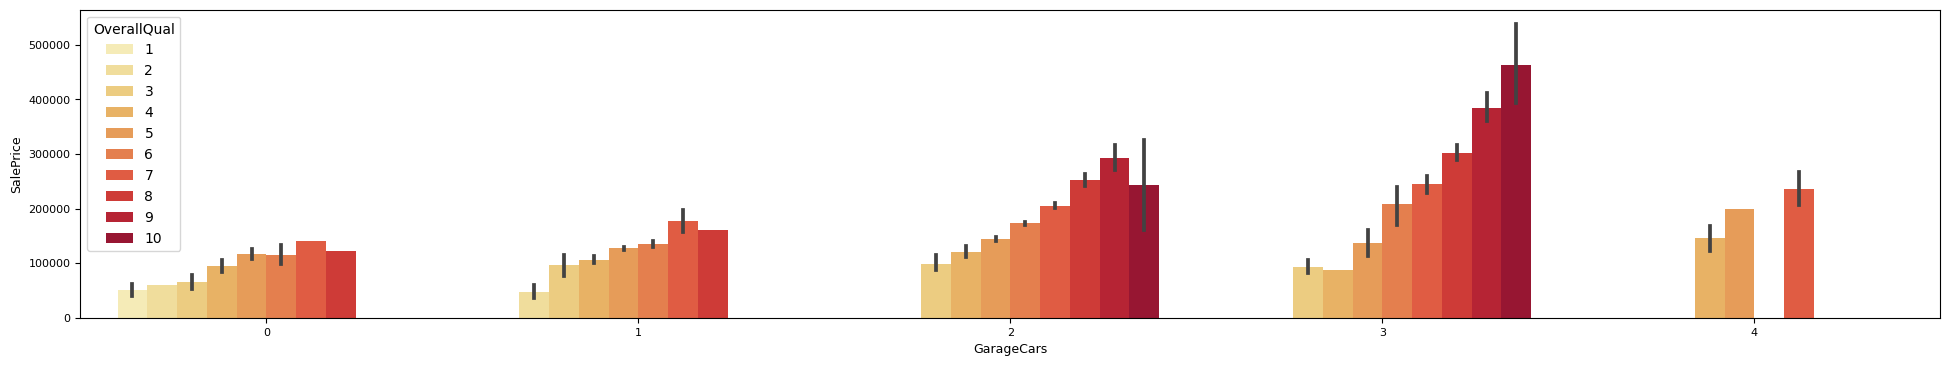

In [147]:
plt.figure(figsize=(24,4))
sns.barplot(x='GarageCars', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

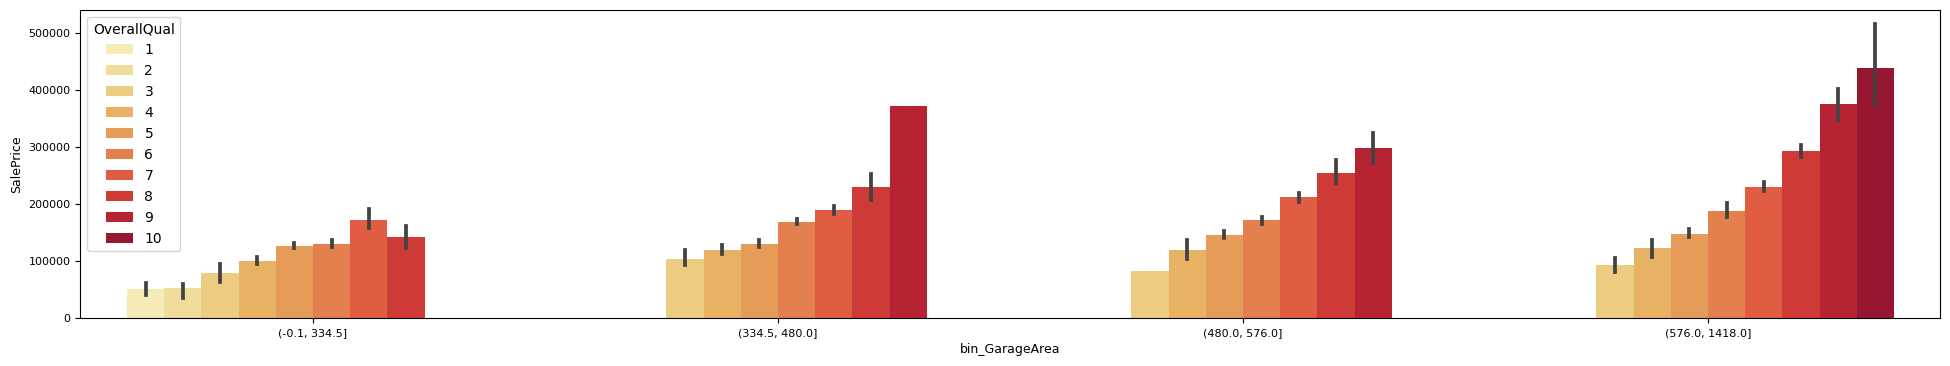

In [148]:
plt.figure(figsize=(24,4))
sns.barplot(x='bin_GarageArea', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

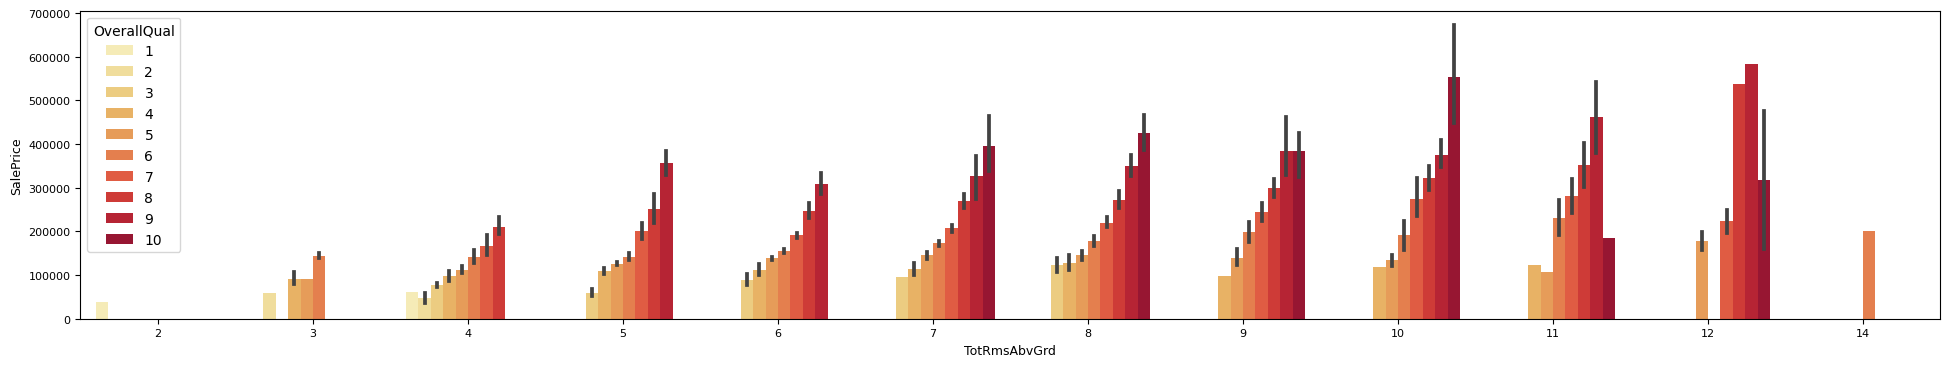

In [149]:
plt.figure(figsize=(24,4))
sns.barplot(x='TotRmsAbvGrd', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

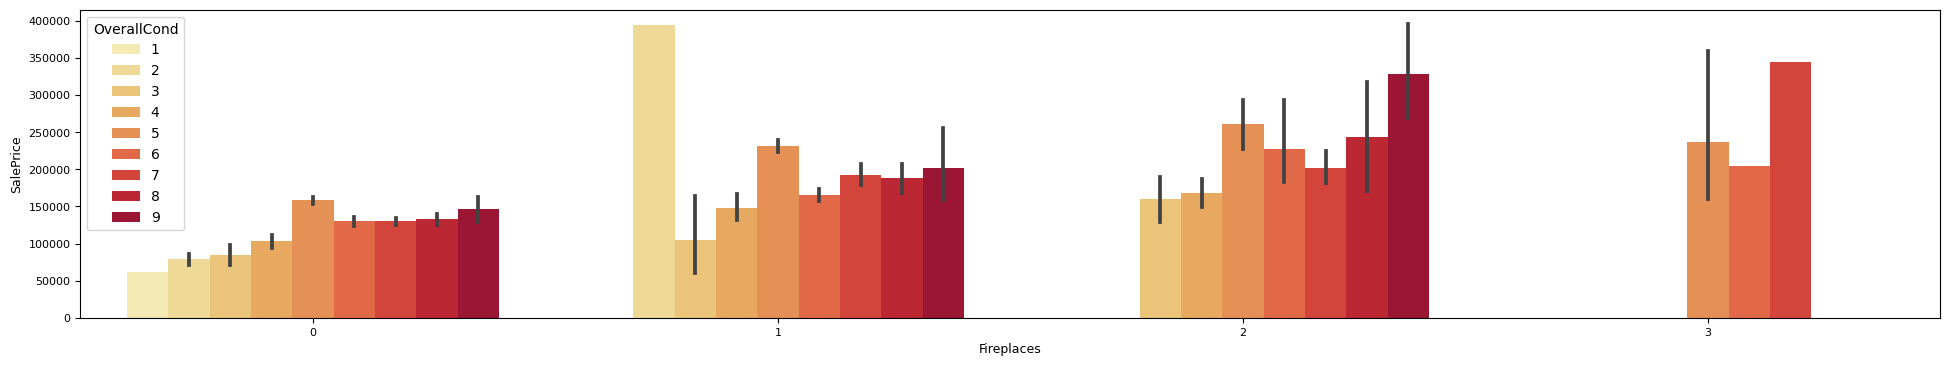

In [150]:
plt.figure(figsize=(24,4))
sns.barplot(x='Fireplaces', y='SalePrice', hue='OverallCond', data=df, palette='YlOrRd');

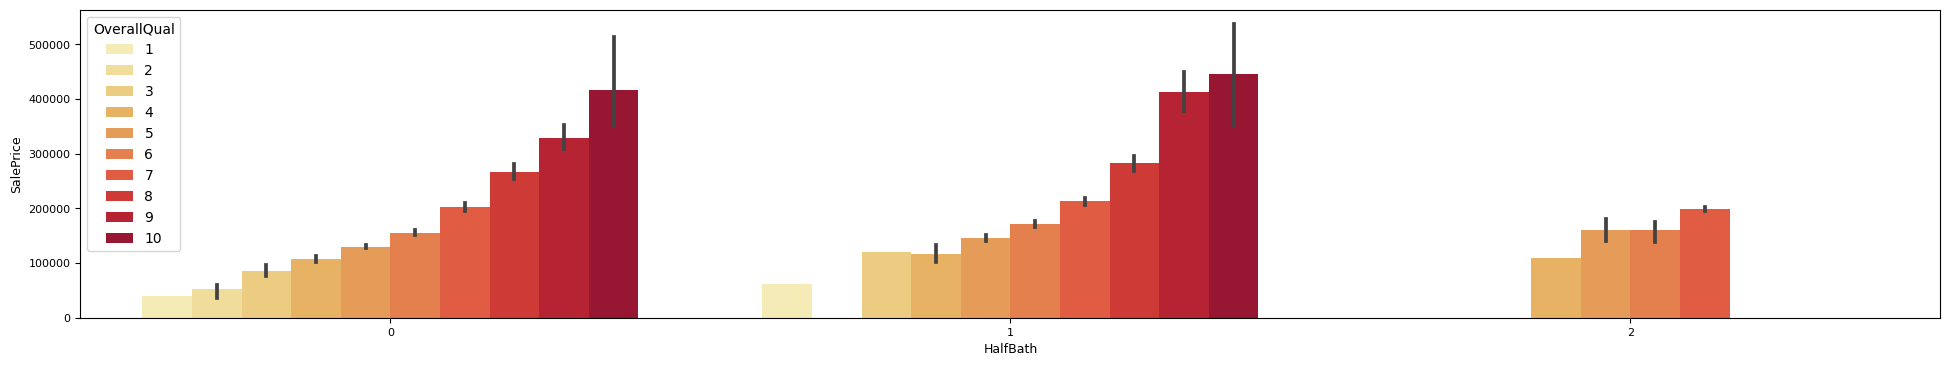

In [151]:
plt.figure(figsize=(24,4))
sns.barplot(x='HalfBath', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

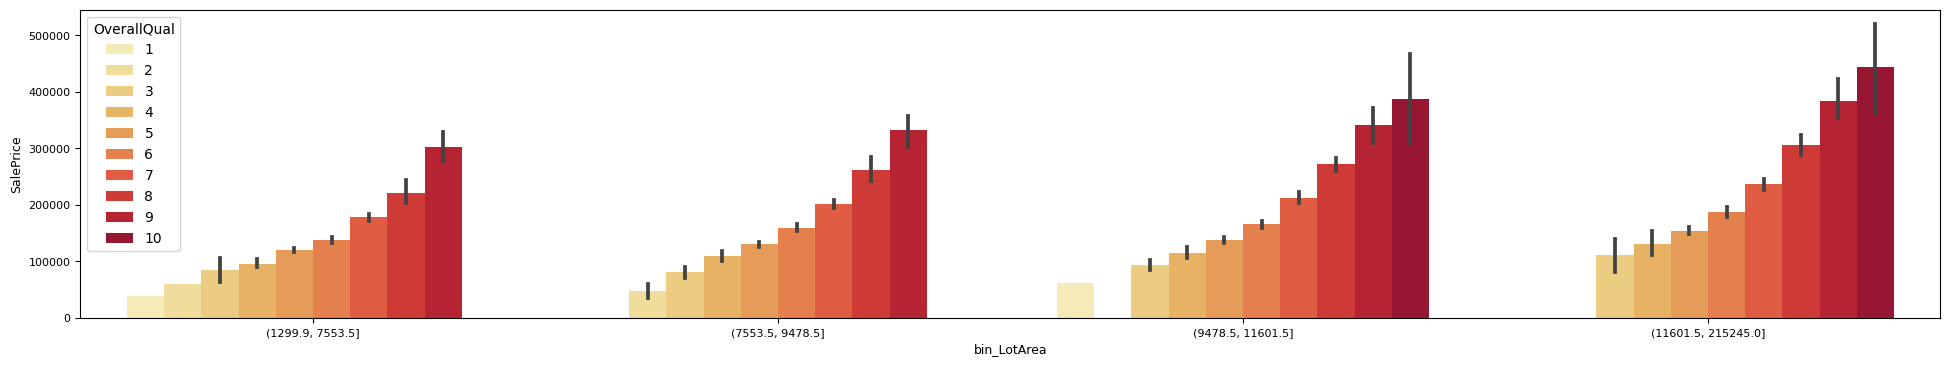

In [152]:
plt.figure(figsize=(24,4))
sns.barplot(x='bin_LotArea', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

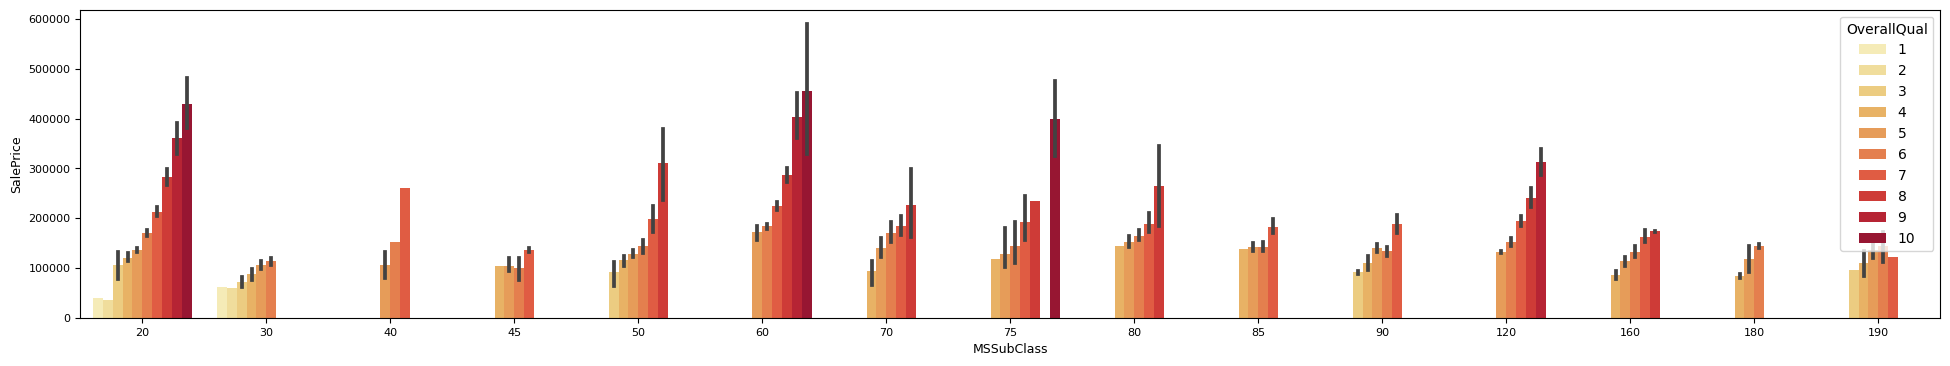

In [153]:
plt.figure(figsize=(24,4))
sns.barplot(x='MSSubClass', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

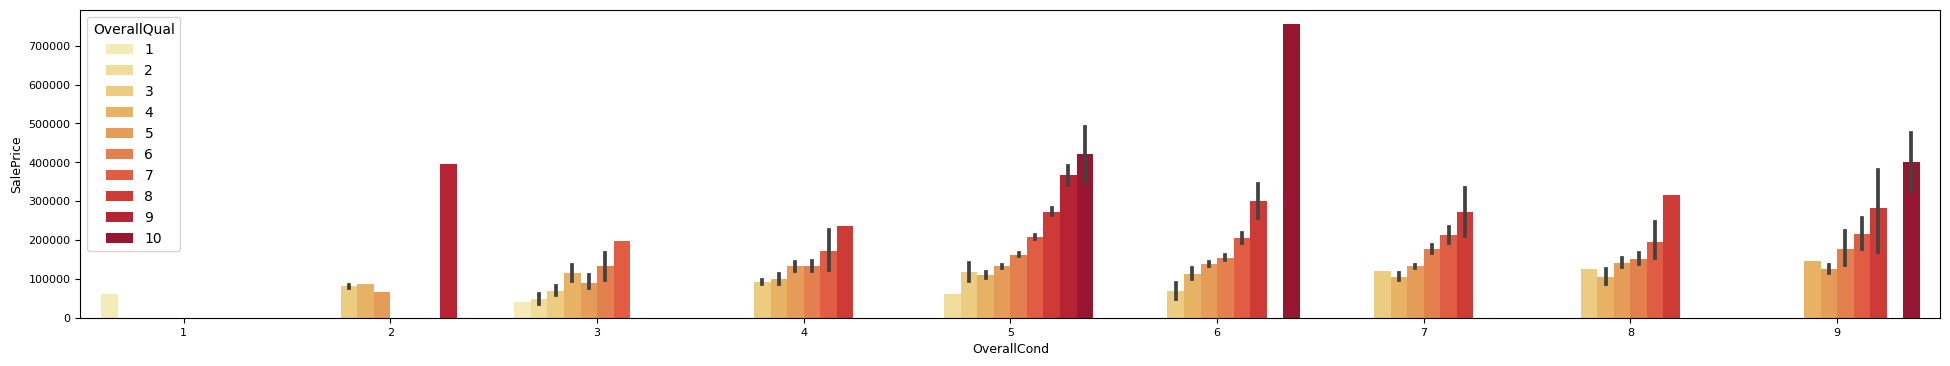

In [154]:
plt.figure(figsize=(24,4))
sns.barplot(x='OverallCond', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

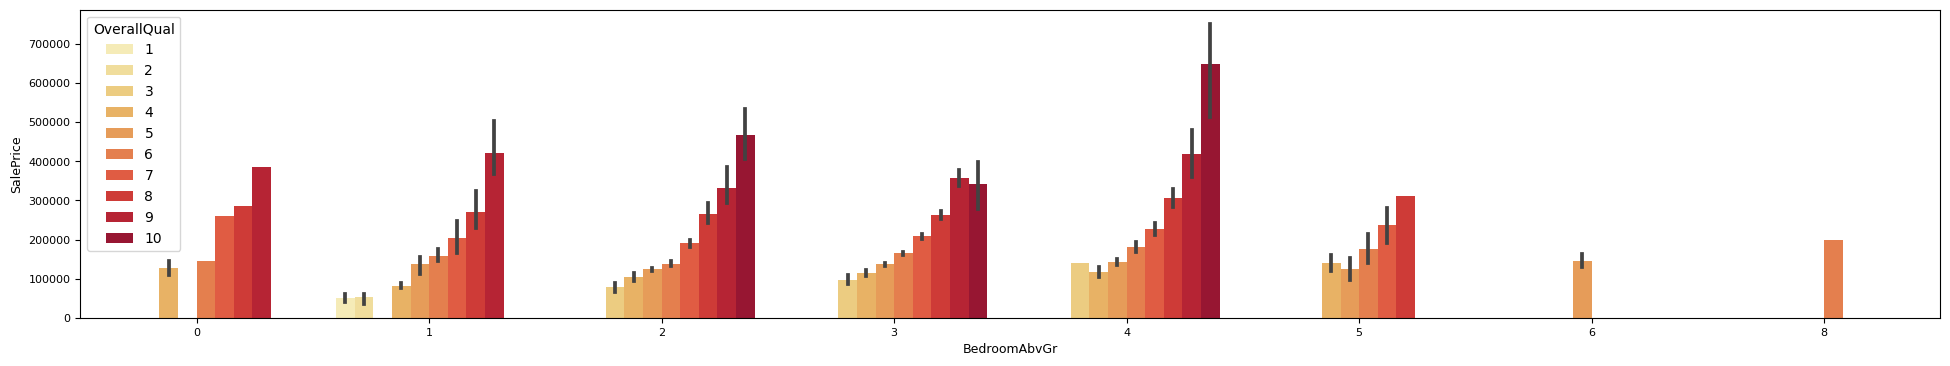

In [155]:
plt.figure(figsize=(24,4))
sns.barplot(x='BedroomAbvGr', y='SalePrice', hue='OverallQual', data=df, palette='YlOrRd');

#### Bivariate Analysis Observations:
- Most observations are same as found in segmented univariate analysis

In [156]:
# df = pd.read_csv('train_1.csv')
# df.drop(columns='Unnamed: 0', inplace=True)

## 5. Data Preparation

In [157]:
df_copy = df.copy()

In [158]:
df = df_copy.copy()

In [159]:
df.shape

(1460, 74)

### Drop Columns which are not relevant for Model Building

In [160]:
df.drop(columns=['bin_LotFrontage', 'bin_LotArea', 'bin_GrLivArea', 
                 'bin_GarageArea', 'bin_SalePrice', 
                 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'], inplace=True)
df.shape

(1460, 65)

In [161]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'HouseAge', 'RemodelAge'],
      dt

In [162]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape LandContour  \
0          60       RL     65.00000     8450  NoAlley      Reg         Lvl   
1          20       RL     80.00000     9600  NoAlley      Reg         Lvl   
2          60       RL     68.00000    11250  NoAlley      IR1         Lvl   
3          70       RL     60.00000     9550  NoAlley      IR1         Lvl   
4          60       RL     84.00000    14260  NoAlley      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  \
0            7            5     Gable     VinylSd     VinylSd    BrkFace   
1            6            8     Gable     MetalSd     MetalSd       None   
2            7            5     Gable     VinylSd     VinylSd    BrkFace   
3            7            5     Gable     Wd Sdng     Wd Shng       None   
4            8            5     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0   196.00000        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2   162.00000        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4   350.00000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating  \
0          GLQ         706          Unf           0        150    GasA   
1          ALQ         978          Unf           0        284    GasA   
2          GLQ         486          Unf           0        434    GasA   
3          ALQ         216          Unf           0        540    GasA   
4          GLQ         655          Unf           0        490    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0        Ex          Y      SBrkr       856       854       1710   
1        Ex          Y      SBrkr      1262         0       1262   
2        Ex          Y      SBrkr       920       866       1786   
3        Gd          Y      SBrkr       961       756       1717   
4        Ex          Y      SBrkr      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  \
0          Gd             8        Typ           0  NoFireplace     Attchd   
1          TA             6        Typ           1           TA     Attchd   
2          Gd             6        Typ           1           TA     Attchd   
3          Gd             7        Typ           1           Gd     Detchd   
4          Gd             9        Typ           1           TA     Attchd   

  GarageFinish  GarageCars GarageQual GarageCond PavedDrive  WoodDeckSF  \
0          RFn           2         TA         TA          Y           0   
1          RFn           2         TA         TA          Y         298   
2          RFn           2         TA         TA          Y           0   
3          Unf           3         TA         TA          Y           0   
4 

In [163]:
feat_num_ordinal = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                    'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

feat_cat_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 
                    'GarageQual', 'GarageCond']

feat_cat_nominal = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                    'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 
                    'MasVnrType',  'Foundation', 'BsmtFinType1', 'BsmtFinType2', 
                    'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 
                    'MoSold', 'SaleType', 'SaleCondition']

In [164]:
for col in df.columns:
    cnt = len(df[col].dropna().unique())
    if cnt == 1:
        print(col, ' : ', cnt)
        print()
    elif cnt == 2:
        l1 = np.sort(df[col].dropna().unique())
        print(col, ' : ', cnt, l1)
        # df[col] = df[col].map({l1[0] : 0, l1[1] : 1})
#         print()
    else:
        pass

CentralAir  :  2 ['N' 'Y']


In [165]:
(df.CentralAir=='N').sum(), (df.CentralAir=='Y').sum()

(95, 1365)

In [166]:
df.CentralAir = df.CentralAir.map({'N':0, 'Y':1})
df.CentralAir.sum()

1365

**IMPORTANT**
It is seen that some of the Catgorical Variables DO NOT have all the possible levels present in the column.
E.g., **Utilities** column (Type of utilities available) contains only 'AllPub' 'NoSeWa', 
but as per the data description, the can contain the following levels:
- AllPub	: All public Utilities (E,G,W,& S)	
- NoSewr	: Electricity, Gas, and Water (Septic Tank)
- NoSeWa	: Electricity and Gas Only
- ELO	: Electricity only	

Creating Dummies will only create dummy columns based on levels present in the columns. 

***Therefore, model will neither be able to learn the effect of the missing levels ('NoSewr', 'ELO'), 
nor predict the target if a new data point is presented with those level***

### Encoding Variables

#### Check Numeric Discrete Variables

In [167]:
for col in feat_num_ordinal:
    print(col, df[col].unique())

OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
BsmtFullBath [1 0 2 3]
BsmtHalfBath [0 1 2]
FullBath [2 1 3 0]
HalfBath [1 0 2]
BedroomAbvGr [3 4 1 2 0 5 6 8]
KitchenAbvGr [1 2 3 0]
TotRmsAbvGrd [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces [0 1 2 3]
GarageCars [2 3 1 0 4]


### Encode Ordinal Variables

In [168]:
for col in feat_cat_ordinal:
    print(col, df[col].unique())

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual ['Gd' 'TA' 'Ex' 'NoBsmt' 'Fa']
BsmtCond ['TA' 'Gd' 'NoBsmt' 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NoBsmt']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu ['NoFireplace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish ['RFn' 'Unf' 'Fin' 'NoGarage']
GarageQual ['TA' 'Fa' 'Gd' 'NoGarage' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'NoGarage' 'Gd' 'Po' 'Ex']


In [169]:
df.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [170]:
df.ExterQual = df.ExterQual.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1})
df.ExterQual.unique()

array([4, 3, 5, 2], dtype=int64)

In [171]:
df.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [172]:
df.ExterCond = df.ExterCond.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1})
df.ExterCond.unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [173]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'NoBsmt', 'Fa'], dtype=object)

In [174]:
df.BsmtQual = df.BsmtQual.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1, 'NoBsmt' : 0})
df.BsmtQual.unique()

array([4, 3, 5, 0, 2], dtype=int64)

In [175]:
df.BsmtCond.unique()

array(['TA', 'Gd', 'NoBsmt', 'Fa', 'Po'], dtype=object)

In [176]:
df.BsmtCond = df.BsmtCond.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1, 'NoBsmt' : 0})
df.BsmtCond.unique()

array([3, 4, 0, 2, 1], dtype=int64)

In [177]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'NoBsmt'], dtype=object)

In [178]:
df.BsmtExposure = df.BsmtExposure.map({'Gd' : 4,  'Av' : 3, 'Mn': 2, 'No' : 1, 'NoBsmt' : 0})
df.BsmtExposure.unique()

array([1, 4, 2, 3, 0], dtype=int64)

In [179]:
df.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [180]:
df.HeatingQC = df.HeatingQC.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1})
df.HeatingQC.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [181]:
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [182]:
df.KitchenQual = df.KitchenQual.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1})
df.KitchenQual.unique()

array([4, 3, 5, 2], dtype=int64)

In [183]:
df.FireplaceQu.unique()

array(['NoFireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [184]:
df.FireplaceQu = df.FireplaceQu.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1, 'NoFireplace' : 0})
df.FireplaceQu.unique()

array([0, 3, 4, 2, 5, 1], dtype=int64)

In [185]:
df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [186]:
df.GarageFinish = df.GarageFinish.map({'Fin' : 3, 'RFn': 2, 'Unf' : 1, 'NoGarage' : 0})
df.GarageFinish.unique()

array([2, 1, 3, 0], dtype=int64)

In [187]:
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'NoGarage', 'Ex', 'Po'], dtype=object)

In [188]:
df.GarageQual = df.GarageQual.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1, 'NoGarage' : 0})
df.GarageQual.unique()

array([3, 2, 4, 0, 5, 1], dtype=int64)

In [189]:
df.GarageCond.unique()

array(['TA', 'Fa', 'NoGarage', 'Gd', 'Po', 'Ex'], dtype=object)

In [190]:
df.GarageCond = df.GarageCond.map({'Ex' : 5, 'Gd' : 4,  'TA' : 3, 'Fa': 2, 'Po' : 1, 'NoGarage' : 0})
df.GarageCond.unique()

array([3, 2, 0, 4, 1, 5], dtype=int64)

###  Dummy Variables for Nominal variables

In [191]:
df_dummy = pd.get_dummies(df[feat_cat_nominal], drop_first=True, dtype='int')
df_dummy.shape

(1460, 153)

In [192]:
quasi_constant_dummies = []

# iterate over every feature
for col in df_dummy.columns:

    # find the predominant value, that is the value that is shared by most observations
    predominant = df_dummy[col].value_counts(normalize=True).sort_values(ascending=False).values[0]

    # evaluate the predominant feature: do more than 98% of the observations show 1 value?
    if predominant > 0.98:

        # if yes, add the variable to the list
        quasi_constant_dummies.append(col)

print(len(quasi_constant_dummies))
print((quasi_constant_dummies))

64
['MSZoning_RH', 'LotShape_IR3', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtFinType2_GLQ', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseF', 'Electri

In [193]:
df_dummy.drop(columns=quasi_constant_dummies, inplace=True)
df_dummy.shape

(1460, 89)

In [194]:
df = pd.concat([df, df_dummy], axis = 1)
df.drop(columns=feat_cat_nominal, inplace=True)
df.shape

(1460, 126)

In [195]:
df.head().T

0            1            2            3  \
LotFrontage               65.00000     80.00000     68.00000     60.00000   
LotArea                 8450.00000   9600.00000  11250.00000   9550.00000   
OverallQual                7.00000      6.00000      7.00000      7.00000   
OverallCond                5.00000      8.00000      5.00000      5.00000   
MasVnrArea               196.00000      0.00000    162.00000      0.00000   
ExterQual                  4.00000      3.00000      4.00000      3.00000   
ExterCond                  3.00000      3.00000      3.00000      3.00000   
BsmtQual                   4.00000      4.00000      4.00000      3.00000   
BsmtCond                   3.00000      3.00000      3.00000      4.00000   
BsmtExposure               1.00000      4.00000      2.00000      1.00000   
BsmtFinSF1               706.00000    978.00000    486.00000    216.00000   
BsmtFinSF2                 0.00000      0.00000      0.00000      0.00000   
BsmtUnfSF                150.00000    284.00000    434.00000    540.00000   
HeatingQC                  5.00000      5.00000      5.00000      4.00000   
CentralAir                 1.00000      1.00000      1.00000      1.00000   
1stFlrSF                 856.00000   1262.00000    920.00000    961.00000   
2ndFlrSF                 854.00000      0.00000    866.00000    756.00000   
GrLivArea               1710.00000   1262.00000   1786.00000   1717.00000   
BsmtFullBath               1.00000      0.00000      1.00000      1.00000   
BsmtHalfBath               0.00000      1.00000      0.00000      0.00000   
FullBath                   2.00000      2.00000      2.00000      1.00000   
HalfBath                   1.00000      0.00000      1.00000      0.00000   
BedroomAbvGr               3.00000      3.00000      3.00000      3.00000   
KitchenAbvGr               1.00000      1.00000      1.00000      1.00000   
KitchenQual                4.00000      3.00000      4.00000      4.00000   
TotRmsAbvGrd               8.00000      6.00000      6.00000      7.00000   
Fireplaces                 0.00000      1.00000      1.00000      1.00000   
FireplaceQu                0.00000      3.00000      3.00000      4.00000   
GarageFinish               2.00000      2.00000      2.00000      1.00000   
GarageCars                 2.00000      2.00000      2.00000      3.00000   
GarageQual                 3.00000      3.00000      3.00000      3.00000   
GarageCond                 3.00000      3.00000      3.00000      3.00000   
WoodDeckSF                 0.00000    298.00000      0.00000      0.00000   
OpenPorchSF               61.00000      0.00000     42.00000     35.00000   
EnclosedPorch              0.00000      0.00000      0.00000    272.00000   
ScreenPorch                0.00000      0.00000      0.00000      0.00000   
SalePrice             208500.00000 181500.00000 223500.00000 140000.00000   
HouseAge                  19.00000     46.00000     21.00000    107.00000   
RemodelAge                19.00000     46.00000     20.00000     52.00000   
MSZoning_FV                0.00000      0.00000      0.00000      0.00000   
MSZoning_RL                1.00000      1.00000      1.00000      1.00000   
MSZoning_RM                0.00000      0.00000      0.00000      0.00000   
Alley_NoAlley              1.00000      1.00000      1.00000      1.00000   
Alley_Pave                 0.00000      0.00000      0.00000      0.00000   
LotShape_IR2               0.00000      0.00000      0.00000      0.00000   
LotShape_Reg               1.00000      1.00000      0.00000      0.00000   
LandContour_HLS            0.00000      0.00000      0.00000      0.00000   
LandContour_Low            0.00000      0.00000      0.00000      0.00000   
LandContour_Lvl            1.00000      1.00000      1.00000      1.00000   
LotConfig_CulDSac          0.00000      0.00000      0.00000      0.00000   
LotConfig_FR2              0.00000      1.00000      0.00000      0.00000   
LotConfig_Inside           1.

In [196]:
df.isnull().sum()

LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Fireplaces               0
FireplaceQu              0
GarageFinish             0
GarageCars               0
GarageQual               0
GarageCond               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
ScreenPorch              0
SalePrice                0
H

In [197]:
# At this point, all numeric variables and no missing values

In [198]:
df.to_csv('train_2.csv')

## 6. Split Data into Train & Test Set

In [199]:
df = pd.read_csv('train_2.csv', index_col=0)

In [200]:
df.shape

(1460, 126)

In [201]:
df.shape

(1460, 126)

In [202]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0     65.00000     8450            7            5   196.00000          4   
1     80.00000     9600            6            8     0.00000          3   
2     68.00000    11250            7            5   162.00000          4   
3     60.00000     9550            7            5     0.00000          3   
4     84.00000    14260            8            5   350.00000          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0          3         4         3             1         706           0   
1          3         4         3             4         978           0   
2          3         4         3             2         486           0   
3          3         3         4             1         216           0   
4          3         4         3             3         655           0   

   BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0        150          5           1       856       854       1710   
1        284          5           1      1262         0       1262   
2        434          5           1       920       866       1786   
3        540          4           1       961       756       1717   
4        490          5           1      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0            4             8           0            0             2   
1            3             6           1            3             2   
2            4             6           1            3             2   
3            4             7           1            4             1   
4            4             9           1            3             2   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           2           3           3           0           61              0   
1           2           3           3         298            0              0   
2           2           3           3           0           42              0   
3           3           3           3           0           35            272   
4           3           3           3         192           84              0   

   ScreenPorch  SalePrice  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  \
0            0     208500        19          19            0            1   
1            0     181500        46          46            0            1   
2            0     223500        21          20            0            1   
3            0     140000       107          52            0            1   
4            0     250000        22          22            0            1   

   MSZoning_RM  Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  \
0            0              1           0             0             1   
1            0              1           0             0             1   
2            0              1           0             0             0   
3            0              1           0             0             0   
4            0              1           0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4 

In [203]:
y = df.pop('SalePrice')
X = df
X.shape, y.shape

((1460, 125), (1460,))

### Split Dataset

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 125), (292, 125), (1168,), (292,))

In [205]:
X_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
175      84.00000    12615            6            7     0.00000          3   
776      86.00000    11210            7            5   240.00000          4   
840      70.04996    12155            6            8     0.00000          3   
1162    109.00000     8724            5            5     0.00000          3   
1200     71.00000     9353            4            5     0.00000          3   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
175           3         3         4             3         477           0   
776           3         4         3             3          20           0   
840           3         3         3             1         156           0   
1162          3         4         3             1         492           0   
1200          3         3         3             1           0           0   

      BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
175         725          3           1      2158         0       2158   
776        1594          5           1      1614         0       1614   
840         516          3           0       810       672       1482   
1162        402          4           1       894         0        894   
1200        864          4           1       864         0        864   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
175              1             0         2         0             4   
776              0             0         2         0             3   
840              0             0         2         0             4   
1162             0             0         1         0             3   
1200             0             0         1         0             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
175              1            4             7           1            4   
776              1            4             7           0            0   
840              1            2             7           0            0   
1162             1            3             5           1            1   
1200             1            3             5           0            0   

      GarageFinish  GarageCars  GarageQual  GarageCond  WoodDeckSF  \
175              1           2           3           3           0   
776              2           3           3           3         144   
840              1           1           3           3           0   
1162             3           2           3           3           0   
1200             1           1           3           3           0   

      OpenPorchSF  EnclosedPorch  ScreenPorch  HouseAge  RemodelAge  \
175            29             39            0        72          21   
776            59              0            0        17          16   
840             0            254            0        97          72   
1162            0              0            0        54          54   
1200            0              0            0        52          52   

      MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_NoAlley  Alley_Pave  \
175             0            1            0              1           0   
776             0            1            0              1           0   
840             0            0            0              1           0   
1162            0            1            0              1           0   
1200            0            1            0              1           0   

      LotShape_IR2  LotShape_Reg  LandContour_HLS  LandContour_Low  \
175              0             1                0                0   
776              0             0                0                0   
840              0             0                0                0   
1162             0             1                0                0   
1200             0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConf

In [206]:
X_test.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
1054     90.00000    11367            8            5   210.00000          4   
361      70.04996     9144            5            5     0.00000          3   
1282     61.00000     8800            5            7     0.00000          3   
161     110.00000    13688            9            5   664.00000          4   
515      94.00000    12220           10            5   305.00000          5   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
1054          3         4         3             2         932           0   
361           3         3         3             1         399           0   
1282          3         4         3             2         532         144   
161           3         5         3             3        1016           0   
515           3         5         3             1        1436           0   

      BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
1054        133          5           1      1091       898       1989   
361         484          4           1       988       517       1505   
1282        364          3           1      1040         0       1040   
161         556          5           1      1572      1096       2668   
515         570          5           1      2020         0       2020   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1054             1             0         2         1             3   
361              1             0         1         0             3   
1282             0             0         2         0             3   
161              1             0         2         1             3   
515              1             0         2         1             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
1054             1            4             7           1            4   
361              1            3             8           0            0   
1282             1            4             5           0            0   
161              1            5            10           2            4   
515              1            5             9           1            4   

      GarageFinish  GarageCars  GarageQual  GarageCond  WoodDeckSF  \
1054             3           2           3           3         199   
361              1           1           3           3           0   
1282             1           2           3           3           0   
161              3           3           3           3         400   
515              3           3           3           3         156   

      OpenPorchSF  EnclosedPorch  ScreenPorch  HouseAge  RemodelAge  \
1054           60              0            0        20          20   
361             0              0            0        82          40   
1282            0              0          288        45          14   
161             0              0            0        19          18   
515            54              0            0        13          13   

      MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_NoAlley  Alley_Pave  \
1054            0            1            0              1           0   
361             0            1            0              0           1   
1282            0            1            0              1           0   
161             0            1            0              1           0   
515             0            1            0              1           0   

      LotShape_IR2  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1054             0             1                0                0   
361              0             1                0                0   
1282             0             0                0                0   
161              0             0                0                0   
515              0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConf

### Standardize (Scale) Data
#### Required for Regularization

In [207]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [208]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [209]:
X_train_scaled.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0      0.63978  0.19949     -0.07622      1.26912    -0.57276   -0.68258   
1      0.73256  0.06228      0.65353     -0.52222     0.75450    1.05058   
2     -0.00732  0.15457     -0.07622      2.16480    -0.57276   -0.68258   
3      1.79946 -0.18051     -0.80598     -0.52222    -0.57276   -0.68258   
4      0.03675 -0.11908     -1.53573     -0.52222    -0.57276   -0.68258   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0   -0.25126  -0.57411   1.96237       1.28526     0.06701    -0.30051   
1   -0.25126   0.59820   0.09740       1.28526    -0.97009    -0.30051   
2   -0.25126  -0.57411   0.09740      -0.59005    -0.66146    -0.30051   
3   -0.25126   0.59820   0.09740      -0.59005     0.10105    -0.30051   
4   -0.25126  -0.57411   0.09740      -0.59005    -1.01548    -0.30051   

   BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0    0.36408   -1.20534     0.25057   2.64301  -0.79079    1.23882   
1    2.33931    0.90220     0.25057   1.19703  -0.79079    0.19152   
2   -0.11098   -1.20534    -3.99093  -0.94006   0.74760   -0.06261   
3   -0.37010   -0.15157     0.25057  -0.71678  -0.79079   -1.19462   
4    0.68002   -0.15157     0.25057  -0.79652  -0.79079   -1.25237   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       1.09238      -0.24680   0.77606  -0.75590       1.37026      -0.20390   
1      -0.82338      -0.24680   0.77606  -0.75590       0.15318      -0.20390   
2      -0.82338      -0.24680   0.77606  -0.75590       1.37026      -0.20390   
3      -0.82338      -0.24680  -1.02959  -0.75590       0.15318      -0.20390   
4      -0.82338      -0.24680  -1.02959  -0.75590       0.15318      -0.20390   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0      0.72957       0.29821     0.58624      1.19364      -0.79687   
1      0.72957       0.29821    -0.96643     -1.02197       0.32586   
2     -2.29220       0.29821    -0.96643     -1.02197      -0.79687   
3     -0.78131      -0.93912     0.58624     -0.46807       1.44858   
4     -0.78131      -0.93912    -0.96643     -1.02197      -0.79687   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0     0.32015     0.25841     0.25758    -0.76070     -0.25232        0.26716   
1     1.65565     0.25841     0.25758     0.36955      0.21769       -0.36011   
2    -1.01534     0.25841     0.25758    -0.76070     -0.70667        3.72517   
3     0.32015     0.25841     0.25758    -0.76070     -0.70667       -0.36011   
4    -1.01534     0.25841     0.25758    -0.76070     -0.70667       -0.36011   

   ScreenPorch  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  MSZoning_RM  \
0     -0.27861   0.72553    -0.78639     -0.21802      0.50454     -0.40702   
1     -0.27861  -1.12937    -1.03186     -0.21802      0.50454     -0.40702   
2     -0.27861   1.56866     1.71741     -0.21802     -1.98199     -0.40702   
3     -0.27861   0.11847     0.83372     -0.21802      0.50454     -0.40702   
4     -0.27861   0.05102     0.73553     -0.21802      0.50454     -0.40702   

   Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
0        0.24863    -0.15956      -0.16236       0.76191         -0.18338   
1        0.24863    -0.15956      -0.16236      -1.31248         -0.18338   
2        0.24863    -0.15956      -0.16236      -1.31248         -0.18338   
3        0.24863    -0.15956      -0.16236       0.76191         -0.18338   
4        0.24863    -0.15956      -0.16236       0.76191         -0.18338   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0         -0.16784          0.33995           -0.27298       -0.17315   
1         -0.16784          0.33995           -0.27298       -0.17315   
2         -0.16784          0.33995           -0.27298       -0.17315   
3         -0.16784          0.33995           -0.

In [210]:
X_test_scaled.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0      0.91810  0.07761      1.38328     -0.52222     0.58859    1.05058   
1     -0.00732 -0.13949     -0.80598     -0.52222    -0.57276   -0.68258   
2     -0.42712 -0.17308     -0.80598      1.26912    -0.57276   -0.68258   
3      1.84585  0.30429      2.11304     -0.52222     3.09932    1.05058   
4      1.10365  0.16092      2.84279     -0.52222     1.11396    2.78374   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0   -0.25126   0.59820   0.09740       0.34761     1.09958    -0.30051   
1   -0.25126  -0.57411   0.09740      -0.59005    -0.11000    -0.30051   
2   -0.25126   0.59820   0.09740       0.34761     0.19183     0.54668   
3   -0.25126   1.77051   0.09740       1.28526     1.29021    -0.30051   
4   -0.25126   1.77051   0.09740      -0.59005     2.24334    -0.30051   

   BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0   -0.98154    0.90220     0.25057  -0.19314   1.26497    0.91346   
1   -0.18372   -0.15157     0.25057  -0.46692   0.39276   -0.01833   
2   -0.45648   -1.20534     0.25057  -0.32870  -0.79079   -0.91354   
3   -0.02006    0.90220     0.25057   1.08539   1.71825    2.22067   
4    0.01176    0.90220     0.25057   2.27620  -0.79079    0.97314   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       1.09238      -0.24680   0.77606   1.24159       0.15318      -0.20390   
1       1.09238      -0.24680  -1.02959  -0.75590       0.15318      -0.20390   
2      -0.82338      -0.24680   0.77606  -0.75590       0.15318      -0.20390   
3       1.09238      -0.24680   0.77606   1.24159       0.15318      -0.20390   
4       1.09238      -0.24680   0.77606   1.24159       0.15318      -0.20390   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0      0.72957       0.29821     0.58624      1.19364       1.44858   
1     -0.78131       0.91688    -0.96643     -1.02197      -0.79687   
2      0.72957      -0.93912    -0.96643     -1.02197      -0.79687   
3      2.24046       2.15421     2.13890      1.19364       1.44858   
4      2.24046       1.53554     0.58624      1.19364       1.44858   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0     0.32015     0.25841     0.25758     0.80125      0.23336       -0.36011   
1    -1.01534     0.25841     0.25758    -0.76070     -0.70667       -0.36011   
2     0.32015     0.25841     0.25758    -0.76070     -0.70667       -0.36011   
3     1.65565     0.25841     0.25758     2.37889     -0.70667       -0.36011   
4     1.65565     0.25841     0.25758     0.46374      0.13935       -0.36011   

   ScreenPorch  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  MSZoning_RM  \
0     -0.27861  -1.02819    -0.83548     -0.21802      0.50454     -0.40702   
1     -0.27861   1.06278     0.14640     -0.21802      0.50454     -0.40702   
2      4.94055  -0.18506    -1.13005     -0.21802      0.50454     -0.40702   
3     -0.27861  -1.06192    -0.93367     -0.21802      0.50454     -0.40702   
4     -0.27861  -1.26427    -1.17914     -0.21802      0.50454     -0.40702   

   Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
0        0.24863    -0.15956      -0.16236       0.76191         -0.18338   
1       -4.02200     6.26705      -0.16236       0.76191         -0.18338   
2        0.24863    -0.15956      -0.16236      -1.31248         -0.18338   
3        0.24863    -0.15956      -0.16236      -1.31248         -0.18338   
4        0.24863    -0.15956      -0.16236       0.76191         -0.18338   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0         -0.16784          0.33995           -0.27298       -0.17315   
1         -0.16784          0.33995           -0.27298       -0.17315   
2         -0.16784          0.33995           -0.27298       -0.17315   
3         -0.16784          0.33995           -0.

In [211]:
X_train_scaled.shape, X_test_scaled.shape

((1168, 125), (292, 125))

## 7. Linrear Regression

### Using RFE for Feature Selection

In [212]:
def run_rfe(n_feat):
    model_rfe = LinearRegression()
    model_rfe.fit(X_train_scaled, y_train)

    rfe = RFE(estimator=model_rfe, n_features_to_select=n_feat)             
    rfe = rfe.fit(X_train_scaled, y_train)
    
    col_rfe = X_train_scaled.columns[rfe.support_]
    X_train_scaled_rfe = X_train_scaled[col_rfe]
    
    model_rfe_1 = LinearRegression()
    model_rfe_1.fit(X_train_scaled_rfe, y_train)
    
    y_pred_train = model_rfe_1.predict(X_train_scaled_rfe)
    r_squared_train = r2_score(y_train, y_pred_train)
    print(r_squared_train)
    
    return model_rfe_1, X_train_scaled_rfe, col_rfe

In [213]:
for i in range(1,25):
    model_rfe, X_train_rfe, col_rfe = run_rfe(i)

0.6242702491957015
0.7096594491310868
0.7642360572315061
0.7842799451728117
0.809712192706399
0.8168403991602541
0.8185037335078781
0.8261909640009297
0.830555303670941
0.8351752728626325
0.8415213653658368
0.8468817069038106
0.8496093496724044
0.8522240294269112
0.8563459359751564
0.8571366079904839
0.8571706230426674
0.8600003600343384
0.8636962012838536
0.8672388450677699
0.8679586762986882
0.8694904754047035
0.8706736138019624
0.8707890440657106


In [214]:
model_rfe, X_train_rfe, col_rfe = run_rfe(40)

0.8863874397351507


### Model Performance

In [215]:
y_pred_train_rfe = model_rfe.predict(X_train_scaled[X_train_rfe.columns])
y_pred_test_rfe = model_rfe.predict(X_test_scaled[X_train_rfe.columns])

metric = []
r2_train_rfe = r2_score(y_train, y_pred_train_rfe)
print('R2 Train Set Linear Regression\t:\t', r2_train_rfe)
metric.append(r2_train_rfe)

r2_test_rfe = r2_score(y_test, y_pred_test_rfe)
print('R2 Test Set Linear Regression\t:\t', r2_test_rfe)
metric.append(r2_test_rfe)

rss1_rfe = np.sum(np.square(y_train - y_pred_train_rfe))
print('RSS Train Set Linear Regression\t:\t', rss1_rfe)
metric.append(rss1_rfe)

rss2_rfe = np.sum(np.square(y_test - y_pred_test_rfe))
print('RSS Test Set Linear Regression\t:\t', rss2_rfe)
metric.append(rss2_rfe)

mse_train_rfe = mean_squared_error(y_train, y_pred_train_rfe)
print('MSE Train Set Linear Regression\t:\t', mse_train_rfe)
metric.append(mse_train_rfe**0.5)

mse_test_rfe = mean_squared_error(y_test, y_pred_test_rfe)
print('MSE Test Set Linear Regression\t:\t', mse_test_rfe)
metric.append(mse_test_rfe**0.5)

R2 Train Set Linear Regression	:	 0.8863874397351507
R2 Test Set Linear Regression	:	 0.6743959866018729
RSS Train Set Linear Regression	:	 848515794761.3855
RSS Test Set Linear Regression	:	 565997105628.6101
MSE Train Set Linear Regression	:	 726469002.3641999
MSE Test Set Linear Regression	:	 1938346252.1527743


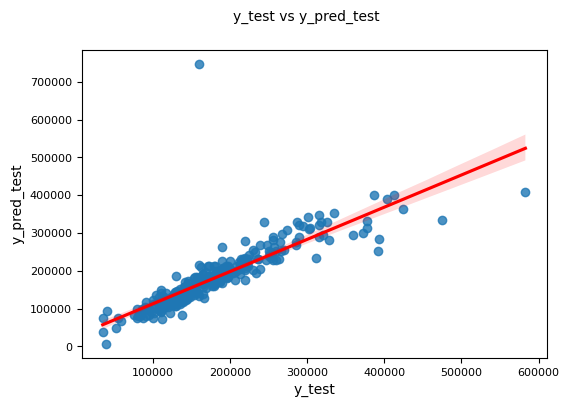

In [217]:
# Plotting y_test and y_pred_test to understand the fit of regression line on test data

fig = plt.figure(figsize=(6,4))
sns.regplot(y_test, y_pred_test_rfe, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred_test', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test', fontsize=10)
plt.show()

### Residual Analysis

In [218]:
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'HouseAge',
       'LotConfig_CulDSac', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Condition1_Norm', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtFinType1_NoBsmt', 'BsmtFinType2_NoBsmt',
       'Functional_Typ', 'GarageType_NoGarage', 'SaleType_New',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

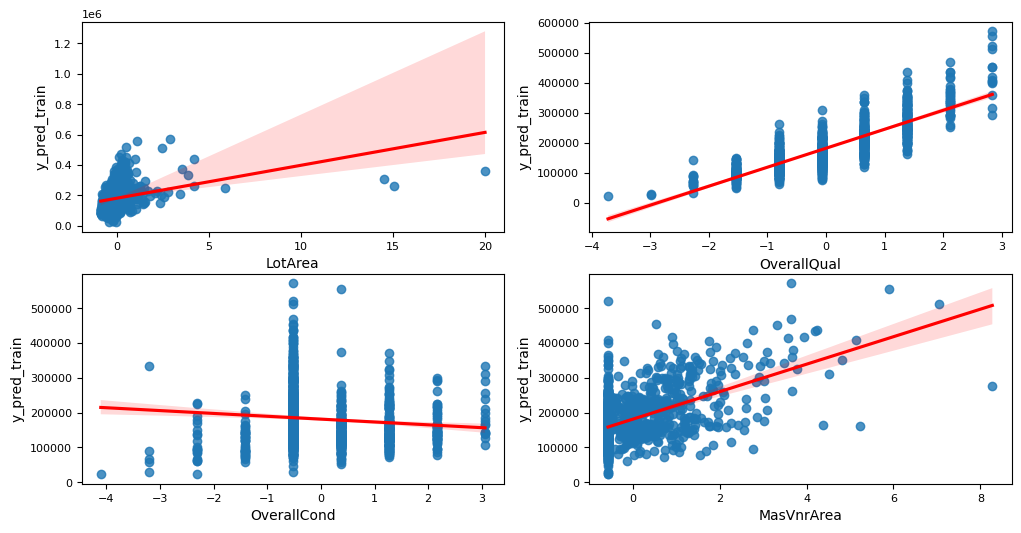

In [219]:
# Linear Relationship

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.regplot(X_train_rfe.loc[:,'LotArea'], y_pred_train_rfe, line_kws={"color": "red"})
plt.xlabel('LotArea', fontsize=10)
plt.ylabel('y_pred_train', fontsize=10)

plt.subplot(2,2,2)
sns.regplot(X_train_rfe.loc[:,'OverallQual'], y_pred_train_rfe, line_kws={"color": "red"})
plt.xlabel('OverallQual', fontsize=10)
plt.ylabel('y_pred_train', fontsize=10)

plt.subplot(2,2,3)
sns.regplot(X_train_rfe.loc[:,'OverallCond'], y_pred_train_rfe, line_kws={"color": "red"})
plt.xlabel('OverallCond', fontsize=10)
plt.ylabel('y_pred_train', fontsize=10)

plt.subplot(2,2,4)
sns.regplot(X_train_rfe.loc[:,'MasVnrArea'], y_pred_train_rfe, line_kws={"color": "red"})
plt.xlabel('MasVnrArea', fontsize=10)
plt.ylabel('y_pred_train', fontsize=10)


plt.show()

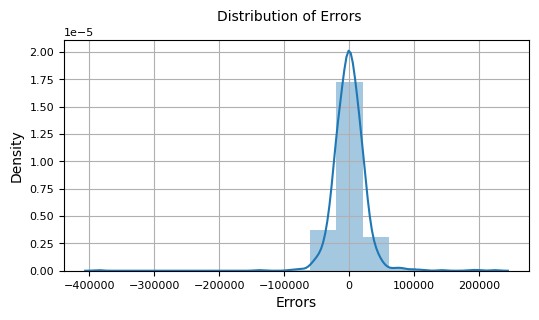

In [220]:
# Normal Distribution of Error Terms

fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_pred_train_rfe), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

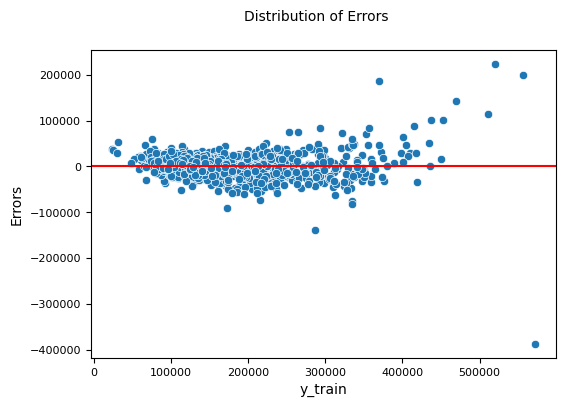

In [221]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_train_rfe, (y_train - y_pred_train_rfe))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_train', fontsize = 10)
plt.show()

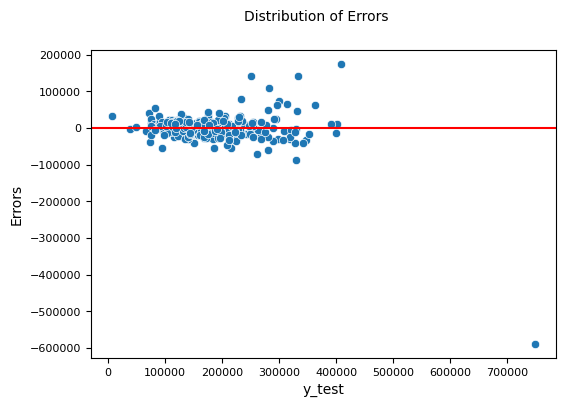

In [222]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_test_rfe, (y_test - y_pred_test_rfe))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_test', fontsize = 10)
plt.show()

### We can see a distinct pattern of the residuals, clearly implying that the assumptions of linear regression has failed. The relationship between the predictors and the response is NON-LINEAR.

### ---- Therefore, Data Transformation is required. ----

#### Check the Skewness of the Response Variable and Transform using log, squre root etc. 

## 8. Split Data into Train & Test Set (fro Data Transformation & Regularization)

In [223]:
df = pd.read_csv('train_2.csv', index_col=0)

In [224]:
df.shape

(1460, 126)

In [225]:
df.shape

(1460, 126)

In [226]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0     65.00000     8450            7            5   196.00000          4   
1     80.00000     9600            6            8     0.00000          3   
2     68.00000    11250            7            5   162.00000          4   
3     60.00000     9550            7            5     0.00000          3   
4     84.00000    14260            8            5   350.00000          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0          3         4         3             1         706           0   
1          3         4         3             4         978           0   
2          3         4         3             2         486           0   
3          3         3         4             1         216           0   
4          3         4         3             3         655           0   

   BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0        150          5           1       856       854       1710   
1        284          5           1      1262         0       1262   
2        434          5           1       920       866       1786   
3        540          4           1       961       756       1717   
4        490          5           1      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0            4             8           0            0             2   
1            3             6           1            3             2   
2            4             6           1            3             2   
3            4             7           1            4             1   
4            4             9           1            3             2   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           2           3           3           0           61              0   
1           2           3           3         298            0              0   
2           2           3           3           0           42              0   
3           3           3           3           0           35            272   
4           3           3           3         192           84              0   

   ScreenPorch  SalePrice  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  \
0            0     208500        19          19            0            1   
1            0     181500        46          46            0            1   
2            0     223500        21          20            0            1   
3            0     140000       107          52            0            1   
4            0     250000        22          22            0            1   

   MSZoning_RM  Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  \
0            0              1           0             0             1   
1            0              1           0             0             1   
2            0              1           0             0             0   
3            0              1           0             0             0   
4            0              1           0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4 

### Check Skewness of Target Variable & Transform

In [227]:
df.SalePrice.skew()

1.8828757597682129

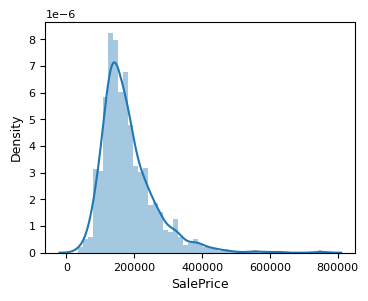

In [228]:
plt.figure(figsize=(4,3))
sns.distplot(df.SalePrice);

In [229]:
np.log(df.SalePrice).skew()

0.12133506220520406

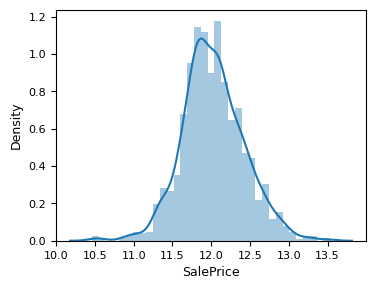

In [230]:
plt.figure(figsize=(4,3))
sns.distplot(np.log(df.SalePrice));

In [231]:
np.sqrt(df.SalePrice).skew()

0.9431527373310963

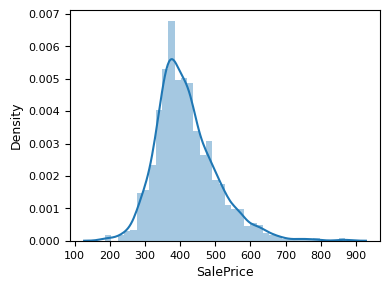

In [232]:
plt.figure(figsize=(4,3))
sns.distplot(np.sqrt(df.SalePrice));

In [233]:
from scipy import stats
y_boxcox = stats.boxcox(df.SalePrice)[0]
pd.Series(y_boxcox).skew()

-0.008652893640830073

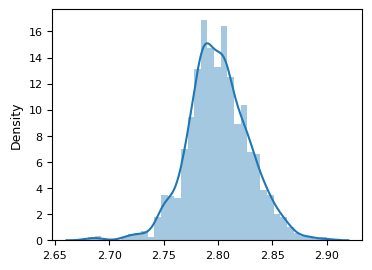

In [234]:
plt.figure(figsize=(4,3))
sns.distplot(np.sqrt(y_boxcox));

In [235]:
y = df.pop('SalePrice')
X = df

X.shape, y.shape

((1460, 125), (1460,))

In [236]:
y = np.log(y)

### Split Dataset

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 125), (438, 125), (1022,), (438,))

In [238]:
X_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
210      67.00000     5604            5            6     0.00000          3   
318      90.00000     9900            7            5   256.00000          4   
239      52.00000     8741            6            4     0.00000          3   
986      59.00000     5310            6            8     0.00000          3   
1416     60.00000    11340            4            6     0.00000          3   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
210           3         3         3             1         468           0   
318           3         4         3             4         987           0   
239           3         3         2             1          94           0   
986           4         3         2             1           0           0   
1416          3         3         3             1           0           0   

      BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
210         396          3           0       864         0        864   
318         360          5           1      1372      1274       2646   
239         641          3           1       798       689       1487   
986         485          4           1      1001       634       1635   
1416        777          4           1      1246      1044       2290   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
210              1             0         1         0             2   
318              1             0         2         1             4   
239              0             0         1         1             3   
986              0             0         1         0             2   
1416             0             0         2         0             4   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
210              1            3             5           0            0   
318              1            4             9           1            3   
239              1            3             7           1            4   
986              1            4             5           0            0   
1416             2            3            11           0            0   

      GarageFinish  GarageCars  GarageQual  GarageCond  WoodDeckSF  \
210              0           0           0           0           0   
318              2           3           3           3         340   
239              1           1           3           3           0   
986              1           1           2           3         394   
1416             1           2           3           3           0   

      OpenPorchSF  EnclosedPorch  ScreenPorch  HouseAge  RemodelAge  \
210             0             96            0        97          72   
318            60            144            0        29          29   
239           140              0            0        77          72   
986             0              0            0       112          19   
1416            0            114            0       137          72   

      MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_NoAlley  Alley_Pave  \
210             0            1            0              1           0   
318             0            1            0              1           0   
239             0            1            0              1           0   
986             0            0            1              1           0   
1416            0            0            1              1           0   

      LotShape_IR2  LotShape_Reg  LandContour_HLS  LandContour_Low  \
210              0             1                0                0   
318              0             1                0                1   
239              0             1                0                0   
986              0             1                0                0   
1416             0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConf

In [239]:
X_test.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
1436     60.00000     9000            4            6     0.00000          3   
57       89.00000    11645            7            5     0.00000          4   
780      63.00000     7875            7            5    38.00000          3   
382      79.00000     9245            7            5     0.00000          4   
1170     76.00000     9880            6            6     0.00000          3   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
1436          3         3         3             1         616           0   
57            3         4         3             1           0           0   
780           3         4         4             1           0           0   
382           3         4         3             3           0           0   
1170          3         3         3             3         522           0   

      BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
1436        248          3           1       864         0        864   
57          860          5           1       860       860       1720   
780        1237          4           1      1253         0       1253   
382         939          5           1       939       858       1797   
1170        574          3           1      1118         0       1118   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1436             0             0         1         0             3   
57               0             0         2         1             3   
780              0             0         2         0             3   
382              0             0         2         1             3   
1170             1             0         1         0             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
1436             1            3             5           0            0   
57               1            4             7           0            0   
780              1            3             6           1            3   
382              1            4             8           0            0   
1170             1            3             6           1            1   

      GarageFinish  GarageCars  GarageQual  GarageCond  WoodDeckSF  \
1436             1           2           3           3           0   
57               2           2           3           3           0   
780              3           2           3           3         220   
382              2           2           3           3         144   
1170             3           1           3           3         203   

      OpenPorchSF  EnclosedPorch  ScreenPorch  HouseAge  RemodelAge  \
1436            0              0            0        51          51   
57             70              0            0        18          18   
780            21              0            0        27          26   
382            53              0            0        16          16   
1170            0              0            0        45          45   

      MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_NoAlley  Alley_Pave  \
1436            0            1            0              1           0   
57              0            1            0              1           0   
780             0            1            0              1           0   
382             0            1            0              1           0   
1170            0            1            0              1           0   

      LotShape_IR2  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1436             0             1                0                0   
57               0             0                0                0   
780              0             1                0                0   
382              0             0                0                0   
1170             0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConf

### Standardize (Scale) Data - MUST for Regularization

In [240]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [241]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [242]:
X_train_scaled.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0     -0.12454 -0.47394     -0.78072      0.38381    -0.55767   -0.69925   
1      0.91769 -0.05682      0.64920     -0.53267     0.80996    1.05231   
2     -0.80426 -0.16935     -0.06576     -1.44915    -0.55767   -0.69925   
3     -0.48706 -0.50249     -0.06576      2.21677    -0.55767   -0.69925   
4     -0.44174  0.08300     -1.49568      0.38381    -0.55767   -0.69925   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0   -0.26068  -0.53297   0.12388      -0.60668     0.04264    -0.29316   
1   -0.26068   0.57865   0.12388       2.14491     1.15959    -0.29316   
2   -0.26068  -0.53297  -1.61042      -0.60668    -0.76224    -0.29316   
3    2.60400  -0.53297  -1.61042      -0.60668    -0.96454    -0.29316   
4   -0.26068  -0.53297   0.12388      -0.60668    -0.96454    -0.29316   

   BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0   -0.37379   -1.18006    -3.57922  -0.76533  -0.78860   -1.22904   
1   -0.45409    0.87274     0.27939   0.51226   2.13875    2.12233   
2    0.17268   -1.18006     0.27939  -0.93132   0.79456   -0.05738   
3   -0.17528   -0.15366     0.27939  -0.42078   0.66818    0.22096   
4    0.47603   -0.15366     0.27939   0.19538   1.61026    1.45280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       1.06575      -0.24766  -1.02705  -0.75274      -1.04338      -0.23403   
1       1.06575      -0.24766   0.78581   1.24544       1.39675      -0.23403   
2      -0.83844      -0.24766  -1.02705   1.24544       0.17668      -0.23403   
3      -0.83844      -0.24766  -1.02705  -0.75274      -1.04338      -0.23403   
4      -0.83844      -0.24766   0.78581  -0.75274       1.39675       4.11474   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0     -0.77545      -0.93662    -0.92631     -0.98440      -1.90219   
1      0.74277       1.55616     0.62310      0.65949       0.32211   
2     -0.77545       0.30977     0.62310      1.20745      -0.79004   
3      0.74277      -0.93662    -0.92631     -0.98440      -0.79004   
4     -0.77545       2.80255    -0.92631     -0.98440      -0.79004   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0    -2.36815    -3.86919    -3.86213    -0.74403     -0.71038        1.15108   
1     1.64553     0.27001     0.27240     1.98929      0.19669        1.91121   
2    -1.03026     0.27001     0.27240    -0.74403      1.40612       -0.36919   
3    -1.03026    -1.10973     0.27240     2.42340     -0.71038       -0.36919   
4     0.30764     0.27001     0.27240    -0.74403     -0.71038        1.43613   

   ScreenPorch  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  MSZoning_RM  \
0     -0.27498   1.52595     1.69547     -0.21461      0.52223     -0.42121   
1     -0.27498  -0.71635    -0.39051     -0.21461      0.52223     -0.42121   
2     -0.27498   0.86645     1.69547     -0.21461      0.52223     -0.42121   
3     -0.27498   2.02058    -0.87562     -0.21461     -1.91485      2.37410   
4     -0.27498   2.84495     1.69547     -0.21461     -1.91485      2.37410   

   Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
0        0.25847    -0.15173      -0.17687       0.75971         -0.18831   
1        0.25847    -0.15173      -0.17687       0.75971         -0.18831   
2        0.25847    -0.15173      -0.17687       0.75971         -0.18831   
3        0.25847    -0.15173      -0.17687       0.75971         -0.18831   
4        0.25847    -0.15173      -0.17687       0.75971         -0.18831   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0         -0.17089          0.34196           -0.26275       -0.17687   
1          5.85161         -2.92428           -0.26275       -0.17687   
2         -0.17089          0.34196           -0.26275       -0.17687   
3         -0.17089          0.34196           -0.

In [243]:
X_test_scaled.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0     -0.44174 -0.14421     -1.49568      0.38381    -0.55767   -0.69925   
1      0.87238  0.11261      0.64920     -0.53267    -0.55767    1.05231   
2     -0.30580 -0.25344      0.64920     -0.53267    -0.35466   -0.69925   
3      0.41923 -0.12042      0.64920     -0.53267    -0.55767    1.05231   
4      0.28329 -0.05876     -0.06576      0.38381    -0.55767   -0.69925   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0   -0.26068  -0.53297   0.12388      -0.60668     0.36116    -0.29316   
1   -0.26068   0.57865   0.12388      -0.60668    -0.96454    -0.29316   
2   -0.26068   0.57865   1.85817      -0.60668    -0.96454    -0.29316   
3   -0.26068   0.57865   0.12388       1.22771    -0.96454    -0.29316   
4   -0.26068  -0.53297   0.12388       1.22771     0.15886    -0.29316   

   BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0   -0.70390   -1.18006     0.27939  -0.76533  -0.78860   -1.22904   
1    0.66116    0.87274     0.27939  -0.77539   1.18748    0.38082   
2    1.50206   -0.15366     0.27939   0.21298  -0.78860   -0.49746   
3    0.83737    0.87274     0.27939  -0.57671   1.18288    0.52563   
4    0.02324   -1.18006     0.27939  -0.12654  -0.78860   -0.75135   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      -0.83844      -0.24766  -1.02705  -0.75274       0.17668      -0.23403   
1      -0.83844      -0.24766   0.78581   1.24544       0.17668      -0.23403   
2      -0.83844      -0.24766   0.78581  -0.75274       0.17668      -0.23403   
3      -0.83844      -0.24766   0.78581   1.24544       0.17668      -0.23403   
4       1.06575      -0.24766  -1.02705  -0.75274       0.17668      -0.23403   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0     -0.77545      -0.93662    -0.92631     -0.98440      -0.79004   
1      0.74277       0.30977    -0.92631     -0.98440       0.32211   
2     -0.77545      -0.31343     0.62310      0.65949       1.43426   
3      0.74277       0.93296    -0.92631     -0.98440       0.32211   
4     -0.77545      -0.31343     0.62310     -0.43644       1.43426   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0     0.30764     0.27001     0.27240    -0.74403     -0.71038       -0.36919   
1     0.30764     0.27001     0.27240    -0.74403      0.34787       -0.36919   
2     0.30764     0.27001     0.27240     1.02459     -0.39290       -0.36919   
3     0.30764     0.27001     0.27240     0.41361      0.09087       -0.36919   
4    -1.03026     0.27001     0.27240     0.88792     -0.71038       -0.36919   

   ScreenPorch  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  MSZoning_RM  \
0     -0.27498   0.00910     0.67673     -0.21461      0.52223     -0.42121   
1     -0.27498  -1.07908    -0.92413     -0.21461      0.52223     -0.42121   
2     -0.27498  -0.78230    -0.53604     -0.21461      0.52223     -0.42121   
3     -0.27498  -1.14503    -1.02115     -0.21461      0.52223     -0.42121   
4     -0.27498  -0.18875     0.38567     -0.21461      0.52223     -0.42121   

   Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
0        0.25847    -0.15173      -0.17687       0.75971         -0.18831   
1        0.25847    -0.15173      -0.17687      -1.31629         -0.18831   
2        0.25847    -0.15173      -0.17687       0.75971         -0.18831   
3        0.25847    -0.15173      -0.17687      -1.31629         -0.18831   
4        0.25847    -0.15173      -0.17687       0.75971         -0.18831   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0         -0.17089          0.34196           -0.26275        5.65400   
1         -0.17089          0.34196           -0.26275       -0.17687   
2         -0.17089          0.34196           -0.26275       -0.17687   
3         -0.17089          0.34196           -0.

In [244]:
X_train_scaled.shape, X_test_scaled.shape

((1022, 125), (438, 125))

## 9. Advanced Regression

###  Feature Selection using  RFE

In [245]:
def run_rfe(n_feat):
    model_rfe = LinearRegression()
    model_rfe.fit(X_train_scaled, y_train)

    rfe = RFE(estimator=model_rfe, n_features_to_select=n_feat)             
    rfe = rfe.fit(X_train_scaled, y_train)
    
    col_rfe = X_train_scaled.columns[rfe.support_]
    X_train_scaled_rfe = X_train_scaled[col_rfe]
    
    model_rfe_1 = LinearRegression()
    model_rfe_1.fit(X_train_scaled_rfe, y_train)
    
    y_pred_train = model_rfe_1.predict(X_train_scaled_rfe)
    r_squared_train = r2_score(y_train, y_pred_train)
    print(r_squared_train)
    
    return model_rfe_1, X_train_scaled_rfe, col_rfe

In [246]:
for i in range(1,25):
    model_lr, X_train_lr, col_rfe = run_rfe(i)

0.6580646944566306
0.7287211397479939
0.7771482574407044
0.793916379732696
0.813301361158127
0.8309240657809951
0.8423390703335937
0.8499881774262761
0.8543713590687926
0.8585187181846891
0.8629431829471474
0.8668767558826374
0.8697223839464269
0.8724589977944812
0.8726801691400942
0.8730687043606687
0.8761653891958812
0.8782837403500621
0.8790201589000788
0.8806723570425107
0.8818834985266971
0.8839072891746795
0.8851305521618874
0.8863597627738043


In [247]:
model_lr, X_train_lr, col_rfe = run_rfe(45)

0.901897352163786


In [248]:
X_test_lr = X_test_scaled[X_train_lr.columns]
y_pred_train_lr = model_lr.predict(X_train_lr)
y_pred_test_lr = model_lr.predict(X_test_lr)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print('R2 Train Set Linear Regression (with Transformation)\t:\t', r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lr)
print('R2 Test Set Linear Regression (with Transformation)\t:\t', r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lr))
print('RSS Train Set Linear Regression (with Transformation)\t:\t', rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lr))
print('RSS Test Set Linear Regression (with Transformation)\t:\t', rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print('MSE Train Set Linear Regression (with Transformation)\t:\t', mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print('MSE Test Set Linear Regression (with Transformation)\t:\t', mse_test_lr)
metric1.append(mse_test_lr**0.5)

R2 Train Set Linear Regression (with Transformation)	:	 0.901897352163786
R2 Test Set Linear Regression (with Transformation)	:	 0.882782867246654
RSS Train Set Linear Regression (with Transformation)	:	 15.767597781024424
RSS Test Set Linear Regression (with Transformation)	:	 8.44767125885387
MSE Train Set Linear Regression (with Transformation)	:	 0.015428177867929965
MSE Test Set Linear Regression (with Transformation)	:	 0.01928692068231477


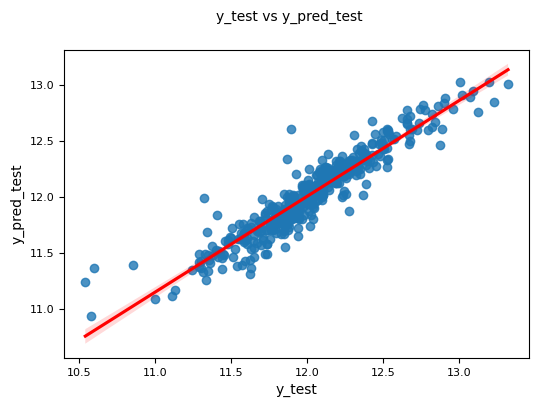

In [249]:
# Plotting y_test and y_pred_test to understand the fit of regression line on test data

fig = plt.figure(figsize=(6,4))
sns.regplot(y_test, y_pred_test_lr, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred_test', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test', fontsize=10)
plt.show()

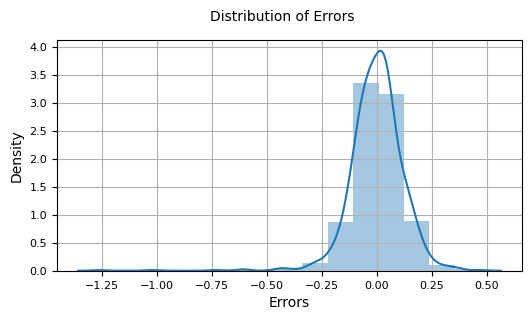

In [250]:
# Normal Distribution of Error Terms

fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_pred_train_lr), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

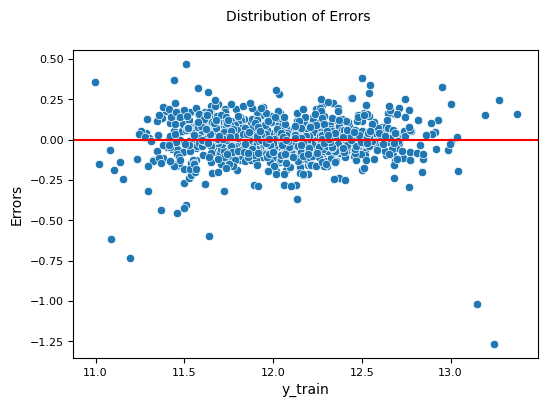

In [251]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_train_lr, (y_train - y_pred_train_lr))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_train', fontsize = 10)
plt.show()

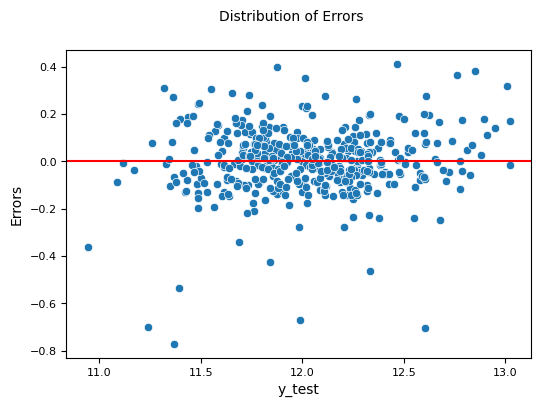

In [252]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_test_lr, (y_test - y_pred_test_lr))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_test', fontsize = 10)
plt.show()

#### Accuracy (both Training and Test) is better with Data Transformation


### Ridge Regularization

In [253]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled[X_train_lr.columns], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [254]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [255]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled[X_train_lr.columns], y_train)
print(ridge.coef_)

[-0.01894454  0.01474489  0.08063212  0.05066322  0.02190246  0.02108558
  0.01425227  0.11469376  0.02926968  0.02018264  0.01654487 -0.01738198
  0.01711706  0.02526363  0.02557711  0.04456291  0.03699486 -0.01444811
 -0.04811951  0.0187124   0.01615454  0.02126427  0.02348067  0.0251169
 -0.02176989 -0.01731988  0.01837921  0.03113571  0.03206112  0.0228047
 -0.03351046 -0.02119775  0.01648482 -0.01651851 -0.01955503 -0.01777928
  0.01564442  0.01557106  0.02839129 -0.01751076  0.01804732  0.02522801
  0.0090688   0.01865621  0.0090688 ]


In [256]:
y_pred_train_ridge = ridge.predict(X_train_scaled[X_train_lr.columns])
y_pred_test_ridge = ridge.predict(X_test_scaled[X_train_lr.columns])

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print('R2 Train Set Ridge Regularization\t:\t', r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print('R2 Test Set Ridge Regularization\t:\t', r2_test_ridge)
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print('RSS Train Set Ridge Regularization\t:\t', rss1_ridge)
metric2.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print('RSS Test Set Ridge Regularization\t:\t', rss2_ridge)
metric2.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print('MSE Train Set Ridge Regularization\t:\t', mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print('MSE Test Set Ridge Regularization\t:\t', mse_test_ridge)
metric2.append(mse_test_ridge**0.5)

R2 Train Set Ridge Regularization	:	 0.9018934541579513
R2 Test Set Ridge Regularization	:	 0.8829782275693301
RSS Train Set Ridge Regularization	:	 15.768224289987286
RSS Test Set Ridge Regularization	:	 8.433591919560836
MSE Train Set Ridge Regularization	:	 0.015428790890398518
MSE Test Set Ridge Regularization	:	 0.019254776072056702


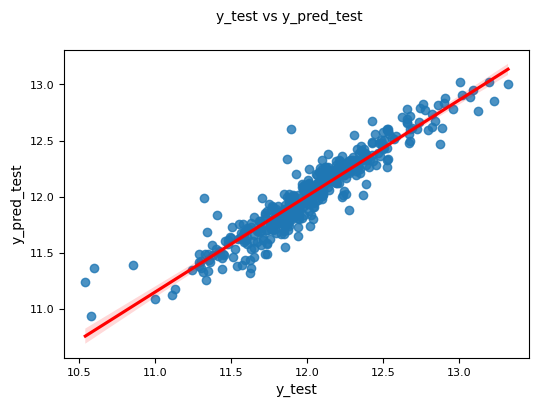

In [257]:
# Plotting y_test and y_pred_test to understand the fit of regression line on test data

fig = plt.figure(figsize=(6,4))
sns.regplot(y_test, y_pred_test_ridge, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred_test', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test', fontsize=10)
plt.show()

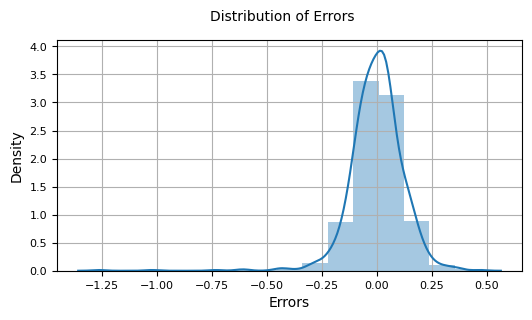

In [258]:
# Normal Distribution of Error Terms

fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_pred_train_ridge), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

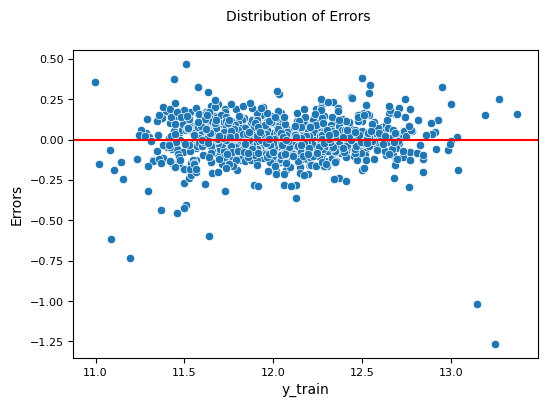

In [259]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_train_ridge, (y_train - y_pred_train_ridge))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_train', fontsize = 10)
plt.show()

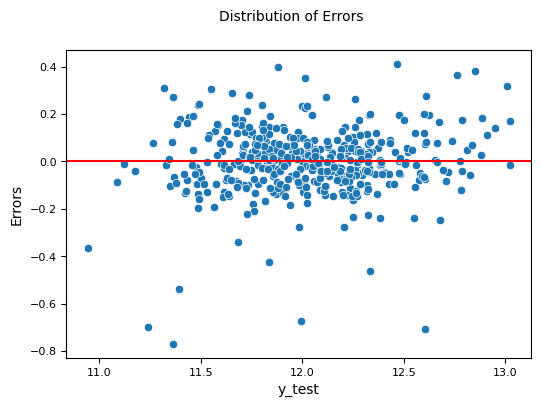

In [260]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_test_ridge, (y_test - y_pred_test_ridge))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_test', fontsize = 10)
plt.show()

### Lasso Regularization

In [261]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_scaled[X_train_lr.columns], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [262]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.001}


In [263]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled[X_train_lr.columns], y_train) 

Lasso(alpha=0.001)

In [264]:
lasso.coef_

array([-0.01525382,  0.01393732,  0.08179459,  0.05033958,  0.02290235,
        0.0209549 ,  0.01405772,  0.11509302,  0.02834315,  0.01879168,
        0.01387913, -0.01510595,  0.01695723,  0.02264725,  0.0266193 ,
        0.04342031,  0.00950745, -0.        , -0.05044502,  0.0210564 ,
        0.01294649,  0.02053179,  0.01947659,  0.0231661 , -0.02102815,
       -0.01569404,  0.01689876,  0.02889692,  0.03081815,  0.02121208,
       -0.0307214 , -0.01832267,  0.01523256, -0.01310594, -0.00300649,
       -0.        ,  0.0147512 ,  0.00973691,  0.02239601, -0.01738814,
        0.0178361 ,  0.01075453,  0.00734403,  0.01642381,  0.00870699])

In [265]:
y_pred_train_lasso = lasso.predict(X_train_scaled[X_train_lr.columns])
y_pred_test_lasso = lasso.predict(X_test_scaled[X_train_lr.columns])

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print('R2 Train Set Lasso Regularization\t:\t', r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print('R2 Test Set Lasso Regularization\t:\t', r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print('RSS Train Set Lasso Regularization\t:\t', rss1_lasso)
metric3.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print('RSS Test Set Lasso Regularization\t:\t', rss2_lasso)
metric3.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print('MSE Train Set Lasso Regularization\t:\t', mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print('MSE Test Set Lasso Regularization\t:\t', mse_test_lasso)
metric3.append(mse_test_lasso**0.5)

R2 Train Set Lasso Regularization	:	 0.9009789579392756
R2 Test Set Lasso Regularization	:	 0.8855820510245732
RSS Train Set Lasso Regularization	:	 15.915207158099257
RSS Test Set Lasso Regularization	:	 8.245938083902931
MSE Train Set Lasso Regularization	:	 0.015572609743737042
MSE Test Set Lasso Regularization	:	 0.018826342657312627


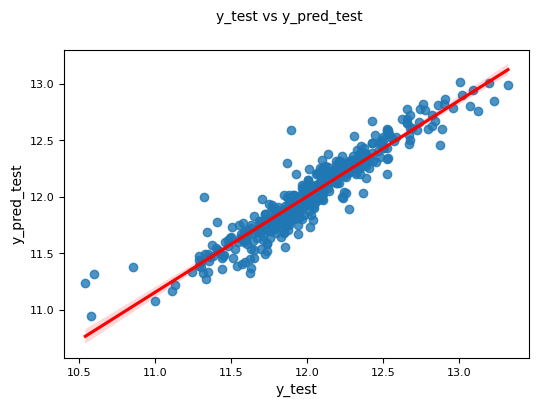

In [266]:
# Plotting y_test and y_pred_test to understand the fit of regression line on test data

fig = plt.figure(figsize=(6,4))
sns.regplot(y_test, y_pred_test_lasso, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred_test', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test', fontsize=10)
plt.show()

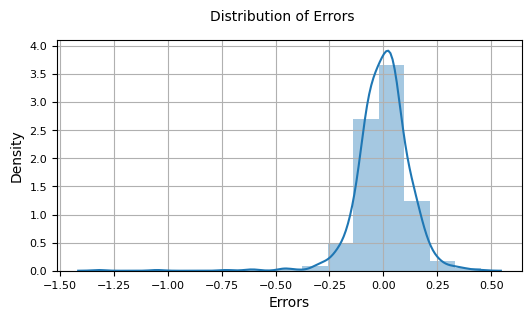

In [267]:
# Normal Distribution of Error Terms

fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_pred_train_lasso), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

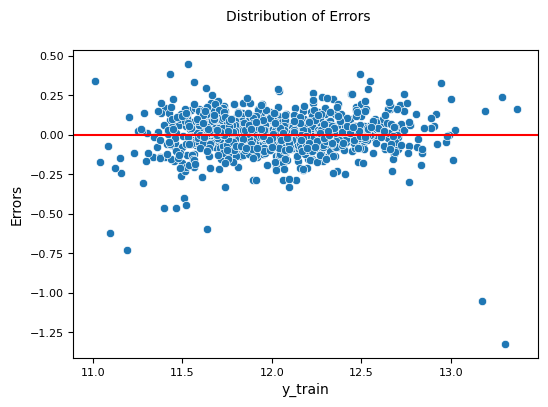

In [268]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_train_lasso, (y_train - y_pred_train_lasso))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_train', fontsize = 10)
plt.show()

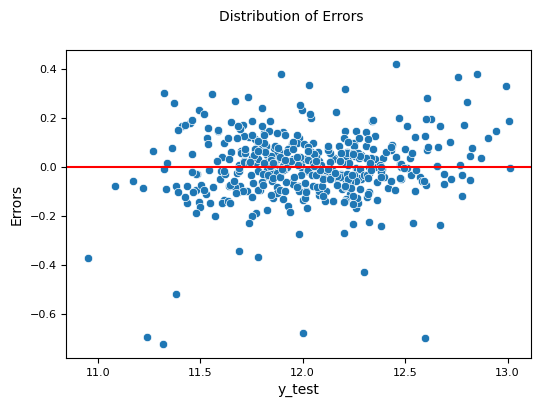

In [269]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_test_lasso, (y_test - y_pred_test_lasso))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_test', fontsize = 10)
plt.show()

### Comparison of Metrics

In [270]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

# dt_metric = pd.Series(metric1, name = 'Data Transformation')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)            0.90190           0.90189           0.90098
1   R2 Score (Test)            0.88278           0.88298           0.88558
2       RSS (Train)           15.76760          15.76822          15.91521
3        RSS (Test)            8.44767           8.43359           8.24594
4       MSE (Train)            0.12421           0.12421           0.12479
5        MSE (Test)            0.13888           0.13876           0.13721

In [271]:
# model_rfe.params[1:]

In [272]:
betas = pd.DataFrame(index=col_rfe)

In [273]:
betas['Linear'] = model_lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [274]:
pd.set_option('display.max_rows', None)
betas

Linear    Ridge    Lasso
LotFrontage           -0.01926 -0.01894 -0.01525
LotArea                0.01471  0.01474  0.01394
OverallQual            0.08071  0.08063  0.08179
OverallCond            0.05083  0.05066  0.05034
BsmtQual               0.02174  0.02190  0.02290
BsmtExposure           0.02101  0.02109  0.02095
HeatingQC              0.01419  0.01425  0.01406
GrLivArea              0.11583  0.11469  0.11509
BsmtFullBath           0.02934  0.02927  0.02834
FullBath               0.01985  0.02018  0.01879
HalfBath               0.01643  0.01654  0.01388
KitchenAbvGr          -0.01743 -0.01738 -0.01511
KitchenQual            0.01689  0.01712  0.01696
TotRmsAbvGrd           0.02485  0.02526  0.02265
FireplaceQu            0.02543  0.02558  0.02662
GarageCars             0.04466  0.04456  0.04342
GarageQual             0.03873  0.03699  0.00951
GarageCond            -0.01551 -0.01445 -0.00000
HouseAge              -0.04850 -0.04812 -0.05045
MSZoning_RL            0.01862  0.01871  0.02106
LandContour_HLS        0.01632  0.01615  0.01295
LandContour_Low        0.02132  0.02126  0.02053
LandContour_Lvl        0.02372  0.02348  0.01948
Neighborhood_Crawfor   0.02522  0.02512  0.02317
Neighborhood_Edwards  -0.02180 -0.02177 -0.02103
Neighborhood_IDOTRR   -0.01735 -0.01732 -0.01569
Neighborhood_NoRidge   0.01828  0.01838  0.01690
Neighborhood_NridgHt   0.03130  0.03114  0.02890
Neighborhood_Somerst   0.03216  0.03206  0.03082
Condition1_Norm        0.02294  0.02280  0.02121
BldgType_Twnhs        -0.03375 -0.03351 -0.03072
BldgType_TwnhsE       -0.02142 -0.02120 -0.01832
HouseStyle_1Story      0.01655  0.01648  0.01523
HouseStyle_2Story     -0.01670 -0.01652 -0.01311
RoofStyle_Gable       -0.02010 -0.01956 -0.00301
RoofStyle_Hip         -0.01846 -0.01778 -0.00000
Exterior1st_BrkFace    0.01569  0.01564  0.01475
Foundation_CBlock      0.01578  0.01557  0.00974
Foundation_PConc       0.02859  0.02839  0.02240
BsmtFinType1_Unf      -0.01743 -0.01751 -0.01739
GarageType_Attchd      0.01801  0.01805  0.01784
GarageType_NoGarage    0.02604  0.02523  0.01075
SaleType_New           0.00907  0.00907  0.00734
SaleCondition_Normal   0.01873  0.01866  0.01642
SaleCondition_Partial  0.00907  0.00907  0.00871

## 10. Inferences

### Key Observations

#### Non-Liniearity
- The Target Variable SalePrice is right skewed, and has non-linear relationship with the predictors. 
- Non-linearity is discovered during EDA as well as during residual Analysis
- Therefore, the Target Variable was transformed using Natural Logarithm (*ln*), 
- Due to the above, if the output of the model is y, The actual value of Sale Price can be expressed as

y = log(SalePrice)
=> SalePrice = power(e,y)


#### Large Nos. of Dummy Variables
- Large nos. of dummy variables were created, out of which a nos. of dummy variables are quasi-constant columns
- The quasi-constant columns were dropped to keep only the relevant columns

### Model Selection

Lasso Model is being selected as the final model as it offers slightly better R2 score and RMSE values on the Test Data, compared to Ridge Model.

### Significant Predictors of House Price

In [275]:
list(betas.Lasso.sort_values(ascending=False).index[:10])

['GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageCars',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'BsmtFullBath',
 'FireplaceQu',
 'Neighborhood_Crawfor',
 'BsmtQual']

Top Ten Strong Predictors are 
- GrLivArea
- OverallQual
- OverallCond
- GarageCars
- Neighborhood_Somerst
- Neighborhood_NridgHt
- BsmtFullBath
- FireplaceQu
- Neighborhood_Crawfor
- BsmtQual

### How well those predictors describe the price of a house

With the Lasso Model, the predictors can expalin 88.558% of the variability in the unseen data.

### Optimal value of lambda for ridge and lasso regression

Optimal values of lambda obtained for Ridge & Lasso rehression are 2.0 and 0.001 respectively.

---
## Part-II of Assignment

### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [276]:
# double the value of Alpha

alpha = 4
ridge_1 = Ridge(alpha=alpha)

ridge_1.fit(X_train_scaled[X_train_lr.columns], y_train)

Ridge(alpha=4)

In [277]:
print(ridge_1.coef_)

[-0.01863244  0.01477815  0.08054518  0.05049285  0.02206327  0.02115506
  0.0143171   0.11359314  0.02920298  0.0205021   0.01665236 -0.01733319
  0.01734067  0.02565883  0.02571904  0.04446868  0.03542726 -0.0134963
 -0.04775072  0.01879947  0.01599098  0.02120586  0.02325013  0.02501779
 -0.02174293 -0.01729586  0.01847352  0.03097846  0.03195783  0.02267279
 -0.03328088 -0.02098136  0.01642346 -0.01633991 -0.01905038 -0.01714388
  0.01560246  0.01535987  0.02819328 -0.01758622  0.01808161  0.02446943
  0.00906703  0.01858047  0.00906703]


In [278]:
y_pred_train_ridge_1 = ridge_1.predict(X_train_scaled[X_train_lr.columns])
y_pred_test_ridge_1 = ridge_1.predict(X_test_scaled[X_train_lr.columns])

metric2a = []
r2_train_ridge_1 = r2_score(y_train, y_pred_train_ridge_1)
print('R2 Train Set ridge_1 Regularization\t:\t', r2_train_ridge_1)
metric2a.append(r2_train_ridge_1)

r2_test_ridge_1 = r2_score(y_test, y_pred_test_ridge_1)
print('R2 Test Set ridge_1 Regularization\t:\t', r2_test_ridge_1)
metric2a.append(r2_test_ridge_1)

rss1_ridge_1 = np.sum(np.square(y_train - y_pred_train_ridge_1))
print('RSS Train Set ridge_1 Regularization\t:\t', rss1_ridge_1)
metric2a.append(rss1_ridge_1)

rss2_ridge_1 = np.sum(np.square(y_test - y_pred_test_ridge_1))
print('RSS Test Set ridge_1 Regularization\t:\t', rss2_ridge_1)
metric2a.append(rss2_ridge_1)

mse_train_ridge_1 = mean_squared_error(y_train, y_pred_train_ridge_1)
print('MSE Train Set ridge_1 Regularization\t:\t', mse_train_ridge_1)
metric2a.append(mse_train_ridge_1**0.5)

mse_test_ridge_1 = mean_squared_error(y_test, y_pred_test_ridge_1)
print('MSE Test Set ridge_1 Regularization\t:\t', mse_test_ridge_1)
metric2a.append(mse_test_ridge_1**0.5)

R2 Train Set ridge_1 Regularization	:	 0.9018824830112933
R2 Test Set ridge_1 Regularization	:	 0.8831515614459844
RSS Train Set ridge_1 Regularization	:	 15.769987633092864
RSS Test Set ridge_1 Regularization	:	 8.421099994757665
MSE Train Set ridge_1 Regularization	:	 0.01543051627504194
MSE Test Set ridge_1 Regularization	:	 0.019226255695793754


In [279]:
# double the value of Alpha
# lasso_1 = Lasso()

alpha =0.002
lasso_1 = Lasso(alpha=alpha)
lasso_1.fit(X_train_scaled[X_train_lr.columns], y_train) 

Lasso(alpha=0.002)

In [280]:
lasso_1.coef_

array([-0.01102762,  0.01343278,  0.08322135,  0.04955183,  0.02417534,
        0.02041856,  0.01415035,  0.11331988,  0.02768384,  0.01733077,
        0.01121441, -0.01358192,  0.0174521 ,  0.02163372,  0.02725306,
        0.04236061,  0.        , -0.        , -0.05309937,  0.02263957,
        0.00944079,  0.01774988,  0.01475568,  0.0214352 , -0.02038239,
       -0.01434801,  0.01589481,  0.02670003,  0.02920739,  0.01992581,
       -0.02779834, -0.01541216,  0.0142035 , -0.01001469, -0.00292017,
       -0.        ,  0.01401569,  0.00326396,  0.01533807, -0.01732535,
        0.01786796,  0.        ,  0.0084819 ,  0.01390231,  0.00526386])

In [281]:
y_pred_train_lasso_1 = lasso_1.predict(X_train_scaled[X_train_lr.columns])
y_pred_test_lasso_1 = lasso_1.predict(X_test_scaled[X_train_lr.columns])

metric3a = []
r2_train_lasso_1 = r2_score(y_train, y_pred_train_lasso_1)
print('R2 Train Set lasso_1 Regularization\t:\t', r2_train_lasso_1)
metric3a.append(r2_train_lasso_1)

r2_test_lasso_1 = r2_score(y_test, y_pred_test_lasso_1)
print('R2 Test Set lasso_1 Regularization\t:\t', r2_test_lasso_1)
metric3a.append(r2_test_lasso_1)

rss1_lasso_1 = np.sum(np.square(y_train - y_pred_train_lasso_1))
print('RSS Train Set lasso_1 Regularization\t:\t', rss1_lasso_1)
metric3a.append(rss1_lasso_1)

rss2_lasso_1 = np.sum(np.square(y_test - y_pred_test_lasso_1))
print('RSS Test Set lasso_1 Regularization\t:\t', rss2_lasso_1)
metric3a.append(rss2_lasso_1)

mse_train_lasso_1 = mean_squared_error(y_train, y_pred_train_lasso_1)
print('MSE Train Set lasso_1 Regularization\t:\t', mse_train_lasso_1)
metric3a.append(mse_train_lasso_1**0.5)

mse_test_lasso_1 = mean_squared_error(y_test, y_pred_test_lasso_1)
print('MSE Test Set lasso_1 Regularization\t:\t', mse_test_lasso_1)
metric3a.append(mse_test_lasso_1**0.5)

R2 Train Set lasso_1 Regularization	:	 0.8995448042742956
R2 Test Set lasso_1 Regularization	:	 0.8857948560073043
RSS Train Set lasso_1 Regularization	:	 16.145712232573302
RSS Test Set lasso_1 Regularization	:	 8.230601532887464
MSE Train Set lasso_1 Regularization	:	 0.0157981528694455
MSE Test Set lasso_1 Regularization	:	 0.01879132770065631


In [282]:
rg1_metric = pd.Series(metric2a, name = 'Ridge (2*alpha)')
ls1_metric = pd.Series(metric3a, name = 'Lasso (2*alpha)')

final_metric_1 = pd.concat([final_metric, rg1_metric, ls1_metric], axis = 1)

final_metric_1

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)            0.90190           0.90189           0.90098   
1   R2 Score (Test)            0.88278           0.88298           0.88558   
2       RSS (Train)           15.76760          15.76822          15.91521   
3        RSS (Test)            8.44767           8.43359           8.24594   
4       MSE (Train)            0.12421           0.12421           0.12479   
5        MSE (Test)            0.13888           0.13876           0.13721   

   Ridge (2*alpha)  Lasso (2*alpha)  
0          0.90188          0.89954  
1          0.88315          0.88579  
2         15.76999         16.14571  
3          8.42110          8.23060  
4          0.12422          0.12569  
5          0.13866          0.13708

In [283]:
betas['Ridge_1'] = ridge_1.coef_
betas['Lasso_1'] = lasso_1.coef_

In [284]:
list(betas.Ridge_1.sort_values(ascending=False).index[:10])

['GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageCars',
 'GarageQual',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'BsmtFullBath',
 'Foundation_PConc',
 'FireplaceQu']

In [285]:
list(betas.Lasso_1.sort_values(ascending=False).index[:10])

['GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageCars',
 'Neighborhood_Somerst',
 'BsmtFullBath',
 'FireplaceQu',
 'Neighborhood_NridgHt',
 'BsmtQual',
 'MSZoning_RL']

### Create another model excluding the five most important predictor variables

In [286]:
df = pd.read_csv('train_2.csv', index_col=0)

In [287]:
df.shape

(1460, 126)

In [288]:
df.shape

(1460, 126)

In [289]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0     65.00000     8450            7            5   196.00000          4   
1     80.00000     9600            6            8     0.00000          3   
2     68.00000    11250            7            5   162.00000          4   
3     60.00000     9550            7            5     0.00000          3   
4     84.00000    14260            8            5   350.00000          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0          3         4         3             1         706           0   
1          3         4         3             4         978           0   
2          3         4         3             2         486           0   
3          3         3         4             1         216           0   
4          3         4         3             3         655           0   

   BsmtUnfSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0        150          5           1       856       854       1710   
1        284          5           1      1262         0       1262   
2        434          5           1       920       866       1786   
3        540          4           1       961       756       1717   
4        490          5           1      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0            4             8           0            0             2   
1            3             6           1            3             2   
2            4             6           1            3             2   
3            4             7           1            4             1   
4            4             9           1            3             2   

   GarageCars  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           2           3           3           0           61              0   
1           2           3           3         298            0              0   
2           2           3           3           0           42              0   
3           3           3           3           0           35            272   
4           3           3           3         192           84              0   

   ScreenPorch  SalePrice  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  \
0            0     208500        19          19            0            1   
1            0     181500        46          46            0            1   
2            0     223500        21          20            0            1   
3            0     140000       107          52            0            1   
4            0     250000        22          22            0            1   

   MSZoning_RM  Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  \
0            0              1           0             0             1   
1            0              1           0             0             1   
2            0              1           0             0             0   
3            0              1           0             0             0   
4            0              1           0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4 

#### Drop the Top 5 important Features as Found for the Lasso Regressor

In [290]:
lasso_top_5 = ['GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'Neighborhood_Somerst']

In [291]:
df.drop(columns=lasso_top_5, inplace=True)

#### Separate Features and Response Variable

In [292]:
y = df.pop('SalePrice')
X = df
X.shape, y.shape

((1460, 120), (1460,))

In [293]:
# Transform the Response Variable to account for the Non-Linearity

y = np.log(y)

#### Split Dataset

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 120), (438, 120), (1022,), (438,))

In [295]:
X_train.head()

LotFrontage  LotArea  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
210      67.00000     5604     0.00000          3          3         3   
318      90.00000     9900   256.00000          4          3         4   
239      52.00000     8741     0.00000          3          3         3   
986      59.00000     5310     0.00000          3          4         3   
1416     60.00000    11340     0.00000          3          3         3   

      BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  HeatingQC  \
210          3             1         468           0        396          3   
318          3             4         987           0        360          5   
239          2             1          94           0        641          3   
986          2             1           0           0        485          4   
1416         3             1           0           0        777          4   

      CentralAir  1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  \
210            0       864         0             1             0         1   
318            1      1372      1274             1             0         2   
239            1       798       689             0             0         1   
986            1      1001       634             0             0         1   
1416           1      1246      1044             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
210          0             2             1            3             5   
318          1             4             1            4             9   
239          1             3             1            3             7   
986          0             2             1            4             5   
1416         0             4             2            3            11   

      Fireplaces  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
210            0            0             0           0           0   
318            1            3             2           3           3   
239            1            4             1           3           3   
986            0            0             1           2           3   
1416           0            0             1           3           3   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  HouseAge  \
210            0            0             96            0        97   
318          340           60            144            0        29   
239            0          140              0            0        77   
986          394            0              0            0       112   
1416           0            0            114            0       137   

      RemodelAge  MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_NoAlley  \
210           72            0            1            0              1   
318           29            0            1            0              1   
239           72            0            1            0              1   
986           19            0            0            1              1   
1416          72            0            0            1              1   

      Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
210            0             0             1                0   
318            0             0             1                0   
239            0             0             1                0   
986            0             0             1                0   
1416           0             0             1                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
210                 0                1                  0              0   
318                 1                0                  0              0   
239                 0                1                  0              0   
986                 0                1                  0              0   
1416                0                1                  0              0   

      LotConfig_Inside  LandSlope_Mod

In [296]:
X_test.head()

LotFrontage  LotArea  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
1436     60.00000     9000     0.00000          3          3         3   
57       89.00000    11645     0.00000          4          3         4   
780      63.00000     7875    38.00000          3          3         4   
382      79.00000     9245     0.00000          4          3         4   
1170     76.00000     9880     0.00000          3          3         3   

      BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  HeatingQC  \
1436         3             1         616           0        248          3   
57           3             1           0           0        860          5   
780          4             1           0           0       1237          4   
382          3             3           0           0        939          5   
1170         3             3         522           0        574          3   

      CentralAir  1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1436           1       864         0             0             0         1   
57             1       860       860             0             0         2   
780            1      1253         0             0             0         2   
382            1       939       858             0             0         2   
1170           1      1118         0             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1436         0             3             1            3             5   
57           1             3             1            4             7   
780          0             3             1            3             6   
382          1             3             1            4             8   
1170         0             3             1            3             6   

      Fireplaces  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
1436           0            0             1           3           3   
57             0            0             2           3           3   
780            1            3             3           3           3   
382            0            0             2           3           3   
1170           1            1             3           3           3   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  HouseAge  \
1436           0            0              0            0        51   
57             0           70              0            0        18   
780          220           21              0            0        27   
382          144           53              0            0        16   
1170         203            0              0            0        45   

      RemodelAge  MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_NoAlley  \
1436          51            0            1            0              1   
57            18            0            1            0              1   
780           26            0            1            0              1   
382           16            0            1            0              1   
1170          45            0            1            0              1   

      Alley_Pave  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
1436           0             0             1                0   
57             0             0             0                0   
780            0             0             1                0   
382            0             0             0                0   
1170           0             0             1                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
1436                0                1                  0              1   
57                  0                1                  0              0   
780                 0                1                  0              0   
382                 0                1                  0              0   
1170                0                1                  0              0   

      LotConfig_Inside  LandSlope_Mod

#### Standardize (Scale) Data - MUST for Regularization

In [297]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [298]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [299]:
X_train_scaled.head()

LotFrontage  LotArea  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0     -0.12454 -0.47394    -0.55767   -0.69925   -0.26068  -0.53297   0.12388   
1      0.91769 -0.05682     0.80996    1.05231   -0.26068   0.57865   0.12388   
2     -0.80426 -0.16935    -0.55767   -0.69925   -0.26068  -0.53297  -1.61042   
3     -0.48706 -0.50249    -0.55767   -0.69925    2.60400  -0.53297  -1.61042   
4     -0.44174  0.08300    -0.55767   -0.69925   -0.26068  -0.53297   0.12388   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  HeatingQC  CentralAir  \
0      -0.60668     0.04264    -0.29316   -0.37379   -1.18006    -3.57922   
1       2.14491     1.15959    -0.29316   -0.45409    0.87274     0.27939   
2      -0.60668    -0.76224    -0.29316    0.17268   -1.18006     0.27939   
3      -0.60668    -0.96454    -0.29316   -0.17528   -0.15366     0.27939   
4      -0.60668    -0.96454    -0.29316    0.47603   -0.15366     0.27939   

   1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  -0.76533  -0.78860       1.06575      -0.24766  -1.02705  -0.75274   
1   0.51226   2.13875       1.06575      -0.24766   0.78581   1.24544   
2  -0.93132   0.79456      -0.83844      -0.24766  -1.02705   1.24544   
3  -0.42078   0.66818      -0.83844      -0.24766  -1.02705  -0.75274   
4   0.19538   1.61026      -0.83844      -0.24766   0.78581  -0.75274   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0      -1.04338      -0.23403     -0.77545      -0.93662    -0.92631   
1       1.39675      -0.23403      0.74277       1.55616     0.62310   
2       0.17668      -0.23403     -0.77545       0.30977     0.62310   
3      -1.04338      -0.23403      0.74277      -0.93662    -0.92631   
4       1.39675       4.11474     -0.77545       2.80255    -0.92631   

   FireplaceQu  GarageFinish  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0     -0.98440      -1.90219    -3.86919    -3.86213    -0.74403     -0.71038   
1      0.65949       0.32211     0.27001     0.27240     1.98929      0.19669   
2      1.20745      -0.79004     0.27001     0.27240    -0.74403      1.40612   
3     -0.98440      -0.79004    -1.10973     0.27240     2.42340     -0.71038   
4     -0.98440      -0.79004     0.27001     0.27240    -0.74403     -0.71038   

   EnclosedPorch  ScreenPorch  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  \
0        1.15108     -0.27498   1.52595     1.69547     -0.21461      0.52223   
1        1.91121     -0.27498  -0.71635    -0.39051     -0.21461      0.52223   
2       -0.36919     -0.27498   0.86645     1.69547     -0.21461      0.52223   
3       -0.36919     -0.27498   2.02058    -0.87562     -0.21461     -1.91485   
4        1.43613     -0.27498   2.84495     1.69547     -0.21461     -1.91485   

   MSZoning_RM  Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  \
0     -0.42121        0.25847    -0.15173      -0.17687       0.75971   
1     -0.42121        0.25847    -0.15173      -0.17687       0.75971   
2     -0.42121        0.25847    -0.15173      -0.17687       0.75971   
3      2.37410        0.25847    -0.15173      -0.17687       0.75971   
4      2.37410        0.25847    -0.15173      -0.17687       0.75971   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0         -0.18831         -0.17089          0.34196           -0.26275   
1         -0.18831          5.85161         -2.92428           -0.26275   
2         -0.18831         -0.17089          0.34196           -0.26275   
3         -0.18831         -0.17089          0.34196           -0.26275   
4         -0.18831         -0.17089          0.34196           -0.26275   

   LotConfig_FR2  LotConfig_Inside  LandSlope_Mod  Neighborhood_BrkSide  \
0       -0.17687           0.63852       -0.21710              -0.19918   
1       -0.17687           0.63852        4.60623              -0.19918   
2       -0.17687           0.63852       -0.21710              -0.19918   
3       -0.17687 

In [300]:
X_test_scaled.head()

LotFrontage  LotArea  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0     -0.44174 -0.14421    -0.55767   -0.69925   -0.26068  -0.53297   0.12388   
1      0.87238  0.11261    -0.55767    1.05231   -0.26068   0.57865   0.12388   
2     -0.30580 -0.25344    -0.35466   -0.69925   -0.26068   0.57865   1.85817   
3      0.41923 -0.12042    -0.55767    1.05231   -0.26068   0.57865   0.12388   
4      0.28329 -0.05876    -0.55767   -0.69925   -0.26068  -0.53297   0.12388   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  HeatingQC  CentralAir  \
0      -0.60668     0.36116    -0.29316   -0.70390   -1.18006     0.27939   
1      -0.60668    -0.96454    -0.29316    0.66116    0.87274     0.27939   
2      -0.60668    -0.96454    -0.29316    1.50206   -0.15366     0.27939   
3       1.22771    -0.96454    -0.29316    0.83737    0.87274     0.27939   
4       1.22771     0.15886    -0.29316    0.02324   -1.18006     0.27939   

   1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  -0.76533  -0.78860      -0.83844      -0.24766  -1.02705  -0.75274   
1  -0.77539   1.18748      -0.83844      -0.24766   0.78581   1.24544   
2   0.21298  -0.78860      -0.83844      -0.24766   0.78581  -0.75274   
3  -0.57671   1.18288      -0.83844      -0.24766   0.78581   1.24544   
4  -0.12654  -0.78860       1.06575      -0.24766  -1.02705  -0.75274   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0       0.17668      -0.23403     -0.77545      -0.93662    -0.92631   
1       0.17668      -0.23403      0.74277       0.30977    -0.92631   
2       0.17668      -0.23403     -0.77545      -0.31343     0.62310   
3       0.17668      -0.23403      0.74277       0.93296    -0.92631   
4       0.17668      -0.23403     -0.77545      -0.31343     0.62310   

   FireplaceQu  GarageFinish  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0     -0.98440      -0.79004     0.27001     0.27240    -0.74403     -0.71038   
1     -0.98440       0.32211     0.27001     0.27240    -0.74403      0.34787   
2      0.65949       1.43426     0.27001     0.27240     1.02459     -0.39290   
3     -0.98440       0.32211     0.27001     0.27240     0.41361      0.09087   
4     -0.43644       1.43426     0.27001     0.27240     0.88792     -0.71038   

   EnclosedPorch  ScreenPorch  HouseAge  RemodelAge  MSZoning_FV  MSZoning_RL  \
0       -0.36919     -0.27498   0.00910     0.67673     -0.21461      0.52223   
1       -0.36919     -0.27498  -1.07908    -0.92413     -0.21461      0.52223   
2       -0.36919     -0.27498  -0.78230    -0.53604     -0.21461      0.52223   
3       -0.36919     -0.27498  -1.14503    -1.02115     -0.21461      0.52223   
4       -0.36919     -0.27498  -0.18875     0.38567     -0.21461      0.52223   

   MSZoning_RM  Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_Reg  \
0     -0.42121        0.25847    -0.15173      -0.17687       0.75971   
1     -0.42121        0.25847    -0.15173      -0.17687      -1.31629   
2     -0.42121        0.25847    -0.15173      -0.17687       0.75971   
3     -0.42121        0.25847    -0.15173      -0.17687      -1.31629   
4     -0.42121        0.25847    -0.15173      -0.17687       0.75971   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0         -0.18831         -0.17089          0.34196           -0.26275   
1         -0.18831         -0.17089          0.34196           -0.26275   
2         -0.18831         -0.17089          0.34196           -0.26275   
3         -0.18831         -0.17089          0.34196           -0.26275   
4         -0.18831         -0.17089          0.34196           -0.26275   

   LotConfig_FR2  LotConfig_Inside  LandSlope_Mod  Neighborhood_BrkSide  \
0        5.65400          -1.56611       -0.21710              -0.19918   
1       -0.17687          -1.56611       -0.21710              -0.19918   
2       -0.17687           0.63852       -0.21710              -0.19918   
3       -0.17687 

In [301]:
X_train_scaled.shape, X_test_scaled.shape

((1022, 120), (438, 120))

#### Feature Selection using RFE

In [302]:
def run_rfe(n_feat):
    model_rfe = LinearRegression()
    model_rfe.fit(X_train_scaled, y_train)

    rfe = RFE(estimator=model_rfe, n_features_to_select=n_feat)             
    rfe = rfe.fit(X_train_scaled, y_train)
    
    col_rfe = X_train_scaled.columns[rfe.support_]
    X_train_scaled_rfe = X_train_scaled[col_rfe]
    
    model_rfe_1 = LinearRegression()
    model_rfe_1.fit(X_train_scaled_rfe, y_train)
    
    y_pred_train = model_rfe_1.predict(X_train_scaled_rfe)
    r_squared_train = r2_score(y_train, y_pred_train)
    print(r_squared_train)
    
    return model_rfe_1, X_train_scaled_rfe, col_rfe

In [303]:
for i in range(1,25):
    model_lr, X_train_lr, col_rfe = run_rfe(i)

0.36026322684432854
0.5562031891191266
0.7158805419257519
0.7536604463145027
0.7754946929335689
0.7924663960366696
0.79895059120508
0.8059701488392172
0.8150660202619058
0.8152777467095061
0.8152924925087597
0.8161531560901703
0.8209677438891809
0.827091818372272
0.8328828821553371
0.8333710180575655
0.837047179102671
0.8375488576463302
0.840301220091832
0.8431028344391296
0.8452631533561132
0.846892988564457
0.8486033585539124
0.8522951876531738


In [304]:
model_lr, X_train_lr, col_rfe = run_rfe(45)

0.8802099557368551


In [305]:
col_rfe

Index(['ExterQual', 'BsmtQual', 'BsmtExposure', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageQual',
       'GarageCond', 'HouseAge', 'RemodelAge', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_NridgHt',
       'Condition1_Norm', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2Story', 'Exterior1st_BrkFace', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc',
       'BsmtFinType1_Unf', 'Functional_Typ', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_NoGarage', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object')

In [306]:
X_train_lr.columns

Index(['ExterQual', 'BsmtQual', 'BsmtExposure', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageQual',
       'GarageCond', 'HouseAge', 'RemodelAge', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_NridgHt',
       'Condition1_Norm', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2Story', 'Exterior1st_BrkFace', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc',
       'BsmtFinType1_Unf', 'Functional_Typ', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_NoGarage', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object')

In [307]:
X_test_lr = X_test_scaled[X_train_lr.columns]
y_pred_train_lr = model_lr.predict(X_train_lr)
y_pred_test_lr = model_lr.predict(X_test_lr)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print('R2 Train Set Linear Regression (with Transformation)\t:\t', r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lr)
print('R2 Test Set Linear Regression (with Transformation)\t:\t', r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lr))
print('RSS Train Set Linear Regression (with Transformation)\t:\t', rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lr))
print('RSS Test Set Linear Regression (with Transformation)\t:\t', rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print('MSE Train Set Linear Regression (with Transformation)\t:\t', mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print('MSE Test Set Linear Regression (with Transformation)\t:\t', mse_test_lr)
metric1.append(mse_test_lr**0.5)

R2 Train Set Linear Regression (with Transformation)	:	 0.8802099557368551
R2 Test Set Linear Regression (with Transformation)	:	 0.8545269295023961
RSS Train Set Linear Regression (with Transformation)	:	 19.25331556051173
RSS Test Set Linear Regression (with Transformation)	:	 10.48403631545707
MSE Train Set Linear Regression (with Transformation)	:	 0.018838860626723807
MSE Test Set Linear Regression (with Transformation)	:	 0.023936155971363175


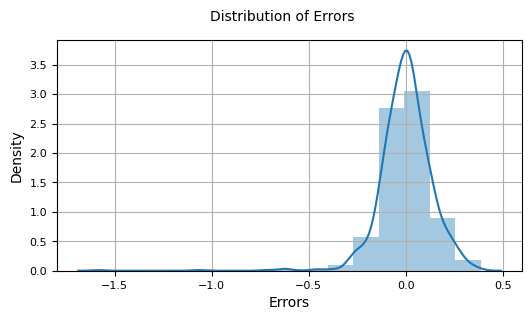

In [308]:
# Normal Distribution of Error Terms

fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_pred_train_lr), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

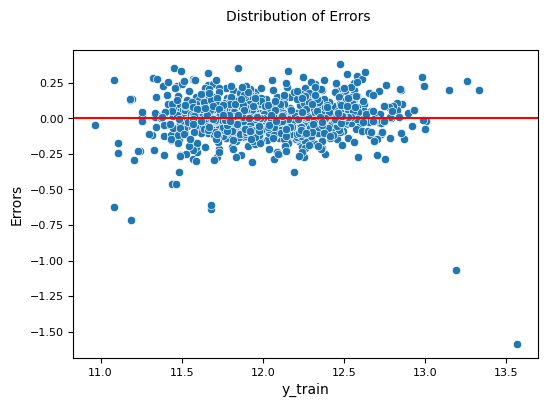

In [309]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_train_lr, (y_train - y_pred_train_lr))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_train', fontsize = 10)
plt.show()

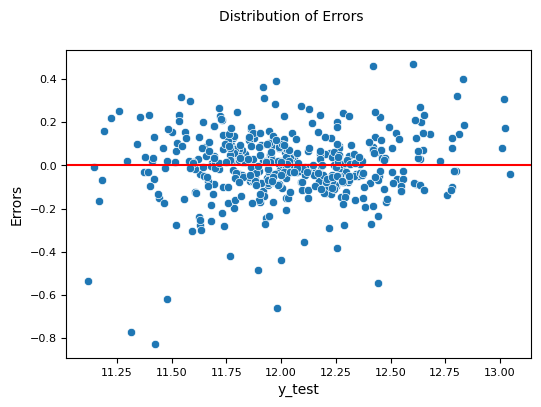

In [310]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_test_lr, (y_test - y_pred_test_lr))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_test', fontsize = 10)
plt.show()

#### Lasso Regularization

In [311]:
lasso_2 = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso_2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_scaled[X_train_lr.columns], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [312]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.001}


In [313]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001
lasso_2 = Lasso(alpha=alpha)
lasso_2.fit(X_train_scaled[X_train_lr.columns], y_train) 

Lasso(alpha=0.001)

In [314]:
lasso_2.coef_

array([ 0.0215271 ,  0.03217519,  0.02468586,  0.0223683 ,  0.11408699,
        0.113697  ,  0.02343246,  0.02028182, -0.02314607,  0.02451406,
        0.02526196,  0.03561966,  0.01720753,  0.02545801, -0.        ,
       -0.02693757, -0.04119268,  0.0273753 ,  0.02216686,  0.00356239,
        0.01796958,  0.02325222,  0.02086873,  0.01653908,  0.02291196,
       -0.02979035, -0.01308248, -0.01807854,  0.03039638,  0.0214194 ,
       -0.0310561 , -0.0219228 , -0.00926505,  0.01829666,  0.00727902,
       -0.        ,  0.00365983,  0.01765275, -0.01639185,  0.02354185,
        0.02469291,  0.01386543,  0.01332825,  0.01741077,  0.02123263])

In [315]:
y_pred_train_lasso = lasso_2.predict(X_train_scaled[X_train_lr.columns])
y_pred_test_lasso = lasso_2.predict(X_test_scaled[X_train_lr.columns])

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print('R2 Train Set Lasso Regularization\t:\t', r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print('R2 Test Set Lasso Regularization\t:\t', r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print('RSS Train Set Lasso Regularization\t:\t', rss1_lasso)
metric3.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print('RSS Test Set Lasso Regularization\t:\t', rss2_lasso)
metric3.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print('MSE Train Set Lasso Regularization\t:\t', mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print('MSE Test Set Lasso Regularization\t:\t', mse_test_lasso)
metric3.append(mse_test_lasso**0.5)

R2 Train Set Lasso Regularization	:	 0.8789343825781846
R2 Test Set Lasso Regularization	:	 0.8557635839082656
RSS Train Set Lasso Regularization	:	 19.458332702758156
RSS Test Set Lasso Regularization	:	 10.394912399556638
MSE Train Set Lasso Regularization	:	 0.019039464484107784
MSE Test Set Lasso Regularization	:	 0.023732676711316524


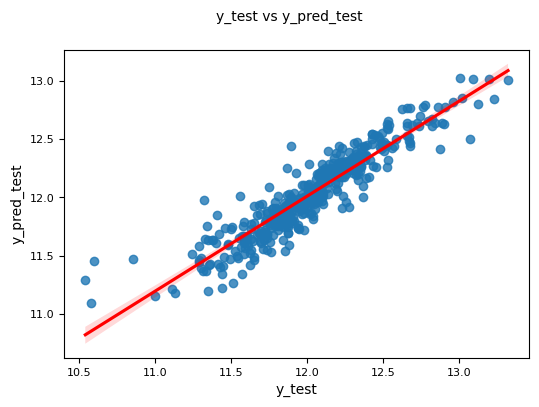

In [316]:
# Plotting y_test and y_pred_test to understand the fit of regression line on test data

fig = plt.figure(figsize=(6,4))
sns.regplot(y_test, y_pred_test_lasso, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred_test', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test', fontsize=10)
plt.show()

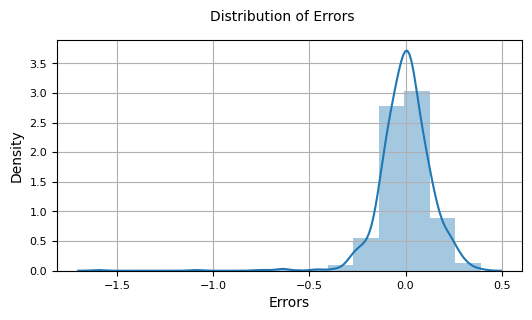

In [317]:
# Normal Distribution of Error Terms

fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_pred_train_lasso), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

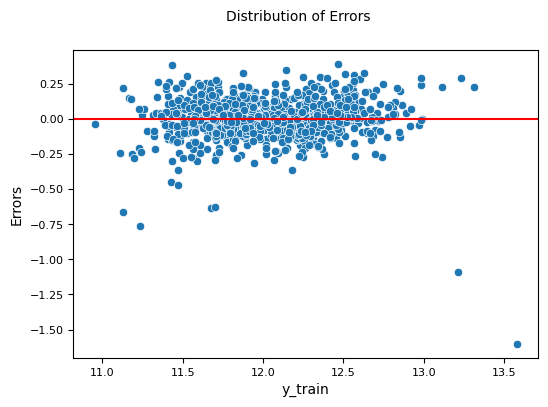

In [318]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_train_lasso, (y_train - y_pred_train_lasso))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_train', fontsize = 10)
plt.show()

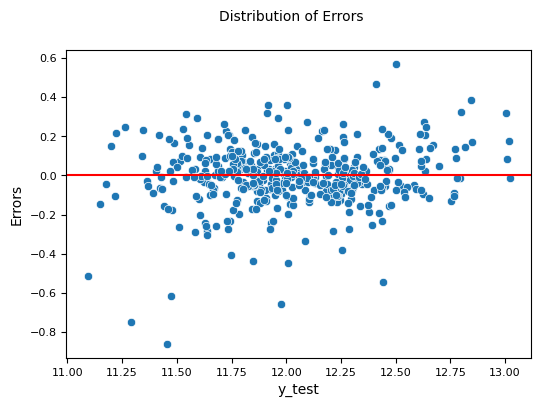

In [319]:
# Homoscedasticity

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_pred_test_lasso, (y_test - y_pred_test_lasso))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_test', fontsize = 10)
plt.show()

#### Listing New Top 5 Predictors 

In [320]:
betas2 = pd.DataFrame(index=col_rfe)
betas2['Lasso_2'] = lasso_2.coef_
list(betas2.Lasso_2.sort_values(ascending=False).index[:5])

['1stFlrSF', '2ndFlrSF', 'FireplaceQu', 'BsmtQual', 'Neighborhood_NridgHt']